In [103]:
import pandas as pd
import spacy

In [104]:
# Read the excel data
#my_sheet = 'incident-raw-data1'
#file_name = 'C:\\Users\ShehuU\\Documents\\THCCG files\\summary.xlsx' # name of your excel file
#file_name = 'C:\\Users\\ShehuU\\Documents\\THCCG files\\Economic modelling\\Data quality datasets\\after changing iapt table\\2mhclusterpatientdatasummary.xlsx'
file_name = 'C:\\Users\\Umar Shehu\\OneDrive\\UNDP\\2\\incident-raw-data3.csv'
#file_name = 'C:\\Users\\hadoop\\Documents\\14alldata.xlsx'
#df0 = read_excel(file_name, sheet_name = my_sheet)
df0 = pd.read_csv(file_name)
#print(df.head()) # shows headers with top 5 rows

#df = pd.read_csv('C:\\Users\\hadoop\\Downloads\\hr_data.csv')
df0.shape

C:\Users\Umar Shehu\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(32788, 36)

In [3]:
df0.columns

Index(['incident_id', 'eventdate', 'eventsource', 'division', 'district',
       'upazilla', 'union', 'viol', 'vdir', 'viotypeone', 'viotypetwo',
       'weaptypeone', 'weaptypetwo', 'mtvincidentone', 'mtvincidenttwo',
       'crosscutting', 'perpgroup', 'targgroup', 'actorone', 'actortwo',
       'actorone_killed', 'actorone_injured', 'actortwo_killed',
       'actortwo_injured', 'kiltotal', 'kilfetotal', 'injtotal', 'injfetotal',
       'sexasstotal', 'sexassfetotal', 'abdtotal', 'arresttotal',
       'damageproperty', 'intervention', 'eventdesc', 'eventurl'],
      dtype='object')

In [4]:
df0['eventdesc'].head()

0     14 Houses of Rohingya camp was set into fire ...
1     20 Awami League and BNP activists were injure...
2     20 injured in a clash between Awami league an...
3     4 drug peddlers were arrested in Brahmanbaria...
4     A 12 hour Hartal were observed by Awami leagu...
Name: eventdesc, dtype: object

In [5]:
#Download and install java jdk 13.0.1
import os
java_path = "C:/Program Files/Java/jdk-13.0.1/bin/java.exe"
os.environ['JAVAHOME'] = java_path

In [79]:
#USING NER
row = 4
article = df0['eventdesc'][row]

import nltk
from nltk.tag import StanfordNERTagger

print('NTLK Version: %s' % nltk.__version__)

#stanford_ner_tagger = StanfordNERTagger(
#    'stanford_ner/' + 'classifiers/english.muc.7class.distsim.crf.ser.gz',
#    'stanford_ner/' + 'stanford-ner-3.9.2.jar'
#)

stanford_ner_tagger = StanfordNERTagger(
    'C:\\Users\\Umar Shehu\\OneDrive\\UNDP\\Jupyter\\stanford_ner\\classifiers\\english.muc.7class.distsim.crf.ser.gz',
    'C:\\Users\\Umar Shehu\\OneDrive\\UNDP\\Jupyter\\stanford_ner\\stanford-ner-3.9.2.jar'
)


results = stanford_ner_tagger.tag(article.split())

print('Original Sentence: %s' % (article))
for result in results:
    tag_value = result[0]
    tag_type = result[1]
    if tag_type != 'O':
        print('Type: %s, Value: %s' % (tag_type, tag_value))

NTLK Version: 3.4.5
Original Sentence:  A 12 hour Hartal were observed by Awami league family for protesting murder of a Jubo league leader in Rangamati
Type: LOCATION, Value: Rangamati


In [80]:
df0['eventdesc'][row]

' A 12 hour Hartal were observed by Awami league family for protesting murder of a Jubo league leader in Rangamati'

In [81]:
#USING SPACY
# Install spacy and download English library
#!pip install spacy
#THEN OPEN ANACONDA PROMPT AS ADMINISTRATOR
#!python -m spacy download en

article = df0['eventdesc'][row]

#spacy_nlp = spacy.load('en')
spacy_nlp = spacy.load('en')
document = spacy_nlp(article)

print('Original Sentence: %s' % (article))

for element in document.ents:
    print('Type: %s, Value: %s' % (element.label_, element))

Original Sentence:  A 12 hour Hartal were observed by Awami league family for protesting murder of a Jubo league leader in Rangamati
Type: TIME, Value: 12 hour
Type: GPE, Value: Awami
Type: GPE, Value: Jubo
Type: GPE, Value: Rangamati


In [9]:
#USING NLTK
#Note, we need to download some standard corpora and API from NLTK 
#to perform parts of speech tagging and named entity recognition. 
#Hence, we downloaded these from nltk in the above Python code

import nltk

print('NTLK version: %s' % (nltk.__version__))

from nltk import word_tokenize, pos_tag, ne_chunk

nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')

NTLK version: 3.4.5


[nltk_data] Downloading package words to C:\Users\Umar
[nltk_data]     Shehu\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Umar Shehu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Umar
[nltk_data]     Shehu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Umar
[nltk_data]     Shehu\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [82]:
article = df0['eventdesc'][row]

def fn_preprocess(art):
    art = nltk.word_tokenize(art)
    art = nltk.pos_tag(art)
    return art
art_processed = fn_preprocess(article)
art_processed

[('A', 'DT'),
 ('12', 'CD'),
 ('hour', 'NN'),
 ('Hartal', 'NNP'),
 ('were', 'VBD'),
 ('observed', 'VBN'),
 ('by', 'IN'),
 ('Awami', 'NNP'),
 ('league', 'NN'),
 ('family', 'NN'),
 ('for', 'IN'),
 ('protesting', 'VBG'),
 ('murder', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('Jubo', 'NNP'),
 ('league', 'NN'),
 ('leader', 'NN'),
 ('in', 'IN'),
 ('Rangamati', 'NNP')]

###Now to understand what each of NLTK codes mean, please refer to the below list-
CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent’s
PRP personal pronoun I, he, she
PRPdollar possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO, to go ‘to’ the store.
UH interjection
VB verb, base form take
VBD verb, past tense took
VBG verb, gerund/present participle taking
VBN verb, past participle taken
VBP verb, sing. present, non-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP$ possessive wh-pronoun whose
WRB wh-abverb where, when

In [83]:
#Now once we have done the parts-of-speech tagging we will be doing a 
#process called chunking. Text chunking is also called as shallow parsing 
#which typically follows POS tagging to add more structure to the sentence.
#The result is grouping of words in “chunks”.
#To perform noun phrase chunking to identify name entities
results = ne_chunk(art_processed)
for x in str(results).split('\n'):
    if '/NN' in x:
        print(x)

  hour/NN
  (ORGANIZATION Hartal/NNP)
  (PERSON Awami/NNP)
  league/NN
  family/NN
  murder/NN
  Jubo/NNP
  league/NN
  leader/NN
  (GPE Rangamati/NNP))


In [84]:
#Now to perform verb phrase chunking to identify verb entities

results = ne_chunk(art_processed)
for x in str(results).split('\n'):
    if '/VBD' in x:
        print(x)

  were/VBD


In [85]:
#Our chunk pattern consists of one rule, that a noun phrase, NP, 
#should be formed whenever the chunker finds an optional determiner, DT,
#followed by any number of adjectives, JJ, and then a noun, NN.
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(art_processed)
print(cs)

(S
  A/DT
  12/CD
  (NP hour/NN)
  Hartal/NNP
  were/VBD
  observed/VBN
  by/IN
  Awami/NNP
  (NP league/NN)
  (NP family/NN)
  for/IN
  protesting/VBG
  (NP murder/NN)
  of/IN
  a/DT
  Jubo/NNP
  (NP league/NN)
  (NP leader/NN)
  in/IN
  Rangamati/NNP)


In [86]:
#The output can be read as a tree with “S” means the sentence as 
#the first level. It can viewed in a more acceptable format called 
#IOB tags (Inside, Outside, Beginning)
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('A', 'DT', 'O'),
 ('12', 'CD', 'O'),
 ('hour', 'NN', 'B-NP'),
 ('Hartal', 'NNP', 'O'),
 ('were', 'VBD', 'O'),
 ('observed', 'VBN', 'O'),
 ('by', 'IN', 'O'),
 ('Awami', 'NNP', 'O'),
 ('league', 'NN', 'B-NP'),
 ('family', 'NN', 'B-NP'),
 ('for', 'IN', 'O'),
 ('protesting', 'VBG', 'O'),
 ('murder', 'NN', 'B-NP'),
 ('of', 'IN', 'O'),
 ('a', 'DT', 'O'),
 ('Jubo', 'NNP', 'O'),
 ('league', 'NN', 'B-NP'),
 ('leader', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('Rangamati', 'NNP', 'O')]


In [89]:
#Here, in the output each token is a line with parts-of-speech and 
#named entity tagged. If you want to extract the IOB tags, as it is a 
#tuple you simply do-

for word, pos, ner in iob_tagged:
    print(word, pos, ner)

A DT O
12 CD O
hour NN B-NP
Hartal NNP O
were VBD O
observed VBN O
by IN O
Awami NNP O
league NN B-NP
family NN B-NP
for IN O
protesting VBG O
murder NN B-NP
of IN O
a DT O
Jubo NNP O
league NN B-NP
leader NN B-NP
in IN O
Rangamati NNP O


In [2]:
 #np.array(a).T.tolist()

In [70]:
##CONFIRM STRUCTURE OF TRAIN/TEST DATASET
#nltk.download('conll2002')
#train_sents = list(nltk.corpus.conll2002.iob_sents('esp.train'))
#train_sents
df0['eventdesc'][36]

"During a raid in capital's Ashkona, a suspected female militant, Shakira, died in the suicide blast with parts of her body being damaged. The baby girl, Sabina, survived with serious injuries. A 14-year-old boy, son of deceased “Neo JMB” leader Tanvir Kaderi, also got killed in the operation, codenamed Ripple 24. Besides, two women -- wife of Major (retd) Jahid, allegedly the trainer of Gulshan and Sholakia attackers, and wife of “Neo JMB” leader Maynul Musa -- surrendered with two babies.  "

In [72]:
# Loop for each row in dataset

import scipy.sparse as sparse

tag_array = []

for i, row in df0.iterrows():
  
    article = df0.at[i,'eventdesc']

    def fn_preprocess(art):
        art = nltk.word_tokenize(art)
        art = nltk.pos_tag(art)
        return art
    art_processed = fn_preprocess(article)
    #art_processed

    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(art_processed)
    #print(cs)

    from nltk.chunk import conlltags2tree, tree2conlltags
    from pprint import pprint
    iob_tagged = tree2conlltags(cs)
    for word, pos, ner in iob_tagged:
        df0.at[i,'word'] = word
        df0.at[i,'pos'] = pos
        df0.at[i,'ner'] = ner
    #pprint(iob_tagged)
    #arr = sparse.coo_matrix(iob_tagged)
    # tag_array.append(iob_tagged)df0.at[i,'tags'] = arr
    tag_array.append(iob_tagged)
   # b = [(i,iob_tagged)]



In [76]:
df0.head()

incident_id   eventdate                     eventsource    division  \
0        22095    5/9/2018                     Prothom-Alo  Chittagong   
1         1289    6/1/2014                      Daily-Star  Chittagong   
2          120  16/09/2001  The Daily Bangladesh Observer     Rajshahi   
3        19770    4/7/2018                         Ittefaq  Chittagong   
4        13567   7/12/2017                      Daily-Star  Chittagong   

             district                     upazilla union viol  vdir  \
0   Cox's Bazar Zila               Teknaf Upazila           Y   1.0   
1  Khagrachhari Zila          Manikchhari Upazila           Y   2.0   
2      Rajshahi Zila               Tanore Upazila           Y   2.0   
3  Brahmanbaria Zila   Brahmanbaria Sadar Upazila           N   NaN   
4     Rangamati Zila         Jurai Chhari Upazila           Y   1.0   

                viotypeone  ... abdtotal arresttotal  \
0  Destruction of property  ...                        
1                    Clash  ...                        
2                    Clash  ...                        
3                           ...                    4   
4    Violent demonstration  ...                        

                                      damageproperty intervention  \
0  [{"name":"House","keyvalue":14,"incident":"5b9...          NaN   
1                                                NaN          NaN   
2                                                NaN          NaN   
3                                                NaN          NaN   
4                                                NaN          NaN   

                                           eventdesc  \
0   14 Houses of Rohingya camp was set into fire ...   
1   20 Awami League and BNP activists were injure...   
2   20 injured in a clash between Awami league an...   
3   4 drug peddlers were arrested in Brahmanbaria...   
4   A 12 hour Hartal were observed by Awami leagu...   

                                            eventurl  \
0                             6 September 2018, P 3    
1                                                NaN   
2                                                NaN   
3  http://epaper.ittefaq.com.bd/2018/07/06/images...   
4  http://epaper.thedailystar.net/index.php?opt=v...   

                                                tags       word  pos ner  
0  [(14, CD, O), (Houses, NNS, O), (of, IN, O), (...          .    .   O  
1  [(20, CD, O), (Awami, NNP, O), (League, NNP, O...          .    .   O  
2  [(20, CD, O), (injured, VBN, O), (in, IN, O), ...          .    .   O  
3  [(4, CD, O), (drug, NN, B-NP), (peddlers, NNS,...          .    .   O  
4  [(A, DT, O), (12, CD, O), (hour, NN, B-NP), (H...  Rangamati  NNP   O  

[5 rows x 40 columns]

In [57]:
iob_tagged

[('Zilla', 'NNP', 'O'),
 ('Detective', 'NNP', 'O'),
 ('Police', 'NNP', 'O'),
 ('arrested', 'VBD', 'O'),
 ('18', 'CD', 'O'),
 ('gamblers', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('Maninikganj', 'NNP', 'O'),
 (',', ',', 'O')]

In [19]:
df0['tags'] = list(tag_array)

In [20]:
df0['tags'].head()

0    [(14, CD, O), (Houses, NNS, O), (of, IN, O), (...
1    [(20, CD, O), (Awami, NNP, O), (League, NNP, O...
2    [(20, CD, O), (injured, VBN, O), (in, IN, O), ...
3    [(4, CD, O), (drug, NN, B-NP), (peddlers, NNS,...
4    [(A, DT, O), (12, CD, O), (hour, NN, B-NP), (H...
Name: tags, dtype: object

In [64]:
#columns = ['1', '2', '3',]
dftag = pd.DataFrame.from_records(tag_array)

In [1]:
#dftag[df_obj.columns] = df_obj.apply(lambda x: x.str.strip("("))  -- not working
#print (dftag)
#pd.DataFrame.from_items(tag_array, columns=['one', 'two', 'three']) --not working

In [97]:
dftag

0                     1                        2    \
0               (14, CD, O)      (Houses, NNS, O)              (of, IN, O)   
1               (20, CD, O)       (Awami, NNP, O)         (League, NNP, O)   
2               (20, CD, O)     (injured, VBN, O)              (in, IN, O)   
3                (4, CD, O)      (drug, NN, B-NP)       (peddlers, NNS, O)   
4                (A, DT, O)           (12, CD, O)         (hour, NN, B-NP)   
5             (A, DT, B-NP)  (divorcee, NN, I-NP)        (woman, NN, B-NP)   
6             (A, DT, B-NP)     (fraud, NN, I-NP)  (impersonating, VBG, O)   
7             (A, DT, B-NP)      (goon, NN, I-NP)            (got, VBD, O)   
8                (A, DT, O)        (local, JJ, O)           (Jubo, NNP, O)   
9             (A, DT, B-NP)       (man, NN, I-NP)            (was, VBD, O)   
10            (A, DT, B-NP)       (man, NN, I-NP)            (was, VBD, O)   
11            (A, DT, B-NP)    (member, NN, I-NP)              (of, IN, O)   
12            (A, DT, B-NP)   (muezzin, NN, I-NP)            (was, VBD, O)   
13            (A, DT, B-NP)    (school, NN, I-NP)         (girl, NN, B-NP)   
14            (A, DT, B-NP)       (son, NN, I-NP)       (tortured, VBD, O)   
15            (A, DT, B-NP)      (wife, NN, I-NP)            (was, VBD, O)   
16            (A, DT, B-NP)     (young, JJ, I-NP)          (man, NN, I-NP)   
17            (A, DT, B-NP)     (youth, NN, I-NP)            (was, VBD, O)   
18              (An, DT, O)       (Awami, NNP, O)         (League, NNP, O)   
19         (Border, NNP, O)       (Guard, NNP, O)     (Bangladesh, NNP, O)   
20         (Dhunat, NNP, O)             (,, ,, O)          (Bogra, NNP, O)   
21              (In, IN, O)         (a, DT, B-NP)      (special, JJ, I-NP)   
22              (In, IN, O)         (a, DT, B-NP)      (special, JJ, I-NP)   
23     (Miscreants, NNS, O)      (killed, VBD, O)           (an, DT, B-NP)   
24             (One, CD, O)    (school, NN, B-NP)          (going, VBG, O)   
25         (Picchi, NNP, O)       (Falan, NNP, O)            (was, VBD, O)   
26         (Police, NNP, O)    (arrested, VBD, O)               (a, DT, O)   
27         (Police, NNP, O)    (arrested, VBD, O)            (a, DT, B-NP)   
28         (Police, NNP, O)    (arrested, VBD, O)            (four, CD, O)   
29         (Police, NNP, O)    (arrested, VBD, O)           (three, CD, O)   
...                     ...                   ...                      ...   
32758       (Youth, NNP, O)      (shot, NN, B-NP)            (dead, JJ, O)   
32759       (Youth, NNP, O)      (shot, NN, B-NP)            (dead, JJ, O)   
32760       (Youth, NNP, O)      (shot, NN, B-NP)         (dead, NN, B-NP)   
32761     (Youth, NN, B-NP)     (stabbed, VBD, O)             (and, CC, O)   
32762     (Youth, NN, B-NP)     (stabbed, VBD, O)             (and, CC, O)   
32763     (Youth, NN, B-NP)     (stabbed, VBD, O)        (death, NN, B-NP)   
32764        (Youth, RB, O)     (stabbed, VBN, O)              (to, TO, O)   
32765        (Youth, RB, O)     (stabbed, VBN, O)              (to, TO, O)   
32766        (Youth, RB, O)     (stabbed, VBN, O)              (to, TO, O)   
32767        (Youth, RB, O)     (stabbed, VBN, O)              (to, TO, O)   
32768        (Youth, RB, O)     (stabbed, VBN, O)              (to, TO, O)   
32769        (Youth, RB, O)     (stabbed, VBN, O)              (to, TO, O)   
32770        (Youth, RB, O)     (stabbed, VBN, O)              (to, TO, O)   
32771        (Youth, RB, O)     (stabbed, VBN, O)              (to, TO, O)   
32772     (Youth, NN, B-NP)   (strangled, VBD, O)              (to, TO, O)   
32773       (Youth, NNP, O)       (takes, VBZ, O)          (own, JJ, B-NP)   
32774        (Youth, RB, O)       (tried, VBN, O)              (to, TO, O)   
32775     (Youth, NN, B-NP)         (was, VBD, O)       (abducted, VBN, O)   
32776     (Youth, NN, B-NP)         (was, VBD, O)       (attacked, VBN, O)   
32777     (Youth, NN, B-NP)         (was, VBD,

In [55]:
#dftag[0] = df[0].str.strip()
df_obj = dftag.select_dtypes(['object'])
print (df_obj)
 



                        0                     1                        2    \
0               (14, CD, O)      (Houses, NNS, O)              (of, IN, O)   
1               (20, CD, O)       (Awami, NNP, O)         (League, NNP, O)   
2               (20, CD, O)     (injured, VBN, O)              (in, IN, O)   
3                (4, CD, O)      (drug, NN, B-NP)       (peddlers, NNS, O)   
4                (A, DT, O)           (12, CD, O)         (hour, NN, B-NP)   
5             (A, DT, B-NP)  (divorcee, NN, I-NP)        (woman, NN, B-NP)   
6             (A, DT, B-NP)     (fraud, NN, I-NP)  (impersonating, VBG, O)   
7             (A, DT, B-NP)      (goon, NN, I-NP)            (got, VBD, O)   
8                (A, DT, O)        (local, JJ, O)           (Jubo, NNP, O)   
9             (A, DT, B-NP)       (man, NN, I-NP)            (was, VBD, O)   
10            (A, DT, B-NP)       (man, NN, I-NP)            (was, VBD, O)   
11            (A, DT, B-NP)    (member, NN, I-NP)              (

[32788 rows x 108 columns]


In [62]:
import re

for i, j in dftag.iterrows(): 
    #print(i, j) 
    #print() 
    s = dftag[i,j]
    re.search(r'\((.*?)\)',s).group(1)

TypeError: '(0, 0               (14, CD, O)
1          (Houses, NNS, O)
2               (of, IN, O)
3        (Rohingya, NNP, O)
4          (camp, NN, B-NP)
5             (was, VBD, O)
6             (set, VBN, O)
7             (into, IN, O)
8          (fire, NN, B-NP)
9               (by, IN, O)
10         (unknown, JJ, O)
11          (masked, JJ, O)
12     (miscreants, NNS, O)
13              (in, IN, O)
14         (Teknaf, NNP, O)
15                (., ., O)
16                     None
17                     None
18                     None
19                     None
20                     None
21                     None
22                     None
23                     None
24                     None
25                     None
26                     None
27                     None
28                     None
29                     None
               ...         
78                     None
79                     None
80                     None
81                     None
82                     None
83                     None
84                     None
85                     None
86                     None
87                     None
88                     None
89                     None
90                     None
91                     None
92                     None
93                     None
94                     None
95                     None
96                     None
97                     None
98                     None
99                     None
100                    None
101                    None
102                    None
103                    None
104                    None
105                    None
106                    None
107                    None
Name: 0, Length: 108, dtype: object)' is an invalid key

In [215]:
## Loop for each row in dataset
##for row in range(df0.shape[1]):
##sub = pd.DataFrame()   

#import scipy.sparse as sparse

#for i, row in df0.iterrows():
  
    #article = df0.at[i,'eventdesc']

    #def fn_preprocess(art):
        #art = nltk.word_tokenize(art)
        #art = nltk.pos_tag(art)
        #return art
    #art_processed = fn_preprocess(article)
    ##art_processed

    #pattern = 'NP: {<DT>?<JJ>*<NN>}'
    #cp = nltk.RegexpParser(pattern)
    #cs = cp.parse(art_processed)
    ##print(cs)

    #from nltk.chunk import conlltags2tree, tree2conlltags
    #from pprint import pprint
    #iob_tagged = tree2conlltags(cs)
    #df0.at[i,'tags'] = iob_tagged
    



In [21]:
train_sents = df0['tags'][0:26230]

test_sents = df0['tags'][26231:32788]

In [93]:
train_sents.head()
#y_test = df0['viol'][26231:32788]

0    [(14, CD, O), (Houses, NNS, O), (of, IN, O), (...
1    [(20, CD, O), (Awami, NNP, O), (League, NNP, O...
2    [(20, CD, O), (injured, VBN, O), (in, IN, O), ...
3    [(4, CD, O), (drug, NN, B-NP), (peddlers, NNS,...
4    [(A, DT, O), (12, CD, O), (hour, NN, B-NP), (H...
Name: tags, dtype: object

In [259]:
##SPLIT DATA INTO TRAIN AND TEST

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df0['tags'], df0['viol'], test_size=0.2, random_state=1)

##X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [259]:
##SPLIT DATA INTO TRAIN AND TEST

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df0['tags'], df0['viol'], test_size=0.2, random_state=1)

##X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [23]:
#!pip install sklearn_crfsuite eli5
import sklearn_crfsuite
import eli5

In [24]:
#FEATURE EXTRACTION
#POS tags can be seen as pre-extracted features. Let’s extract more 
#features (word parts, simplified POS tags, lower/title/upper flags, 
#features of nearby words) and convert them to sklear-crfsuite format - 
#each sentence should be converted to a list of dicts. This is a very 
#simple baseline; you certainly can do better.
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

X_train = [sent2features(s) for s in train_sents]
y_train = [sent2labels(s) for s in train_sents]

X_test = [sent2features(s) for s in test_sents]
y_test = [sent2labels(s) for s in test_sents]

In [25]:
#This is how features extracted from a single token look like:
X_train[0][1]

{'+1:postag': 'IN',
 '+1:postag[:2]': 'IN',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:word.lower()': 'of',
 '-1:postag': 'CD',
 '-1:postag[:2]': 'CD',
 '-1:word.istitle()': False,
 '-1:word.isupper()': False,
 '-1:word.lower()': '14',
 'bias': 1.0,
 'postag': 'NNS',
 'postag[:2]': 'NN',
 'word.isdigit()': False,
 'word.istitle()': True,
 'word.isupper()': False,
 'word.lower()': 'houses',
 'word[-3:]': 'ses'}

In [278]:
X_test[0][1]

{'+1:postag': 'CD',
 '+1:postag[:2]': 'CD',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:word.lower()': 'two',
 '-1:postag': 'NNP',
 '-1:postag[:2]': 'NN',
 '-1:word.istitle()': True,
 '-1:word.isupper()': False,
 '-1:word.lower()': 'police',
 'bias': 1.0,
 'postag': 'VBD',
 'postag[:2]': 'VB',
 'word.isdigit()': False,
 'word.istitle()': False,
 'word.isupper()': False,
 'word.lower()': 'arrested',
 'word[-3:]': 'ted'}

In [40]:
y_train[0][1]

26230

In [43]:
import numpy as np
for x, value in np.ndenumerate(tag_array):
    print(x, value)

(0,) [('14', 'CD', 'O'), ('Houses', 'NNS', 'O'), ('of', 'IN', 'O'), ('Rohingya', 'NNP', 'O'), ('camp', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('set', 'VBN', 'O'), ('into', 'IN', 'O'), ('fire', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('unknown', 'JJ', 'O'), ('masked', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), ('.', '.', 'O')]
(1,) [('20', 'CD', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('and', 'CC', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('clashes', 'NNS', 'O'), ('after', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('election', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Khagrachhari', 'NNP', 'O'), ('.', '.', 'O')]
(2,) [('20', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Part

(36,) [('During', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('capital', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('Ashkona', 'NNP', 'O'), (',', ',', 'O'), ('a', 'DT', 'B-NP'), ('suspected', 'JJ', 'I-NP'), ('female', 'NN', 'I-NP'), ('militant', 'NN', 'B-NP'), (',', ',', 'O'), ('Shakira', 'NNP', 'O'), (',', ',', 'O'), ('died', 'VBD', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('suicide', 'NN', 'I-NP'), ('blast', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('parts', 'NNS', 'O'), ('of', 'IN', 'O'), ('her', 'PRP$', 'O'), ('body', 'NN', 'B-NP'), ('being', 'VBG', 'O'), ('damaged', 'VBN', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('baby', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'), (',', ',', 'O'), ('Sabina', 'NNP', 'O'), (',', ',', 'O'), ('survived', 'VBD', 'O'), ('with', 'IN', 'O'), ('serious', 'JJ', 'O'), ('injuries', 'NNS', 'O'), ('.', '.', 'O'), ('A', 'DT', 'B-NP'), ('14-year-old', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), (',', ',', 'O'), ('son', 'NN', 'B-NP'), ('of',

(58,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', 'O'), ('boy', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('tortured', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('kachua', 'NN', 'B-NP'), (',', ',', 'O'), ('Jessore', 'NNP', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('trivial', 'JJ', 'I-NP'), ('issue', 'NN', 'I-NP'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('youh', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police.', 'NN', 'I-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(59,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', 'O'), ('boy', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('&', 'CC', 'O'), ('nbsp', 'JJ', 'O'), (';', ':', 'O'), ('beaten', 'VBN', 'O'), ('and', 'CC', 'O'), ('strangled', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('group', 'NN',

(84,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', 'O'), ('college', 'NN', 'B-NP'), ('student', 'NN', 'B-NP'), ('went', 'VBD', 'O'), ('missing', 'VBG', 'O'), ('from', 'IN', 'O'), ('2nd', 'CD', 'O'), ('July', 'NNP', 'O'), ('2019', 'CD', 'O'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('and', 'CC', 'O'), ('did', 'VBD', 'O'), ('not', 'RB', 'O'), ('found', 'VBN', 'O'), ('yet.', 'RB', 'O'), ('<', 'JJ', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(85,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', 'O'), ('college', 'NN', 'B-NP'), ('student', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('white', 'JJ', 'O'), ('yaba', 'NNS', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('drive', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Senbagh', 'NNP', 'O'), (',', ',', 'O'), ('Noakhali.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbs

(110,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBZ', 'O'), ('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('the', 'DT', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('city.', 'NN', 'B-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(111,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBZ', 'O'), ('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'O'), ('&', 'CC', 'O'), ('#', '#', 'O'), ('39', 'CD', 'O'), (';', ':', 'O'), ('gunfight', 'VBN', 'O'), ('&', 'CC', 'O'), ('#', '#', 'O'), ('39', 'CD', 'O'), (';', ':', 'O'), ('with', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O

(133,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'DT', 'B-NP'), ('female', 'JJ', 'I-NP'), ('vice-chairman', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('Upzilla', 'NNP', 'O'), (',', ',', 'O'), ('a', 'DT', 'B-NP'), ('local', 'JJ', 'I-NP'), ('leader', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), (',', ',', 'O'), ('died', 'VBD', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('hospital', 'NN', 'I-NP'), ('after', 'IN', 'O'), ('three', 'CD', 'O'), ('days', 'NNS', 'O'), ('when', 'WRB', 'O'), ('she', 'PRP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'RB', 'O'), (';', ':', 'O'), ('attempted', 'VBN', 'O'), ('to', 'TO', 'O'), ('commit', 'VB', 'O'), ('&', 'CC', 'O'), ('nbsp', 'FW', 'O'), (';', ':', 'O'), ('suicide', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('feud', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Sariakandi', 'NNP', 'O'), (',', ',', 'O'), ('Bogra.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP

(159,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', 'O'), ('girl', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('raped', 'VBN', 'O'), ('and', 'CC', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('another', 'DT', 'O'), ('three', 'CD', 'O'), ('attempted', 'VBN', 'O'), ('to', 'TO', 'O'), ('rape', 'VB', 'O'), ('her', 'PRP', 'O'), ('while', 'IN', 'O'), ('she', 'PRP', 'O'), ('screamed', 'VBD', 'O'), ('and', 'CC', 'O'), ('locals', 'NNS', 'O'), ('came', 'VBD', 'O'), ('out', 'RP', 'O'), ('to', 'TO', 'O'), ('rescue', 'VB', 'O'), ('her', 'PRP$', 'O'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('culprits', 'NNS', 'O'), ('after', 'IN', 'O'), ('she', 'PRP', 'O'), ('filed', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('against', 'IN', 'O'), ('them.', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';'

(184,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBZ', 'O'), ('A', 'DT', 'B-NP'), ('land', 'NN', 'I-NP'), ('broker', 'NN', 'B-NP'), ('had', 'VBD', 'O'), ('been', 'VBN', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('three', 'CD', 'O'), ('men', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('broad', 'JJ', 'I-NP'), ('daylight', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('middle', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('market', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Narayanganj.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(185,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBZ', 'O'), ('A', 'DT', 'B-NP'), ('leader', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-

(211,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', 'O'), ('man', 'NN', 'B-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('jumping', 'VBG', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('10th', 'JJ', 'I-NP'), ('floor', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('building.', 'NN', 'I-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(212,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', 'O'), ('man', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('killing', 'VBG', 'O'), ('a', 'DT', 'O'), ('garments', 'NNS', 'O'), ('worker', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('launch', 'JJ', 'I-NP'), ('cabin', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Pirojpur.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(213,) [('<', 'JJ', 'B-NP'), ('p', 'NN',

(236,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('raping', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('minor', 'JJ', 'I-NP'), ('girl', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Gaffargaon', 'NNP', 'O'), (',', ',', 'O'), ('Mymensingh.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(237,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('in', 'IN', 'O'), ('Anowara', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('in', 'IN', 'O'), ('charge', 

(260,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('in', 'IN', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('Benapol', 'NNP', 'O'), (',', ',', 'O'), ('Jessore', 'NNP', 'O'), ('while', 'IN', 'O'), ('he', 'PRP', 'O'), ('was', 'VBD', 'O'), ('trespassing', 'VBG', 'O'), ('the', 'DT', 'B-NP'), ('Indian', 'JJ', 'I-NP'), ('border', 'NN', 'I-NP'), ('to', 'TO', 'O'), ('bring', 'VB', 'O'), ('back', 'RP', 'O'), ('his', 'PRP$', 'O'), ('cattle.', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(261,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('for', 'IN', 'O'), ('previous', 

(283,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', 'O'), ('minor', 'JJ', 'B-NP'), ('girl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Shaharasti', 'NNP', 'O'), (',', ',', 'O'), ('Chandpur', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('against', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('victim', 'NN', 'I-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('mother', 'CC', 'O'), ('&', 'CC', 'O'), ('#', '#', 'O'), ('39', 'CD', 'O'), (';', ':', 'O'), ('s', 'NNS', 'O'), ('lodged', 'VBD', 'O'), ('case.', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(284,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('A', 'NNP', '

(648,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NN', 'B-NP'), ('Miscreants', 'NNP', 'O'), ('destroyed', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('fish', 'JJ', 'I-NP'), ('plant', 'NN', 'I-NP'), ('causing', 'VBG', 'O'), ('monetary', 'JJ', 'B-NP'), ('damage', 'NN', 'I-NP'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('owner', 'NN', 'I-NP'), ('who', 'WP', 'O'), ('was', 'VBD', 'O'), ('a', 'DT', 'O'), ('local', 'JJ', 'O'), ('Sramik', 'NNP', 'O'), ('dal', 'NN', 'B-NP'), ('leader', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('over', 'IN', 'O'), ('political', 'JJ', 'O'), ('and', 'CC', 'O'), ('social', 'JJ', 'B-NP'), ('enmity', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Char', 'NNP', 'O'), ('Fassion', 'NNP', 'O'), (',', ',', 'O'), ('Bhola.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(649,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NN', 'B-NP'), ('Miscreants', 'NNP', 'O'), ('destroyed', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('statue', 'NN', 'I-NP'), ('of', 'IN', 'O')

(678,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('19', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('women', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('two', 'CD', 'O'), ('residential', 'JJ', 'O'), ('hotels', 'NNS', 'O'), ('in', 'IN', 'O'), ('Barisal.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(679,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('23', 'CD', 'O'), ('&', 'CC', 'O'), ('nbsp', 'RB', 'O'), (';', ':', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('several', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('drive', 'VBP', 'O'), ('from', 'IN', 'O'), ('different', 'JJ', 'O'), ('areas', 'NNS', 'O'), ('of', 'I

(712,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('couple', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Barishal', 'NNP', 'O'), ('city', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('deceiving', 'VBG', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('disguise', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('shaman.', 'NN', 'I-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(713,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('criminal', 'JJ', 'I-NP'), ('convicted', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('&', 'CC', 'O'), ('nbsp', 'FW', 'O'), (';', ':', 'O'), ('murder', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('from', 'IN', 'O'), ('Madaripur.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-N

(747,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('fake', 'JJ', 'I-NP'), ('doctor', 'NN', 'I-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Patuakhali.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(748,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('fake', 'JJ', 'I-NP'), ('journalist', 'NN', 'I-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('from', 'IN', 'O'), ('Rangmati.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(749,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('father', 'NN', 'I

(782,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('Madrasa', 'NNP', 'O'), ('teacher', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('sexual', 'JJ', 'O'), ('abuse', 'IN', 'O'), ('one', 'CD', 'O'), ('of', 'IN', 'O'), ('his', 'PRP$', 'O'), ('male', 'JJ', 'B-NP'), ('student', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Gaffargaon', 'NNP', 'O'), (',', ',', 'O'), ('Mymensingh.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(783,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('madrasah', 'NN', 'I-NP'), ('super', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('allegedly', 'RB', 'O'), ('raping', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Ranisankali', 'NNP', 'O'), ('in', 'IN', 'O'), 

(815,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('pistol', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('bullets', 'NNS', 'O'), ('from', 'IN', 'O'), ('Dumuria', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('in', 'IN', 'O'), ('Khulna.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(816,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('his', 'PRP$', 'O'), ('three', 'CD', 'O'), ('friends', 'NNS', 'O'), ('for', 'IN', 'O'), ('their', 'PRP$', 'O'), ('attempt', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('murder', 'VB', 'O'), ('his', 'PRP$', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), ('

(844,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('teenage', 'NN', 'I-NP'), ('boy', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('allegation', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('raping', 'VBG', 'O'), ('a', 'DT', 'O'), ('four-year-old', 'JJ', 'O'), ('Madrasha', 'NNP', 'O'), ('girl', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Faridpur.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(845,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('thief', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Bogura.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(846,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('thief', 'JJ', 'I-NP

(874,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('spreading', 'VBG', 'O'), ('rumors', 'NNS', 'O'), ('and', 'CC', 'O'), ('posted', 'VBD', 'O'), ('obscene', 'JJ', 'O'), ('comments', 'NNS', 'O'), ('about', 'IN', 'O'), ('the', 'DT', 'O'), ('Prime', 'NNP', 'O'), ('Minister', 'NNP', 'O'), ('in', 'IN', 'O'), ('Social', 'NNP', 'O'), ('media', 'NNS', 'O'), ('in', 'IN', 'O'), ('Narail.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(875,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('extorsion', 'NN', 'B-NP'), ('charge', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kurigram.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(876,) 

(906,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('teen-gang', 'NN', 'I-NP'), ('while', 'IN', 'O'), ('they', 'PRP', 'O'), ('tried', 'VBD', 'O'), ('to', 'TO', 'O'), ('rob', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('house', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('cutting', 'VBG', 'O'), ('the', 'DT', 'B-NP'), ('window', 'NN', 'I-NP'), ('frame', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhamrai', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(907,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('men', 'NNS', 'O'), ('ovre', 'VBP', 'O'), ('a', 'DT', 'B-NP'), ('rape', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Savar', 'NNP', 'O'), 

(940,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('thieves', 'NNS', 'O'), ('from', 'IN', 'O'), ('Pahartali', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(941,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('High', 'NNP', 'O'), ('school', 'NN', 'B-NP'), ('teacher', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('for', 'IN', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('raping', 'VBG', 'O'), ('his', 'PRP$', 'O'), ('female', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('student', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Brahmanbaria.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]

(969,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('joint', 'JJ', 'I-NP'), ('secretary', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('and', 'CC', 'O'), ('the', 'DT', 'B-NP'), ('former', 'JJ', 'I-NP'), ('president', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Jubo', 'NNP', 'O'), ('dal', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('Jubo', 'NNP', 'O'), ('Dal', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('yaba.', 'NN', 'B-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(970,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('main', 'JJ', 'I-NP'), ('suspect', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gang-rape', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), (

(1002,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('men', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('rape', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Shubarnachar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Noakhali.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1003,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('men', 'NNS', 'O'), ('over', 'IN', 'O'), ('rape', 'NN', 'B-NP'), ('cases', 'NNS', 'O'), ('from', 'IN', 'O'), ('Sonargaon', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Narayanganj.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1004,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('more', 'JJR', 

(1037,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('convicted', 'VBN', 'O'), ('&', 'CC', 'O'), ('nbsp', 'VBN', 'O'), (';', ':', 'O'), ('criminals', 'NNS', 'O'), ('who', 'WP', 'O'), ('were', 'VBD', 'O'), ('suspects', 'NNS', 'O'), ('of', 'IN', 'O'), ('&', 'CC', 'O'), ('nbsp', 'FW', 'O'), (';', ':', 'O'), ('woman', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('child', 'JJ', 'B-NP'), ('violence', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Bandar', 'NNP', 'O'), (',', ',', 'O'), ('Narayanganj.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1038,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('dealers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('from', 'IN', 'O'), ('Narayanganj.'

(1071,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('hemp', 'NN', 'B-NP'), ('trees', 'NNS', 'O'), ('in', 'IN', 'O'), ('Kurigram.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(1072,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('phensidyl', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Joypurhat.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1073,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('rifles', 'NNS', 'O'), ('in', 'I

(1103,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('recoverd', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('half-molten', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('unidentified', 'JJ', 'I-NP'), ('child', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Atrai', 'NNP', 'O'), ('river', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Naogaon.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1104,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('construction', 'NN', 'I-NP'), ('worker', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('#', '#', 'O'), ('39', 'CD', 'O'), (';', ':', 'O'), ('s', 'VBN', 'O'), ('body', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Shibaliya', 'NNP', 'O'), (',', ',', 'O'), ('in', 'IN', 'O'), ('Manikganj.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1105,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I

(1130,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('unknown', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('floating', 'VBG', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'O'), ('Padma', 'NNP', 'O'), ('river', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Bogra.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(1131,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('unrecognized', 'JJ', 'I-NP'), ('tribal', 'NN', 'I-NP'), ('youth', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Kalyanpur', 'NNP', 'O'), (',', ',', 'O'), ('Rangamati', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('Upazila', 'NNP'

(1161,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Gauripur', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('in', 'IN', 'O'), ('Mymensingh.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(1162,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('his', 'PRP$', 'O'), ('in-law', 'NN', 'B-NP'), ('&', 'CC', 'O'), ('#', '#', 'O'), ('39', 'CD', 'O'), (';', ':', 'O'), ('s', 'VBN', 'O'), ('house', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Bijoynagar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'

(1193,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('slaughtered', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('easy', 'JJ', 'I-NP'), ('bike', 'NN', 'I-NP'), ('driver', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Magura.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1194,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'O'), ('three', 'CD', 'O'), ('hanging', 'VBG', 'O'), ('bodies', 'NNS', 'O'), (',', ',', 'O'), ('one', 'CD', 'O'), ('man', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('two', 'CD', 'O'), ('women', 'NNS', 'O'), (',', ',', 'O'), ('from', 'IN', 'O'), ('separate', 'JJ', 'O'), ('incidents', 'NNS', 'O'), ('in', 'IN', 'O'), ('Thakurgaon.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1195,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP')

(1219,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), (',', ',', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), (',', ',', 'O'), ('arrested', 'VBN', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('manager', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('BRAC', 'NNP', 'O'), ('unit', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('50', 'CD', 'O'), ('yaba', 'NNS', 'O'), ('tablets', 'NNS', 'O'), ('from', 'IN', 'O'), ('Lohagara', 'NNP', 'O'), ('municipality', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Narail', 'NNP', 'O'), ('district.', 'NN', 'B-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1220,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Police', 'NNP', 'O'), (',', ',', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), (',', ',', 'O'), ('arrested', 'VBN', 'O'), ('two', 'CD', 'O'), ('&', 'CC', 'O'), ('

(1244,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('growing', 'VBG', 'O'), ('hemp', 'JJ', 'B-NP'), ('garden', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Faridpur.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(1245,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('raping', 'VBG', 'O'), ('and', 'CC', 'O'), ('killing', 'VBG', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('a', 'DT', 'B-NP'), ('madrasa', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'), ('student', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('

(1273,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('members', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('suspected', 'JJ', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('915', 'CD', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('from', 'IN', 'O'), ('Naogaon.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1274,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('rescued', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('after', 'IN', 'O'), ('25', 'CD', 'O'), ('days', 'NNS', 'O'), ('of', 'IN', 'O'), ('her', 'PRP$', 'O'), ('abduction', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Pabna', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 

(1296,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('The', 'DT', 'O'), ('Anti-Corruption', 'NNP', 'O'), ('Commission', 'NNP', 'O'), ('has', 'VBZ', 'O'), ('arrested', 'VBN', 'O'), ('a', 'DT', 'B-NP'), ('former', 'JJ', 'I-NP'), ('bank', 'NN', 'I-NP'), ('manager', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('charge', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('misappropriation', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('money.', 'NN', 'B-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1297,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('The', 'DT', 'O'), ('beheaded', 'VBN', 'O'), ('body', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('unidentified', 'JJ', 'I-NP'), ('girl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Sirajganj.', 'NNP', 'O'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN',

(1324,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Three', 'CD', 'O'), ('people', 'NNS', 'O'), ('allegedly', 'RB', 'O'), ('tried', 'VBD', 'O'), ('to', 'TO', 'O'), ('kill', 'VB', 'O'), ('their', 'PRP$', 'O'), ('friend', 'NN', 'B-NP'), ('after', 'IN', 'O'), ('stealing', 'VBG', 'O'), ('his', 'PRP$', 'O'), ('motorbike', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Jamalpur', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('all', 'PDT', 'O'), ('the', 'DT', 'O'), ('three', 'CD', 'O'), ('accused.', 'NN', 'B-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1325,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Three', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('goons', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('programme', 'NN', 'I-NP'), ('organized', 'VBN',

(1351,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('were', 'VBD', 'O'), ('locked', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Munshiganj', 'NNP', 'O'), (',', ',', 'O'), ('nineteen', 'JJ', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('eight', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('incident.', 'NN', 'I-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1352,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'VBD', 'O'), ('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('students', 'NNS', 'O'), ('locked', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('almost', 'RB', 'O'), ('ten', 'JJ'

(1375,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Youth', 'NNP', 'O'), ('found', 'VBD', 'O'), ('dead', 'JJ', 'O'), ('in', 'IN', 'O'), ('Thakurgaon', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('including', 'VBG', 'O'), ('the', 'DT', 'B-NP'), ('father', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('stepbrother', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('connection', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('this.', 'NN', 'B-NP'), ('<', 'NNP', 'O'), ('/p', 'NNP', 'O'), ('>', 'NN', 'B-NP')]
(1376,) [('<', 'JJ', 'B-NP'), ('p', 'NN', 'I-NP'), ('>', 'NNP', 'O'), ('Youth', 'NNP', 'O'), ('stabbed', 'VBD', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('unknown', 'JJ', 'O'), ('goons', 'NNS', 'O'), ('in', 'IN', 'O'), ('Lalbagh', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka.', 'NNP', 'O'), ('&', 'CC', 'O'), ('nbsp', 'NN', 'B-NP'), (';', ':', 'O'), ('<', 'CC', 'O'), ('/p', 'CD', 'O'), ('>', 'NN', 'B-NP')]
(1377,) [('<', 'J

(1417,) [('1', 'CD', 'O'), ('man', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('another', 'DT', 'O'), ('1', 'CD', 'O'), ('injured', 'VBN', 'O'), ('over', 'IN', 'O'), ('cultivating', 'VBG', 'O'), ('fish', 'JJ', 'O'), ('on', 'IN', 'O'), ('a', 'DT', 'O'), ('leased', 'VBN', 'O'), ('pond', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('local', 'JJ', 'O'), ('UP', 'NNP', 'O'), ('chairman', 'NN', 'B-NP'), ('.', '.', 'O')]
(1418,) [('1', 'CD', 'O'), ('member', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('fraud', 'NN', 'B-NP'), ('gang', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('from', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('who', 'WP', 'O'), ('used', 'VBD', 'O'), ('biometric', 'JJ', 'B-NP'), ('information', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('criminal', 'JJ', 'B-NP'), ('use', 'NN', 'I-NP'), ('.', '.', 'O')]
(1419,) [('1', 'CD', 'O'), ('member', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Jama-atul', 'NNP', 'O'), ('Mujahideen', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'

(1458,) [('1', 'CD', 'O'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('40', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('attacked', 'VBN', 'O'), ('in', 'IN', 'O'), ('Lalmonirhat', 'NNP', 'O'), ('.', '.', 'O')]
(1459,) [('1', 'CD', 'O'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('50', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('election', 'NN', 'B-NP'), ('violence', 'NN', 'B-NP'), ('involving', 'VBG', 'O'), ('AL', 'NNP', 'O'), ('and', 'CC', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('in', 'IN', 'O'), ('Noakhali', 'NNP', 'O'), ('.', '.', 'O')]
(1460,) [('1', 'CD', 'O'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('8', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('bomb', 'NN', 'I-NP'), ('attack', 'NN', 'B-NP'), ('

(1500,) [('10', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('Chhatra', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('Chhatra', 'NNP', 'O'), ('Dal', 'NNP', 'O'), ('.', '.', 'O')]
(1501,) [('10', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('village', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('.', '.', 'O')]
(1502,) [('10', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('Madan', 'NNP', 'O')]
(1503,) [('10', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'

(1538,) [('10', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('group', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('dispute', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Iftar', 'NNP', 'O'), ('Mahfil', 'NNP', 'O'), ('in', 'IN', 'O'), ('Lakshmipur', 'NNP', 'O')]
(1539,) [('10', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('group', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('villagers', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('village', 'NN', 'I-NP'), ('arbitrator', 'NN', 'B-NP'), ('dispute', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Netrakona', 'NNP', 'O')]
(1540,) [('10', 'CD', 'O'), ('

(1571,) [('10', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('clash', 'NN', 'B-NP'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('tear', 'VB', 'O'), ('off', 'RP', 'O'), ('the', 'DT', 'B-NP'), ('election', 'NN', 'I-NP'), ('poster', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(1572,) [('10', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('electoral', 'JJ', 'B-NP'), ('violence', 'NN', 'I-NP'), ('among', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('(', '(', 'O'), ('AL', 'NNP', 'O'), (')', ')', 'O'), (',', ',', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('and', 'CC', 'O'), ('Jamaat', 'NNP', 'O'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), (',', ',', 'O'), ('Chattagong', 'NNP', 'O'), ('.', '.', 'O')]
(1573,) [('10', 'CD', 'O'), ('peopl

(1603,) [('10', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('post-election', 'NN', 'B-NP'), ('violence', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('involving', 'VBG', 'O'), ('AL', 'NNP', 'O'), ('and', 'CC', 'O'), ('BNP', 'NNP', 'O'), ('.', '.', 'O')]
(1604,) [('10', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'VBZ', 'O'), ('attacked', 'VBN', 'O'), ('on', 'IN', 'O'), ('AL', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(1605,) [('10', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'VBZ', 'O'), ('attacked', 'VBN', 'O'), ('on', 'IN', 'O'), ('minority', 'NN', 'B-NP'), ('families', 'NNS', 'O'), ('in', 'IN', 'O'), ('Narsingdi', 'NNP', 'O'), ('.', '.', 'O'), ('Miscreants', 'NNS', 'O'), ('also', 'RB', 'O'), ('set', 'VBP', 'O'), ('houses', 'NNS', 'O'

(1638,) [('11', 'CD', 'O'), ('person', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('RAB', 'NNP', 'O'), ('for', 'IN', 'O'), ('allegation', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('terrorist', 'JJ', 'B-NP'), ('financing', 'NN', 'I-NP'), ('.', '.', 'O'), ('Based', 'VBN', 'O'), ('on', 'IN', 'O'), ('secret', 'JJ', 'B-NP'), ('information', 'NN', 'I-NP'), (',', ',', 'O'), ('several', 'JJ', 'O'), ('teams', 'NNS', 'O'), ('of', 'IN', 'O'), ('RAB-4', 'NNP', 'O'), ('carried', 'VBD', 'O'), ('out', 'RP', 'O'), ('drives', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), (',', ',', 'O'), ('Khulna', 'NNP', 'O'), ('and', 'CC', 'O'), ('Rajshahi', 'NNP', 'O'), ('and', 'CC', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'O'), ('11', 'CD', 'O'), ('people', 'NNS', 'O'), ('.', '.', 'O'), ('Among', 'IN', 'O'), ('them', 'PRP', 'O'), (',', ',', 'O'), ('Nahid', 'NNP', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), (',', '

(1677,) [('12', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('election', 'NN', 'I-NP'), ('candidate', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Jhenaidah', 'NNP', 'O'), ('.', '.', 'O')]
(1678,) [('12', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'O'), ('pre-election-clash', 'JJ', 'O'), ('in', 'IN', 'O'), ('Barguna', 'NNP', 'O'), ('between', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('nominated', 'VBD', 'O'), ('candidate', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('an', 'DT', 'B-NP'), ('independent', 'JJ', 'I-NP'), ('candidate', 'NN', 'I-NP'), ('.'

(1708,) [('12', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('as', 'IN', 'O'), ('Jamaat', 'NNP', 'O'), ('workers', 'NNS', 'O'), ('beat', 'VBP', 'O'), ('up', 'RP', 'O'), ('BNP', 'NNP', 'O'), ('leaders', 'NNS', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('vengeance', 'NN', 'B-NP'), ('.', '.', 'O')]
(1709,) [('12', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('AL', 'NNP', 'O'), ('and', 'CC', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('altercation', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('election', 'NN', 'B-NP'), ('result', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Magura', 'NNP', 'O'), ('.', '.', 'O')]
(1710,) [('12', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('and', 'CC', 'O'

(1746,) [('14', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(1747,) [('14', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('in', 'IN', 'O'), ('Gaibandha', 'NNP', 'O'), ('.', '.', 'O')]
(1748,) [('14', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('rival', 'JJ', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('disputes', 'NNS', 'O')]
(

(1784,) [('15', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('.', '.', 'O')]
(1785,) [('15', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('.', '.', 'O')]
(1786,) [('15', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('people', 'NNS', 'O'), ('over', 'IN', 'O'), 

(1827,) [('15', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('the', 'DT', 'B-NP'), ('election', 'NN', 'I-NP'), ('office', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('was', 'VBD', 'O'), ('vandalized', 'VBN', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(1828,) [('15', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('25', 'CD', 'O'), ('houses', 'NNS', 'O'), ('were', 'VBD', 'O'), ('vandalized', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('group', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('in', 'IN', 'O'), ('Jhenaidah', 'NNP', 'O')]
(1829,) [('15', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('25', 'CD

(1857,) [('15', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('villagers', 'NNS', 'O'), ('over', 'IN', 'O'), ('trivial', 'JJ', 'O'), ('issues', 'NNS', 'O'), ('in', 'IN', 'O'), ('Naokhali', 'NNP', 'O'), ('.', '.', 'O')]
(1858,) [('15', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('trivial', 'JJ', 'I-NP'), ('matter', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Kotalipara', 'NNP', 'O'), (',', ',', 'O'), ('Gopalganj', 'NNP', 'O'), ('.', '.', 'O'), ('Later', 'NNP', 'O'), ('police', 'NNS', 'O'), ('take', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('situation', 'NN', 'I-NP'), ('under', 'IN', 'O'), ('control', 'N

(1886,) [('15', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('AL', 'NNP', 'O'), ('and', 'CC', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('in', 'IN', 'O'), ('Lalmonirhat', 'NNP', 'O'), ('.', '.', 'O'), ('A', 'NNP', 'O'), ('temple', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('set', 'VBN', 'O'), ('on', 'IN', 'O'), ('fire', 'NN', 'B-NP'), ('.', '.', 'O')]
(1887,) [('15', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('AL', 'NNP', 'O'), ('and', 'CC', 'O'), ('BNP', 'NNP', 'O'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('when', 'WRB', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('both', 'DT', 'O'), ('parties', 'NNS', 'O'), ('came', 'VBD', 'O'), ('face', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('face', 'NN', 'B-NP'), ('.', '.', 'O')]
(1888,) [('15', 'CD', 'O'), ('were', 'VBD', 'O

(1926,) [('17', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('2', 'CD', 'O'), ('female', 'JJ', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('one', 'CD', 'O'), ('house', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('vandalized', 'VBN', 'O'), ('by', 'IN', 'O'), ('relatives', 'NNS', 'O'), ('and', 'CC', 'O'), ('neighbors', 'NNS', 'O'), ('over', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('related', 'VBN', 'O'), ('issues', 'NNS', 'O'), ('in', 'IN', 'O'), ('separate', 'JJ', 'O'), ('places', 'NNS', 'O'), ('in', 'IN', 'O'), ('Barishal', 'NNP', 'O'), ('.', '.', 'O')]
(1927,) [('17', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('different', 'JJ', 'B-NP'), ('allegation', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O')]
(1928,) [('17', 'CD', 'O'), ('people', 'N

(1961,) [('2', 'CD', 'O'), ('Activist', 'NNP', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('pro', 'JJ', 'O'), ('Awami', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('activist', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('election', 'NN', 'B-NP'), ('clash', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chuadanga', 'NNP', 'O')]
(1962,) [('2', 'CD', 'O'), ('Activist', 'NNP', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('chhatro', 'NN', 'B-NP'), ('League', 'NNP', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('fictional', 'JJ', 'I-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('group', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O')]
(1963,) [('2', 'CD', 'O'), ('Activist', 'NNP', 'O')

(2000,) [('2', 'CD', 'O'), ('cousin', 'NN', 'B-NP'), ('brothers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('allegedly', 'RB', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('business', 'NN', 'B-NP'), ('rivals', 'NNS', 'O'), ('in', 'IN', 'O'), ('Tangi', 'NNP', 'O'), (',', ',', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(2001,) [('2', 'CD', 'O'), ('criminal', 'JJ', 'O'), ('attempted', 'VBN', 'O'), ('to', 'TO', 'O'), ('kill', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('contractor', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('Korean', 'JJ', 'I-NP'), ('citizen', 'NN', 'I-NP'), ('where', 'WRB', 'O'), ('police', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('able', 'JJ', 'O'), ('to', 'TO', 'O'), ('arrest', 'VB', 'O'), ('them', 'PRP', 'O'), ('with', 'IN', 'O'), ('their', 'PRP$', 'O'), ('arms', 'NNS', 'O'), ('from', 'IN', 'O'), ('Savar', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(2002,) [('2', 'CD', 'O'), ('daughters', 'N

(2043,) [('2', 'CD', 'O'), ('Jamaat', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('in', 'IN', 'O'), ('Kaliganj\\r\\n', 'NNP', 'O')]
(2044,) [('2', 'CD', 'O'), ('Jamaat-e-Islami', 'JJ', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('explosive', 'JJ', 'O'), ('in', 'IN', 'O'), ('Jhenaidah', 'NNP', 'O'), ('.', '.', 'O')]
(2045,) [('2', 'CD', 'O'), ('JMB', 'JJ', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('by', 'IN', 'O'), ('Police', 'NNP', 'O'), ('.', '.', 'O')]
(2046,) [('2', 'CD', 'O'), ('JMB', 'JJ', 'O'), ('members', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('RAB', 'NNP', 'O'), ('with', 'IN', 'O'), ('extremist', 'JJ', 'O'), ('training', 'VBG', 'O'), ('sheets', 'NNS', 'O'), ('and', 'CC', 'O'), ('daggers', 'NNS', 'O'), ('.', '.', 'O')]
(2047,) [('2', 'CD', 'O'), ('JMB', 'JJ', 'O'), ('members',

(2088,) [('2', 'CD', 'O'), ('men', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('alleged', 'JJ', 'I-NP'), ('gunfight', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Badda', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('Family', 'NNP', 'O'), ('claimed', 'VBD', 'O'), ('that', 'IN', 'O'), ('they', 'PRP', 'O'), ('were', 'VBD', 'O'), ('taken', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('before', 'IN', 'O'), ('.', '.', 'O')]
(2089,) [('2', 'CD', 'O'), ('men', 'NNS', 'O'), ('were', 'VBD', 'O'), ('missing', 'VBG', 'O'), ('from', 'IN', 'O'), ('Savar', 'NNP', 'O'), ('.', '.', 'O'), ('Reason', 'NNP', 'O'), ('and', 'CC', 'O'), ('perpetrator', 'NN', 'B-NP'), ('unknown', 'JJ', 'O'), ('.', '.', 'O')]
(2090,) [('2', 'CD', 'O'), ('minorities', 'NNS', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('5', 'CD', 'O'), ('others', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injure

(2122,) [('2', 'CD', 'O'), ('persons', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'O'), ('female', 'JJ', 'O'), ('UP', 'IN', 'O'), ('member', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('over', 'RP', 'O'), ('lodging', 'VBG', 'O'), ('an', 'DT', 'B-NP'), ('embezzlement', 'JJ', 'I-NP'), ('case', 'NN', 'I-NP'), ('against', 'IN', 'O'), ('UP', 'NNP', 'O'), ('chairman', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Shibganj', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(2123,) [('2', 'CD', 'O'), ('persons', 'NNS', 'O'), ('of', 'IN', 'O'), ('grand', 'JJ', 'B-NP'), ('alliance', 'NN', 'I-NP'), ('were', 'VBD', 'O'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('(', '(', 'O'), ('AL', 'NNP', 'O'), (')', ')', 'O'), ('members', 'NNS', 'O'), ('during', 'IN', 'O'), ('their', 'PRP$', 'O'), ('election', 'NN', 'B-NP'), ('campaign', 'NN', 'B-NP'), ('in', 'IN',

(2161,) [('2', 'CD', 'O'), ('university', 'NN', 'B-NP'), ('students', 'NNS', 'O'), ('were', 'VBD', 'O'), ('jailed', 'VBN', 'O'), ('for', 'IN', 'O'), ('giving', 'VBG', 'O'), ('proxy', 'JJ', 'B-NP'), ('admission', 'NN', 'I-NP'), ('test', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('JU', 'NNP', 'O'), ('in', 'IN', 'O'), ('Savar', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(2162,) [('2', 'CD', 'O'), ('were', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('from', 'IN', 'O'), ('their', 'PRP$', 'O'), ('house', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('impersonating', 'VBG', 'O'), ('administration', 'NN', 'B-NP'), ('officials', 'NNS', 'O'), ('in', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(2163,) [('2', 'CD', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('involvement', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('question', 'NN', 'B-NP'), ('leak', 'NN', 'B-NP'), ('activities', 'NNS', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(21

(2201,) [('20', 'CD', 'O'), ('injured', 'JJ', 'O'), ('as', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chhatra', 'NNP', 'O'), ('League', 'NNP', 'O'), ('and', 'CC', 'O'), ('Awami', 'NNP', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('clashed', 'VBD', 'O'), ('with', 'IN', 'O'), ('each', 'DT', 'O'), ('other', 'JJ', 'O'), ('.', '.', 'O'), ('Three', 'CD', 'O'), ('arrested', 'VBN', 'O'), ('.', '.', 'O')]
(2202,) [('20', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('and', 'CC', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('party', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('election', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Noakhali', 'NNP', 'O'), ('.', '.', 'O'), ('16', 'CD', 'O'), ('arrested', 'VBN', 'O'), ('.', '.', 'O')]
(2203,) [('20', 'CD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 

(2243,) [('20', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('neighbors', 'NNS', 'O'), ('in', 'IN', 'O'), ('Habiganj', 'NNP', 'O'), ('.', '.', 'O')]
(2244,) [('20', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('an', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('attack', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('local', 'JJ', 'B-NP'), ('leader', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Manikganj', 'NNP', 'O'), ('while', 'IN', 'O'), ('An', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('showdown', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('his', 'PRP$', 'O'), ('supporter', 'NN', 'B-NP'), ('.', '.', 'O')]
(2245,) [('20', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injury', 'NN', 'B-NP'), ('during', 'IN', 'O

(2272,) [('20', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('former', 'JJ', 'B-NP'), ('rivalry', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Netrokona', 'NNP', 'O'), (',', ',', 'O'), ('Mymensingh', 'NNP', 'O'), (';', ':', 'O'), ('where', 'WRB', 'O'), ('police', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('5', 'CD', 'O'), ('on', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(2273,) [('20', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('playing', 'VBG', 'O'), ('cricket', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Faridpur', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), (';', ':', 'O')

(2301,) [('20', 'CD', 'O'), ('teacher', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('student', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('as', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('fired', 'VBD', 'O'), ('them', 'PRP', 'O'), ('rubber', 'VB', 'O'), ('bullet', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('disperse', 'VB', 'O'), ('theme', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Magura-Kushtia', 'NNP', 'O'), ('highway', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Magura', 'NNP', 'O')]
(2302,) [('20', 'CD', 'O'), ('tenants', 'NNS', 'O'), ('houses', 'NNS', 'O'), ('were', 'VBD', 'O'), ('vandalized', 'VBN', 'O'), ('and', 'CC', 'O'), ('looted', 'VBN', 'O'), ('by', 'IN', 'O'), ('100', 'CD', 'O'), ('men', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('Landlord', 'NNP', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('land', 'NN', 'I-NP'), ('dispute', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O')]
(2303,) [('20', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O')

(2337,) [('222', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('got', 'JJ', 'B-NP'), ('injury', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('Jatyatabadi', 'NNP', 'O'), ('Chhattro', 'NNP', 'O'), ('Dal', 'NNP', 'O'), ('(', '(', 'O'), ('JCD', 'NNP', 'O'), (')', ')', 'O'), ('and', 'CC', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('(', '(', 'O'), ('BCL', 'NNP', 'O'), (')', ')', 'O'), ('due', 'RB', 'O'), ('to', 'TO', 'O'), ('an', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('JCD', 'NNP', 'O'), ('on', 'IN', 'O'), ('BCL', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('car', 'NN', 'B-NP'), ('fleet', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Bagerhat', 'NNP', 'O'), (',', ',', 'O'), ('Khulna', 'NNP', 'O'), ('.', '.', 'O')]
(2338,) [('23', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('National', 'NNP', 'O'), ('Party', 'N

(2374,) [('25', 'CD', 'O'), ('people', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('three', 'CD', 'O'), ('policemen', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('election', 'NN', 'B-NP'), ('campaign', 'NN', 'B-NP'), ('offices', 'NNS', 'O'), ('were', 'VBD', 'O'), ('vandalized', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('interparty', 'JJ', 'I-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('and', 'CC', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('in', 'IN', 'O'), ('Sherpur', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('eight', 'CD', 'O'), ('people', 'NNS', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(2375,) [('25', 'CD', 'O'), ('people', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('cl

(2402,) [('25', 'CD', 'O'), ('peoples', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('group', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('villagers', 'NNS', 'O'), ('over', 'IN', 'O'), ('position', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('influence', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Sunamganj', 'NNP', 'O')]
(2403,) [('25', 'CD', 'O'), ('pirates', 'NNS', 'O'), ('surrender', 'VBP', 'O'), ('to', 'TO', 'O'), ('home', 'VB', 'O'), ('minister', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('ammo', 'NN', 'B-NP'), ('.', '.', 'O')]
(2404,) [('25', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('election', 'NN', 'I-NP'), ('day', 'NN', 'B-NP'), ('violence', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(2405,) [('25', 'CD', 'O'), ('were', 'VBD', 'O'), ('inj

(2441,) [('3', 'CD', 'O'), ('buses', 'NNS', 'O'), ('were', 'VBD', 'O'), ('burnt', 'VBN', 'O'), ('by', 'IN', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NNS', 'O'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(2442,) [('3', 'CD', 'O'), ('car', 'NN', 'B-NP'), ('thieves', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Habiganj', 'NNP', 'O')]
(2443,) [('3', 'CD', 'O'), ('cattle', 'NNS', 'O'), ('trader', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(2444,) [('3', 'CD', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('allegation', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Murder', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Sylhet', 'NNP', 'O')]
(2445,) [('3', 'CD', 'O'),

(2487,) [('3', 'CD', 'O'), ('Neo-JMB', 'JJ', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('by', 'IN', 'O'), ('RAB', 'NNP', 'O'), ('.', '.', 'O')]
(2488,) [('3', 'CD', 'O'), ('officials', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('private', 'JJ', 'I-NP'), ('bank', 'NN', 'I-NP'), ('were', 'VBD', 'O'), ('allegedly', 'RB', 'O'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('owners', 'NNS', 'O'), ('and', 'CC', 'O'), ('employees', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('brick', 'JJ', 'I-NP'), ('field', 'NN', 'I-NP'), ('.', '.', 'O')]
(2489,) [('3', 'CD', 'O'), ('people', 'NNS', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('different', 'JJ', 'O'), ('crimes', 'NNS', 'O'), ('from', 'IN', 'O'), ('Harinakundu', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Jhenaidah', 'NNP', 'O'), (

(2526,) [('3', 'CD', 'O'), ('robbers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('while', 'IN', 'O'), ('preparing', 'VBG', 'O'), ('for', 'IN', 'O'), ('robbery', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Brahmanbaria', 'NNP', 'O'), ('.', '.', 'O')]
(2527,) [('3', 'CD', 'O'), ('Rohingyas', 'NNP', 'O'), ('were', 'VBD', 'O'), ('detained', 'VBN', 'O'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('.', '.', 'O')]
(2528,) [('3', 'CD', 'O'), ('salt', 'NN', 'B-NP'), ('cultivator', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('group', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('goon', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kutubdia', 'NNP', 'O'), (',', ',', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(2529,) [('3', 'CD', 'O'), ('siblings', 'NNS', 'O'), ('were', 'VBD', 'O'), ('hacked', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', '

(2563,) [('30', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('(', '(', 'O'), ('AL', 'NNP', 'O'), (')', ')', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), (',', ',', 'O'), ('during', 'IN', 'O'), ('holding', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('public', 'JJ', 'I-NP'), ('rally', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('same', 'JJ', 'I-NP'), ('place', 'NN', 'I-NP'), (',', ',', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ("'s", 'POS', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('at', 'IN', 'O'), ('Rangabali', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Patuakhali', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('.', '.', 'O')]
(2564,) [('30', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 

(2599,) [('30', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('police', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('the', 'DT', 'O'), ('miners', 'NNS', 'O'), ('and', 'CC', 'O'), ('officials', 'NNS', 'O'), ('of', 'IN', 'O'), ('Barapukuria', 'NNP', 'O'), ('Coal', 'NNP', 'O'), ('Mining', 'NNP', 'O'), ('Company', 'NNP', 'O'), ('Ltd', 'NNP', 'O'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(2600,) [('30', 'CD', 'O'), ('people', 'NNS', 'O'), ('injured', 'JJ', 'O'), ('including', 'VBG', 'O'), ('polices', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('transport', 'NN', 'B-NP'), ('labourer', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('capital', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('Buriganga', 'NNP', 'O'), ('Bridge', 'NNP', 'O'), ('.', '.', 'O')]
(2601,) [(

(2629,) [('30', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('attacked', 'VBD', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ("'s", 'POS', 'O'), ('procession', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chandpur', 'NNP', 'O'), ('.', '.', 'O')]
(2630,) [('30', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('attacked', 'VBN', 'O'), ('in', 'IN', 'O'), ('many', 'JJ', 'O'), ('areas', 'NNS', 'O'), ('in', 'IN', 'O'), ('Patuakhli', 'NNP', 'O'), ('.', '.', 'O')]
(2631,) [('30', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'VBZ', 'O'), ('attacked', 'VBN', 'O'), ('on', 'IN', 'O'), ('AL', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('in', 'IN

(2666,) [('36', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('anti-drugs', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Lakshmipur', 'NNP', 'O')]
(2667,) [('36', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('Sunamganj', 'NNP', 'O'), ('.', '.', 'O')]
(2668,) [('37', 'CD', 'O'), ('Jamat-Shibir', 'JJ', 'O'), ('activists', 'NNS', 'O'), ('got', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('weeklong', 'JJ', 'I-NP'), ('special', 'JJ', 'I-NP'), ('crackdown', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('police', 'NNS

(2704,) [('4', 'CD', 'O'), ('Neo', 'NNP', 'O'), ('JMB', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Counter', 'NNP', 'O'), ('terrorism', 'NN', 'B-NP'), ('unit', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('police', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('Among', 'IN', 'O'), ('them', 'PRP', 'O'), (',', ',', 'O'), ('one', 'CD', 'O'), ('was', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('important', 'JJ', 'I-NP'), ('strategist', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Holy', 'NNP', 'O'), ('artisan', 'JJ', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(2705,) [('4', 'CD', 'O'), ('Neo-JMB', 'JJ', 'O'), ('members', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('weapons', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(2706,) [('4', 'CD', 'O'), ('people', 'NNS

(2742,) [('4', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('BNP', 'NNP', 'O'), ('activists', 'VBZ', 'O'), ('attacked', 'VBN', 'O'), ('on', 'IN', 'O'), ('AL', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('after', 'IN', 'O'), ('threatening', 'VBG', 'O'), ('to', 'TO', 'O'), ('stop', 'VB', 'O'), ('the', 'DT', 'O'), ('AL', 'NNP', 'O'), ('campaign', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Patuakhli', 'NNP', 'O'), ('.', '.', 'O')]
(2743,) [('4', 'CD', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('100', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('Thakurgaon', 'NNP', 'O'), ('when', 'WRB', 'O'), ('miscreants', 'NNS', 'O'), ('attacked', 'VBD', 'O'), ('on', 'IN', 'O'), ('election', 'NN', 'B-NP'), ('centers', 'NNS', 'O'), ('and', 'CC', 'O'), ('tried', 'VBD', 'O'), ('to', 'TO', 'O'), ('snatch', 'VB', 'O'), ('ballot', 'NN', 'B-NP'), ('boxes', 'NNS', 'O'), ('.', '.', 'O')]
(2744,) [('4', 'CD', 'O'), ('were', 

(2776,) [('40', 'CD', 'O'), ('women', 'NNS', 'O'), ('from', 'IN', 'O'), ('ethnic', 'JJ', 'B-NP'), ('minority', 'NN', 'I-NP'), ('group', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Indian', 'JJ', 'O'), ('Border', 'NNP', 'O'), ('security', 'NN', 'B-NP'), ('force', 'NN', 'B-NP'), ('when', 'WRB', 'O'), ('they', 'PRP', 'O'), ('had', 'VBD', 'O'), ('trespassed', 'VBN', 'O'), ('for', 'IN', 'O'), ('buying', 'VBG', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('market', 'NN', 'I-NP'), ('close', 'RB', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('border', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Durgapur', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Netrokona', 'NNP', 'O'), ('.', '.', 'O'), ('They', 'PRP', 'O'), ('were', 'VBD', 'O'), ('handed', 'VBN', 'O'), ('over', 'IN', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'O'), ('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('as', 'IN', 'O'), ('reported', 'VBN', 'O'), ('.', 

(2816,) [('5', 'CD', 'O'), ('leader', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('party', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O')]
(2817,) [('5', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('including', 'VBG', 'O'), ('4', 'CD', 'O'), ('women', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('local', 'JJ', 'O'), ('rivals', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('negotiation', 'NN', 'I-NP'), ('meeting', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(2818,) [('5', 'CD', 'O'), ('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('motorcycle', 'NN', 'B-NP'), ('lifting', 'VBG',

(2851,) [('5', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('attacked', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('motorcade', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('in', 'IN', 'O'), ('Chadpur', 'NNP', 'O'), ('.', '.', 'O')]
(2852,) [('5', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('miscreants', 'NNS', 'O'), ('exploded', 'VBD', 'O'), ('bomb', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('BNP', 'NNP', 'O'), ('candidate', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Naokhali', 'NNP', 'O'), ('.', '.', 'O')]
(2853,) [('5', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('at', 'IN', 'O'), ('least', 'JJS', 'O'), ('50', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'),

(2890,) [('5.5', 'CD', 'O'), ('lakh', 'JJ', 'B-NP'), ('yaba', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('bush', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('Coast', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), (',', ',', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(2891,) [('50', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ("'s", 'POS', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('while', 'IN', 'O'), ('BNP', 'NNP', 'O'), ('candidate', 'VBP', 'O'), ("'s", 'POS', 'O'), ('house', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('torched', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN

(2929,) [('50', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('20', 'CD', 'O'), ('shops', 'NNS', 'O'), ('were', 'VBD', 'O'), ('vandalized', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('counter', 'NN', 'B-NP'), ('clash', 'NN', 'B-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('local', 'JJ', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('petty', 'JJ', 'B-NP'), ('matter', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Faridpur', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('Where', 'WRB', 'O'), ('police', 'NNS', 'O'), ('take', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('situation', 'NN', 'I-NP'), ('under', 'IN', 'O'), ('control', 'NN', 'B-NP'), ('.', '.', 'O')]
(2930,) [('50', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('30', 'CD', 'O'), ('shops', 'NNS', 'O'), ('were', 'VBD', 'O'), ('vandalized', 'VBN

(2958,) [('500', 'CD', 'O'), ('minorities', 'NNS', 'O'), ('house', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('vandalized', 'VBN', 'O'), ('by', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('party', 'NN', 'B-NP'), ('activist', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('post', 'NN', 'B-NP'), ('election', 'NN', 'B-NP'), ('violence', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Bhola', 'NNP', 'O')]
(2959,) [('500', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('wounded', 'VBN', 'O'), ('in', 'IN', 'O'), ('several', 'JJ', 'O'), ('clashes', 'NNS', 'O'), ('over', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('among', 'IN', 'O'), ('AL', 'NNP', 'O'), (',', ',', 'O'), ('BNP', 'NNP', 'O'), ('and', 'CC', 'O'), ('Shibir', 'NNP', 'O'), ('.', '.', 'O')]
(2960,) [('500', 'CD', 'O'), ('taka', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('hijacked', 'VBN', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('boy', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Harirampur', 'NNP', 'O'), (','

(2994,) [('6', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('irrigation', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('frame', 'NN', 'B-NP'), ('land', 'NN', 'B-NP'), ('where', 'WRB', 'O'), ('police', 'NNS', 'O'), ('take', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('situation', 'NN', 'I-NP'), ('under-control', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Adamdighi', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(2995,) [('6', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('trivial', 'JJ', 'B-NP'), ('matter', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Chandanaish', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O

(3028,) [('68', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('an', 'DT', 'B-NP'), ('serial', 'JJ', 'I-NP'), ('attack', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('(', '(', 'O'), ('AL', 'NNP', 'O'), (')', ')', 'O'), ('over', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('during', 'IN', 'O'), ('their', 'PRP$', 'O'), ('election', 'NN', 'B-NP'), ('campaign', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Fatikchhari', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(3029,) [('68', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('electoral', 'JJ', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('BNP', 'NNP', 'O'), ('alliance', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('law', 'NN', 'B-NP'), ('enforceme

(3064,) [('760', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('25', 'CD', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('police', 'NNS', 'O'), ('and', 'CC', 'O'), ('BNP', 'NNP', 'O'), ('over', 'IN', 'O'), ('coming', 'JJ', 'O'), ('Dhaka', 'NNP', 'O'), ('for', 'IN', 'O'), ('attending', 'VBG', 'O'), ('BNP', 'NNP', 'O'), ("'s", 'POS', 'O'), ("'March", 'NN', 'B-NP'), ('for', 'IN', 'O'), ('Democracy', 'NNP', 'O'), ("'", 'POS', 'O'), ('without', 'IN', 'O'), ('government', 'NN', 'B-NP'), ('permission', 'NN', 'B-NP'), ('.', '.', 'O')]
(3065,) [('77', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('anti-drug', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), 

(3098,) [('81', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(3099,) [('82', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O')]
(3100,) [('9', 'CD', 'O'), ('BNP', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(3101,) [('9', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Sathkira', 'NNP', 'O'), ('po

(3133,) [('A', 'DT', 'B-NP'), ('night', 'NN', 'I-NP'), ('guard', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('founded', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O'), ('Where', 'NNP', 'O'), ('police', 'NNS', 'O'), ('suspect', 'VBP', 'O'), ('robbers', 'NNS', 'O'), ('might', 'MD', 'O'), ('killed', 'VB', 'O'), ('him', 'PRP', 'O'), ('as', 'IN', 'O'), ('he', 'PRP', 'O'), ('recognized', 'VBD', 'O'), ('them', 'PRP', 'O'), ('while', 'IN', 'O'), ('they', 'PRP', 'O'), ('were', 'VBD', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('loot', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('shop', 'NN', 'I-NP'), ('though', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('not', 'RB', 'O'), ('able', 'JJ', 'O'), ('to', 'TO', 'O'), ('caught', 'VB', 'O'), ('any', 'DT', 'O'), ('one', 'CD', 'O'), ('.', '.', 'O')]
(3134,) [('A', 'DT', 'B-NP'), ('owner', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drwaned', 'JJ', 'I-NP'), ('troller', 'NN', 'I-NP'), ('w

(3167,) [('A', 'DT', 'B-NP'), ('12-year-old', 'JJ', 'I-NP'), ('speech', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('hearing', 'NN', 'B-NP'), ('impaired', 'JJ', 'B-NP'), ('girl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('her', 'PRP$', 'O'), ('elderly', 'JJ', 'B-NP'), ('neighbor', 'NN', 'I-NP'), ('.', '.', 'O')]
(3168,) [('A', 'DT', 'B-NP'), ('12-years', 'JJ', 'I-NP'), ('old', 'JJ', 'I-NP'), ('girl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'O'), ('accused', 'VBN', 'O'), ('was', 'VBD', 'O'), ('absconded', 'VBN', 'O'), ('.', '.', 'O')]
(3169,) [('A', 'DT', 'O'), ('13', 'CD', 'O'), ('years', 'NNS', 'O'), ('old', 'JJ', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('for', 'IN', 'O'), ('ransom', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('and', 'CC', 'O'), ('murd

(3199,) [('A', 'DT', 'B-NP'), ('21-years-old', 'JJ', 'I-NP'), ('young', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('in', 'IN', 'O'), ('Tista', 'NNP', 'O'), ('river', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Lalmonirhat', 'NNP', 'O'), ('.', '.', 'O')]
(3200,) [('A', 'DT', 'O'), ('25', 'CD', 'O'), ('years', 'NNS', 'O'), ('old', 'JJ', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('group', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Muhammadpur', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('city', 'NN', 'I-NP'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('suspected', 'VBD', 'O'), ('that', 'IN', 'O'), ('his', 'PRP$', 'O'), ('rival', 'NN', 'B-NP'), ('groups', 'NNS', 'O'), ('killed', 'VBD', 'O'), ('him', 'PRP', 'O'), ('over', 'IN', 'O'), ('position',

(3237,) [('A', 'DT', 'B-NP'), ('7-year', 'JJ', 'I-NP'), ('old', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('sexually', 'RB', 'O'), ('violated', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('17-years', 'JJ', 'I-NP'), ('old', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Sirajganj', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'O'), ('accused', 'VBN', 'O'), ('was', 'VBD', 'O'), ('caught', 'VBN', 'O'), ('and', 'CC', 'O'), ('handed', 'VBN', 'O'), ('over', 'IN', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('.', '.', 'O')]
(3238,) [('A', 'DT', 'B-NP'), ('7-year-old', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('for', 'IN', 'O'), ('ransom', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('later', 'RB', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('abductors', 'NNS', 'O'), ('in', 'IN', 'O'), ('Brahmanbaria', 'NNP', 'O'), ('.', '.', 'O')]
(3239,) [('A', 'DT', 'B-NP'), ('7-y

(3274,) [('A', 'DT', 'O'), ('badly', 'RB', 'O'), ('burnt', 'JJ', 'B-NP'), ('female', 'NN', 'I-NP'), ('HSC', 'NNP', 'O'), ('candidate', 'NN', 'B-NP'), ('died', 'VBD', 'O'), ('in', 'IN', 'O'), ('hospital', 'NN', 'B-NP'), ('.', '.', 'O'), ('Miscreants', 'NNS', 'O'), ('set', 'VBD', 'O'), ('fire', 'NN', 'B-NP'), ('on', 'IN', 'O'), ('her', 'PRP$', 'O'), ('body', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('pouring', 'VBG', 'O'), ('flammable', 'JJ', 'B-NP'), ('substance', 'NN', 'I-NP'), ('.', '.', 'O')]
(3275,) [('A', 'DT', 'B-NP'), ('banana', 'NN', 'I-NP'), ('vendor', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('unknown', 'JJ', 'B-NP'), ('perpetrator', 'NN', 'I-NP'), ('allegedly', 'RB', 'O'), ('over', 'IN', 'O'), ('drug-use', 'JJ', 'O'), ('issues', 'NNS', 'O'), ('in', 'IN', 'O'), ('Rajbari', 'NNP', 'O'), ('.', '.', 'O')]
(3276,) [('A', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('Awami', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('(', '(', 'O'), ('BAL', 'NNP', 'O'), (')'

(3306,) [('A', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('activist', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('by', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kalai', 'NNP', 'O'), (',', ',', 'O'), ('Joypurhat', 'NNP', 'O'), ('.', '.', 'O')]
(3307,) [('A', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('activist', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Harinakundu', 'NNP', 'O'), (',', ',', 'O'), ('Jhenaidah', 'NNP', 'O'), ('.', '.', 'O')]
(3308,) [('A', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party',

(3340,) [('A', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('who', 'WP', 'O'), ('is', 'VBZ', 'O'), ('the', 'DT', 'B-NP'), ('owner', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('extended', 'JJ', 'I-NP'), ('part', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('FR', 'NNP', 'O'), ('tower', 'NN', 'B-NP'), (',', ',', 'O'), ('Banani', 'NNP', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Banani', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(3341,) [('A', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('nationalist', 'NN', 'B-NP'), ('Party', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('car', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('allegedly', 'RB', 'O'), ('targeted', 'VBN', 'O'), ('for', 'IN', 'O'), ('shooting', 'VBG', 'O'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('and', 'CC', 'O'), ('six', 'CD', 'O'), ('people', 'NNS', 'O'), 

(3375,) [('A', 'DT', 'O'), ('Bangladeshi', 'NNP', 'O'), ('was', 'VBD', 'O'), ('tortured', 'VBN', 'O'), ('and', 'CC', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('BSF', 'NNP', 'O'), ('.', '.', 'O'), ('He', 'PRP', 'O'), ('died', 'VBD', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('hospital', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('North', 'NNP', 'O'), ('Dinajpur', 'NNP', 'O'), (',', ',', 'O'), ('India', 'NNP', 'O'), ('.', '.', 'O')]
(3376,) [('A', 'DT', 'O'), ('Bangladeshi', 'NNP', 'O'), ('young', 'JJ', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('allegedly', 'RB', 'O'), ('beaten', 'JJ', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('Indian', 'JJ', 'O'), ('Border', 'NNP', 'O'), ('Security', 'NNP', 'O'), ('Force', 'NNP', 'O'), ('near', 'IN', 'O'), ('Burimari', 'NNP', 'O'), ('border', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Patgram', 'NNP', 'O'), ('.', '.', 'O')]
(3377,) [('A', 'DT', 'O'), ('Bangladeshi', 'NNP', 'O'), ('youth', 'NN', 'B-NP'), ('shot', 'NN'

(3414,) [('A', 'DT', 'B-NP'), ('blogger', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('missing', 'VBG', 'O'), ('after', 'IN', 'O'), ('he', 'PRP', 'O'), ('left', 'VBD', 'O'), ('home', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('Pirojpur', 'NNP', 'O'), ('from', 'IN', 'O'), ('capital', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('Sadarghat', 'NNP', 'O'), ('.', '.', 'O')]
(3415,) [('A', 'DT', 'B-NP'), ('blogger', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Immigration', 'NNP', 'O'), ('police', 'NNS', 'O'), ('for', 'IN', 'O'), ('allegation', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('charge', 'NN', 'I-NP'), ('against', 'IN', 'O'), ('him', 'PRP', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O')]
(3416,) [('A', 'DT', 'O'), ('BNP', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('beaten', 'VBD', 'O'), ('up', 'RP', 'O'), ('an', 'DT', 'O'), ('AL', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('left', 'VBD', 'O'), ('him', 'PRP', 'O'

(3452,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('child', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), (',', ',', 'O'), ('who', 'WP', 'O'), ('kidnapped', 'VBD', 'O'), ('over', 'RB', 'O'), ('ten', 'JJ', 'B-NP'), ('lakh', 'JJ', 'I-NP'), ('taka', 'NN', 'I-NP'), ('ransom', 'VBZ', 'O'), ('10', 'CD', 'O'), ('days', 'NNS', 'O'), ('ago', 'RB', 'O'), ('in', 'IN', 'O'), ('Shajadpur', 'NNP', 'O'), (',', ',', 'O'), ('Sirajganj', 'NNP', 'O'), ('and', 'CC', 'O'), ('police', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('abductors', 'NNS', 'O'), ('.', '.', 'O')]
(3453,) [('A', 'DT', 'B-NP'), ('boy', 'JJ', 'I-NP'), ('commit', 'NN', 'I-NP'), ('suicide', 'NN', 'B-NP'), ('because', 'IN', 'O'), ('of', 'IN', 'O'), ('not', 'RB', 'O'), ('getting', 'VBG', 'O'), ('Eid', 'NNP', 'O'), ('dress', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('his', 'PRP$', 'O'), ('family', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chuadanga

(3495,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('for', 'IN', 'O'), ('ransom', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('later', 'RB', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('abductors', 'NNS', 'O'), ('.', '.', 'O'), ('Two', 'CD', 'O'), ('accused', 'VBD', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('.', '.', 'O')]
(3496,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('for', 'IN', 'O'), ('ransom', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('later', 'RB', 'O'), ('rescued', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O'), ('Four', 'CD', 'O'), ('abductors', 'NNS', 'O'), ('were', 'VBD', 'O'), ('detained', 'VBN', 'O'), ('.', '.', 'O')]
(3497,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('for', 'IN', 'O'), ('ransom', 'NN',

(3532,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('dead', 'RB', 'O'), ('after', 'IN', 'O'), ('being', 'VBG', 'O'), ('missing', 'VBG', 'O'), ('for', 'IN', 'O'), ('one', 'CD', 'O'), ('day', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(3533,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('with', 'IN', 'O'), ('injury', 'NN', 'B-NP'), ('marks', 'NNS', 'O'), ('around', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('neck', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(3534,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('with', 'IN', 'O'), ('injury', 'NN', 'B-NP'), ('marks', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chapai', 'NNP', 'O'), ('Nawabganj', 'NNP', 'O'), ('.', '.', 'O'), ('Reason', 'NNP', 'O'), ('and', 'CC', 'O'), ('perpetrator', 'NN', 'B-NP'), ('unclear', 'JJ', 'O

(3568,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('rescued', 'VBN', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('human', 'JJ', 'I-NP'), ('trafficker', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Bagerhat', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('criminal', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('.', '.', 'O')]
(3569,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('sent', 'VBN', 'O'), ('to', 'TO', 'O'), ('jail', 'VB', 'O'), ('for', 'IN', 'O'), ('one', 'CD', 'O'), ('month', 'NN', 'B-NP'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('eve-teasing', 'JJ', 'O'), ('.', '.', 'O')]
(3570,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('eye', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('Border', 'NNP', 'O'), ('Security', 'NNP', 'O'), ('Force-India', 'NNP', 'O'), ('inside', 'IN', '

(3602,) [('A', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('strangled', 'VBN', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('who', 'WP', 'O'), ('had', 'VBD', 'O'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Sreepur', 'NNP', 'O'), (',', ',', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(3603,) [('A', 'DT', 'O'), ('BRAC', 'NNP', 'O'), ('officer', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('kidnapped', 'VBN', 'O'), ('for', 'IN', 'O'), ('ransom', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('six', 'CD', 'O'), ('kidnappers', 'NNS', 'O'), ('when', 'WRB', 'O'), ('they', 'PRP', 'O'), ('came', 'VBD', 'O'), ('to', 'TO', 'O'), ('collect', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('ransom', 'NN', 'I-NP'), ('money', 'NN', 'B-NP'), ('.', '.', 'O')]
(3604,) [('A', 'DT', 'B-NP'),

(3637,) [('A', 'DT', 'B-NP'), ('bus', 'NN', 'I-NP'), ('passenger', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('died', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ("'Ogyan", 'NNP', 'O'), ('Party', 'NNP', 'O'), ("'", 'POS', 'O'), ('in', 'IN', 'O'), ('Lakshmipur', 'NNP', 'O'), ('.', '.', 'O')]
(3638,) [('A', 'DT', 'B-NP'), ('bus', 'NN', 'I-NP'), ('supervisor', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('four-wheeler', 'NN', 'B-NP'), ('followed', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('beating', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('other', 'JJ', 'B-NP'), ('transport', 'NN', 'I-NP'), ('labor', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Abhaynagar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(3639,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('allegedly', 'RB', 'O'), ('beca

(3677,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('received', 'VBD', 'O'), ('bullet', 'JJ', 'B-NP'), ('injury', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('police', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('convicted', 'VBN', 'O'), ('while', 'IN', 'O'), ('the', 'DT', 'O'), ('others', 'NNS', 'O'), ('fled', 'VBD', 'O'), ('.', '.', 'O')]
(3678,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('shot', 'NN', 'B-NP'), ('another', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('leg', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Wari', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('Locals', 'NNP', 'O'), ('beat', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('perpetrator', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('injured', 'VBD', 'O'), ('him', 'PRP', 'O'), ('.', '.', 'O')]
(3679,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('shot', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('by', 'IN', 'O'), ('

(3715,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('fatally', 'RB', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('as', 'IN', 'O'), ('the', 'DT', 'O'), ('local', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('stabbed', 'VBD', 'O'), ('him', 'PRP', 'O'), ('for', 'IN', 'O'), ('protesting', 'VBG', 'O'), ('against', 'IN', 'O'), ('extortion', 'NN', 'B-NP'), ('business', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('area', 'NN', 'I-NP'), ('.', '.', 'O')]
(3716,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('fatally', 'RB', 'O'), ('inured', 'VBN', 'O'), ('by', 'IN', 'O'), ('armed', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Habiganj', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('motive', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('unclear', 'JJ', 'O'), ('.', '.', 'O')]
(3717,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('d

(3753,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('rival', 'JJ', 'I-NP'), ('group', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('land', 'NN', 'I-NP'), ('related', 'VBN', 'O'), ('issue', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Lakshmipur', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('in', 'IN', 'O'), ('connection', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(3754,) [('A', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('unknowns', 'NNS', 'O'), ('in', 'IN', 'O'), ('Shabujbagh', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('over', 'IN', 'O'), ('some', 'DT', 'O'), ('financial', 'JJ', 'O'), ('issues', 'NNS

(3785,) [('A', 'DT', 'B-NP'), ('cattle', 'JJ', 'I-NP'), ('trader', 'NN', 'I-NP'), ('(', '(', 'O'), ('Sohel', 'NNP', 'O'), ('Mia', 'NNP', 'O'), (')', ')', 'O'), ('was', 'VBD', 'O'), ('tortured', 'VBN', 'O'), ('by', 'IN', 'O'), ('Indian', 'JJ', 'O'), ('Border', 'NNP', 'O'), ('Security', 'NNP', 'O'), ('Force', 'NNP', 'O'), ('and', 'CC', 'O'), ('later', 'RB', 'O'), ('the', 'DT', 'B-NP'), ('victim', 'NN', 'I-NP'), ('died', 'VBD', 'O'), ('at', 'IN', 'O'), ('Patgram', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('Health', 'NNP', 'O'), ('Complex', 'NNP', 'O'), ('.', '.', 'O')]
(3786,) [('A', 'DT', 'B-NP'), ('cattle', 'JJ', 'I-NP'), ('trader', 'NN', 'I-NP'), ('attacked', 'VBN', 'O'), ('by', 'IN', 'O'), ('hijackers', 'NNS', 'O'), ('who', 'WP', 'O'), ('beat', 'VBD', 'O'), ('him', 'PRP', 'O'), ('up', 'RP', 'O'), ('and', 'CC', 'O'), ('looted', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('money', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Barguna', 'NNP', 'O'), ('.', '.', 'O')]
(3787,) [('A', 'DT', 'B-NP'), ('cattle', '

(3825,) [('A', 'DT', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('in', 'IN', 'O'), ('connection', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('occurred', 'VBD', 'O'), ('in', 'IN', 'O'), ('Sylhet', 'NNP', 'O'), ('.', '.', 'O')]
(3826,) [('A', 'DT', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('attacked', 'VBN', 'O'), ('and', 'CC', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('rivals', 'NNS', 'O'), ('of', 'IN', 'O'), ('same', 'JJ', 'B-NP'), ('party', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Naogaon', 'NNP', 'O'), ('.', '.', 'O'), ('He', 'PRP', 'O'), ('later', 'RB', 'O'), ('died', 'VBD', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('injury', 'NN', 'I-NP'), ('sustained', 'VBD', 'O'), ('.', '.', 'O')]
(3827,) [('A', 'DT', 'O'), ('Chhatro', 'NN

(3862,) [('A', 'DT', 'B-NP'), ('child', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('bomb', 'VB', 'O'), ('explosion', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('some', 'DT', 'O'), ('goons', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('rally', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('local', 'JJ', 'O'), ('newly', 'RB', 'O'), ('elected', 'VBN', 'O'), ('union', 'NN', 'B-NP'), ('parishad', 'VBD', 'O'), ('chairman', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Hemayetpur', 'NNP', 'O'), (',', ',', 'O'), ('Savar', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(3863,) [('A', 'DT', 'B-NP'), ('child', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('neighbor', 'NN', 'B-NP'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('previous', 'JJ', 'B-NP'), ('enmity', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(3864,) [('A', 'DT', 'B-NP'), ('child', 'NN', 'I-NP

(3897,) [('A', 'DT', 'O'), ('Chinese', 'JJ', 'O'), ('national', 'JJ', 'O'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('seven', 'CD', 'O'), ('others', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('Bangladeshi', 'NNP', 'O'), ('workers', 'NNS', 'O'), ('and', 'CC', 'O'), ('Chinese', 'JJ', 'O'), ('workers', 'NNS', 'O'), ('at', 'IN', 'O'), ('Kala', 'NNP', 'O'), ('Para', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('in', 'IN', 'O'), ('Patuakhali', 'NNP', 'O'), ('.', '.', 'O')]
(3898,) [('A', 'DT', 'O'), ('Chittagong', 'NNP', 'O'), ('city', 'NN', 'B-NP'), ('tax', 'NN', 'B-NP'), ('official', 'NN', 'B-NP'), ('lost', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('cell', 'NN', 'B-NP'), ('phone', 'NN', 'B-NP'), (',', ',', 'O'), ('money', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('bag', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('Oggyan', 'NNP', 'O'), ('party', 'NN', 'B-NP'), ('.', '.', 'O')]
(3899,) [

(3928,) [('A', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('student-police', 'NN', 'B-NP'), ('left', 'VBD', 'O'), ('3', 'CD', 'O'), ('police', 'NNS', 'O'), ('and', 'CC', 'O'), ('3', 'CD', 'O'), ('students', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('another', 'DT', 'B-NP'), ('person', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Jhenaidah', 'NNP', 'O'), (',', ',', 'O'), ('Khulna', 'NNP', 'O'), (';', ':', 'O'), ('while', 'IN', 'O'), ('students', 'NNS', 'O'), ('were', 'VBD', 'O'), ('protesting', 'VBG', 'O'), ('for', 'IN', 'O'), ('transforming', 'VBG', 'O'), ('their', 'PRP$', 'O'), ('school', 'NN', 'B-NP'), ('into', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('governmental', 'JJ', 'I-NP'), ('school', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('police', 'NNS', 'O'), ('charged', 'VBN', 'O'), ('on', 'IN', 'O'), ('them', 'PRP', 'O'), ('.', '.', 'O')]
(3929,) [('A', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('publi

(3956,) [('A', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('local', 'JJ', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('cricket', 'NN', 'I-NP'), ('tournament', 'NN', 'B-NP'), ('left', 'VBD', 'O'), ('one', 'CD', 'O'), ('dead', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Double', 'NNP', 'O'), ('Mooring', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('and', 'CC', 'O'), ('police', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('six', 'CD', 'O'), ('on', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('crime', 'NN', 'I-NP'), ('.', '.', 'O')]
(3957,) [('A', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('local', 'JJ', 'O'), ('Union', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('member', 'NN', 'B-NP'), ('left', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('female', 'JJ', 'I-NP'), ('member', 'NN', 'I-NP'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('distributing', 'VBG', 'O'), ('goods', 'NNS', 'O'), ('to', 'TO

(3987,) [('A', 'DT', 'B-NP'), ('class', 'NN', 'I-NP'), ('four', 'CD', 'O'), ('student', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'O'), ('local', 'JJ', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('(', '(', 'O'), ('AL', 'NNP', 'O'), (')', ')', 'O'), ('leader', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('trivial', 'JJ', 'B-NP'), ('matter', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Bera', 'NNP', 'O'), (',', ',', 'O'), ('Pabna', 'NNP', 'O'), ('.', '.', 'O')]
(3988,) [('A', 'DT', 'B-NP'), ('class', 'NN', 'I-NP'), ('nine', 'CD', 'O'), ('girl', 'NN', 'B-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('strangled', 'VBD', 'O'), ('herself', 'PRP', 'O'), ('over', 'RP', 'O'), ('a', 'DT', 'B-NP'), ('trivial', 'JJ', 'I-NP'), ('matter', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Sujanagar', 'NNP', 'O'), (',', ',', 'O'), ('Pabna', 'NNP', 'O'), ('.', '.', 'O')]
(3989,) [('A', 'DT', 'B-NP'), ('class', 'NN', 'I-NP'), ('nine', 'CD', '

(4023,) [('A', 'DT', 'B-NP'), ('coconut', 'NN', 'I-NP'), ('seller', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('committed', 'VBD', 'O'), ('suicide', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('over', 'IN', 'O'), ('financial', 'JJ', 'B-NP'), ('problem', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('his', 'PRP$', 'O'), ('in-laws', 'NN', 'B-NP'), ('.', '.', 'O')]
(4024,) [('A', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('boy', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('abducted', 'JJ', 'O'), ('to', 'TO', 'O'), ('aim', 'VB', 'O'), ('for', 'IN', 'O'), ('killing', 'VBG', 'O'), ('and', 'CC', 'O'), ('police', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('suspects', 'NNS', 'O'), ('from', 'IN', 'O'), ('Sirajganj', 'NNP', 'O'), ('.', '.', 'O')]
(4025,) [('A', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('boy', 'NN', 'B-NP'), ('has', 'VBZ', 'O'), ('been', 'VBN', 'O'), ('missing', 'VBG', 'O'), ('for', 'IN

(4067,) [('A', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('student', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('cousin', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('bomb', 'NN', 'B-NP'), ('explosion', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('own', 'JJ', 'B-NP'), ('house', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('house', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('damaged', 'VBN', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('investigated', 'VBD', 'O'), ('for', 'IN', 'O'), ('militancy', 'NN', 'B-NP'), ('connection', 'NN', 'B-NP'), ('.', '.', 'O')]
(4068,) [('A', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('student', 'NN', 'B-NP'), ('committed', 'VBD', 'O'), ('suicide', 'RB', 'O'), ('after', 'IN', 'O'), ('rebuking', 'VBG', 'O'), ('by', 'IN', 'O'), ('mother', 'NN', 'B-NP'), ('.', '.', 'O')]
(4069,) [('A', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('student', 'NN', 'B-NP'), ('committed

(4107,) [('A', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('student', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('and', 'CC', 'O'), ('fatally', 'RB', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('local', 'JJ', 'O'), ('Shwecchasebak', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('associates', 'NNS', 'O'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('over', 'IN', 'O'), ('smoking', 'VBG', 'O'), ('cigarette', 'NN', 'B-NP'), ('.', '.', 'O'), ('One', 'CD', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('connection', 'NN', 'I-NP'), ('.', '.', 'O')]
(4108,) [('A', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('student', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('and', 'CC', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('fight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('local', 'JJ', 'O'), ('youths', 'NNS', 'O'), ('over'

(4145,) [('A', 'DT', 'B-NP'), ('contractor', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('attacked', 'VBN', 'O'), ('by', 'IN', 'O'), ('Union', 'NNP', 'O'), ('parishad', 'VBD', 'O'), ('member', 'NN', 'B-NP'), ('supporters', 'NNS', 'O'), ('for', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('return', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('lending', 'VBG', 'O'), ('money', 'NN', 'B-NP'), ('.', '.', 'O')]
(4146,) [('A', 'DT', 'B-NP'), ('convict', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('arms', 'NNS', 'O'), ('manufacturer', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('weapons', 'NNS', 'O'), ('by', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(4147,) [('A', 'DT', 'B-NP'), ('convict', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP

(4189,) [('A', 'DT', 'B-NP'), ('convict', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Pabna', 'NNP', 'O'), ('by', 'IN', 'O'), ('Police', 'NNP', 'O'), ('.', '.', 'O')]
(4190,) [('A', 'DT', 'B-NP'), ('convict', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('life', 'NN', 'B-NP'), ('sentence', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Tangail', 'NNP', 'O'), ('.', '.', 'O')]
(4191,) [('A', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('arms', 'NNS', 'O'), ('dealer', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('and', 'CC', 'O'), ('7', 'CD', 'O'), ('police', 'NN', 'B-NP'), ('officials', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('.', '.', 'O')]
(4192,) [('

(4226,) [('A', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('miscreants', 'NNS', 'O'), ('groups', 'NNS', 'O'), ('.', '.', 'O'), ('Keshabpur', 'NNP', 'O'), (',', ',', 'O'), ('Jessore', 'NNP', 'O'), ('police', 'NNS', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('.', '.', 'O')]
(4227,) [('A', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('rape', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('slandered', 'VBD', 'O'), ('himself', 'PRP', 'O'), ('to', 'TO', 'O'), ('police', 'VB', 'O'), ('in', 'IN', 'O'), ('Thakurgaon', 'NNP', 'O'), (',', ',', 'O'), ('Rangpur', 'NNP', 'O'), ('.', '.', 'O')]
(4228,) [('A', 'DT', 'O'

(4267,) [('A', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('some', 'DT', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(4268,) [('A', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O')]
(4269,) [('A', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chandgaon',

(4303,) [('A', 'DT', 'B-NP'), ('couple', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('a', 'DT', 'B-NP'), ('land', 'NN', 'I-NP'), ('conflict', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(4304,) [('A', 'DT', 'B-NP'), ('couple', 'NN', 'I-NP'), ('assaulted', 'VBD', 'O'), ('their', 'PRP$', 'O'), ('female', 'JJ', 'B-NP'), ('domestic', 'JJ', 'I-NP'), ('help', 'NN', 'I-NP'), ('severely', 'RB', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('couple', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('allegation', 'NN', 'I-NP'), ('.', '.', 'O')]
(4305,) [('A', 'DT', 'B-NP'), ('couple', 'NN', 'I-NP'), ('came', 'VBD', 'O'), ('under', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('and', 'CC', 'O'), 

(4340,) [('A', 'DT', 'B-NP'), ('crime', 'NN', 'I-NP'), ('suspect', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Majhirkanda', 'NNP', 'O'), (',', ',', 'O'), ('Nawabganj', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('seized', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('revolver', 'NN', 'I-NP'), (',', ',', 'O'), ('three', 'CD', 'O'), ('bullets', 'NNS', 'O'), (',', ',', 'O'), ('and', 'CC', 'O'), ('three', 'CD', 'O'), ('sharp', 'JJ', 'O'), ('weapons', 'NNS', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('spot', 'NN', 'I-NP'), ('.', '.', 'O')]
(4341,) [('A', 'DT', 'O'), ('criminal', 'JJ', 'O'), ('allegedly', 'RB', 'O'), ('committed', 'VBD', 'O'), ('suicide', 'NN', 'B-NP'), ('under', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('custody', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Gazipu

(4376,) [('A', 'DT', 'B-NP'), ('day', 'NN', 'I-NP'), ('labourer', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('another', 'DT', 'B-NP'), ('worker', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(4377,) [('A', 'DT', 'B-NP'), ('day', 'NN', 'I-NP'), ('labourer', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('gang', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('landowner', 'NN', 'B-NP'), ('when', 'WRB', 'O'), ('he', 'PRP', 'O'), ('demanded', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('wage', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('other', 'JJ', 'O'), ('four', 'CD', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('as', 'IN', 'O'), ('they', 'PRP', 'O'), ('wanted', 'VBD', 'O'), ('to', 'TO', 'O'), ('protect', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('labourer', 'NN', 'I-NP'), ('from',

(4410,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('floating', 'VBG', 'O'), ('on', 'IN', 'O'), ('the', 'DT', 'O'), ('Paisa', 'NNP', 'O'), ('river', 'NN', 'B-NP'), ('surface', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kotalipara', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Gopalganj', 'NNP', 'O'), ('.', '.', 'O')]
(4411,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('from', 'IN', 'O'), ('Jhiner', 'NNP', 'O'), ('poolpara', 'NN', 'B-NP'), (',', ',', 'O'), ('Gangni', 'NNP', 'O'), ('.', '.', 'O'), ('His', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('brother', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('.', '.'

(4443,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('maize', 'JJ', 'I-NP'), ('field', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Atrai', 'NNP', 'O'), ('.', '.', 'O')]
(4444,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('from', 'IN', 'O'), ('Manpura', 'NNP', 'O'), (',', ',', 'O'), ('Bhola', 'NNP', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('familial', 'JJ', 'I-NP'), ('dispute', 'NN', 'I-NP'), ('.', '.', 'O')]
(4445,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('from', 'IN', 'O'), ('Mirpur', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (','

(4479,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'O'), ('unknown', 'JJ', 'O'), ('is', 'VBZ', 'O'), ('youth', 'RB', 'O'), ('found', 'VBN', 'O'), ('in', 'IN', 'O'), ('Noakhali', 'NNP', 'O'), ('.', '.', 'O')]
(4480,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('unknown', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('found', 'VBD', 'O'), ('at', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(4481,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('ASP', 'NNP', 'O'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('at', 'IN', 'O'), ('Birulia', 'NNP', 'O'), ('Beribadh', 'NNP', 'O'), ('near', 'IN', 'O'), ('Ashulia-Mirpur', 'NNP', 'O'), ('road', 'NN', 'B-NP'), ('.', '.', 'O')]
(4482,) [('A', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('eight-year', 'JJ', 'B-NP'), ('old', 'JJ', 'I-NP'),

(4513,) [('A', 'DT', 'B-NP'), ('deadbody', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('shade', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('her', 'PRP$', 'O'), ('house', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Shundarganj', 'NNP', 'O'), (',', ',', 'O'), ('Gaibandha', 'NNP', 'O'), ('.', '.', 'O'), ('Her', 'PRP$', 'O'), ('husband', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('.', '.', 'O')]
(4514,) [('A', 'DT', 'B-NP'), ('deadbody', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('youht', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recoverd', 'JJ', 'B-NP'), ('hanging', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('tree', 'JJ', 'I-NP'), ('brunch', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Santala', 'NNP', 'O'), ('Union', 'NNP', 'O'), (',', ',', 'O'), ('Chirirbandar', 'NNP', 'O'),

(4549,) [('A', 'DT', 'B-NP'), ('doctor', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('some', 'DT', 'O'), ('unknown', 'JJ', 'O'), ('criminals', 'NNS', 'O'), ('in', 'IN', 'O'), ('Ramu', 'NNP', 'O'), (',', ',', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazaar', 'NNP', 'O'), ('.', '.', 'O')]
(4550,) [('A', 'DT', 'B-NP'), ('doctor', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('sadar', 'NN', 'B-NP'), ('hospital', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('killing', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('baby', 'NN', 'I-NP'), ('while', 'IN', 'O'), ('operating', 'VBG', 'O'), ('to', 'TO', 'O'), ('give', 'VB', 'O'), ('it', 'PRP', 'O'), ('a', 'DT', 'B-NP'), ('birth', 'NN', 'I-NP'), ('.', '.', 'O')]
(4551,) [('A', 'DT', 'B-NP'), ('doctor', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'D

(4585,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('addict', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('burnt', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('cheek', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('hot', 'JJ', 'I-NP'), ('iron', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('drug', 'NN', 'B-NP'), ('money', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O')]
(4586,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('addict', 'NN', 'B-NP'), ('attempted', 'VBD', 'O'), ('to', 'TO', 'O'), ('rape', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Feni', 'NNP', 'O'), (',', ',', 'O'), ('the', 'DT', 'B-NP'), ('victim', 'NN', 'I-NP'), ('cut', 'NN', 'B-NP'), ('attacker', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('tongue', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('defend', 'VB', 'O'), ('herself', 'PRP', 'O'), ('.', '.', 'O')]
(4587,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('addict', 'NN', 'B-NP'), ('brother', 'NN', 'B-NP'), ('stabb

(4615,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('addicted', 'VBN', 'O'), ('husband', 'NN', 'B-NP'), ('killed', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('dowry', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O')]
(4616,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('addicted', 'VBN', 'O'), ('man', 'NN', 'B-NP'), ('stabbed', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('mother', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('law', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('deth', 'VB', 'O'), ('and', 'CC', 'O'), ('injured', 'VB', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('after', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('feud', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Pallabi', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(4617,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('addicted', 'VBN', 'O'), ('man', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I

(4652,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('accused', 'VBD', 'O'), ('of', 'IN', 'O'), ('12', 'CD', 'O'), ('cases', 'NNS', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('rival', 'JJ', 'O'), ('gangs', 'NNS', 'O'), ('.', '.', 'O'), ('Light', 'NNP', 'O'), ('gun', 'NN', 'B-NP'), (',', ',', 'O'), ('bullets', 'NNS', 'O'), ('and', 'CC', 'O'), ('400', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('recovered', 'VBD', 'O'), ('.', '.', 'O')]
(4653,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('accused', 'VBD', 'O'), ('of', 'IN', 'O'), ('15', 'CD', 'O'), ('cases', 'NNS', 'O'), (',', ',', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(4654,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('accused', 'VBD', 

(4686,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('died', 'VBD', 'O'), ('in', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('custody', 'NN', 'B-NP'), ('after', 'IN', 'O'), ('he', 'PRP', 'O'), ('was', 'VBD', 'O'), ('picked', 'VBN', 'O'), ('up', 'RP', 'O'), ('in', 'IN', 'O'), ('Moulvibazar', 'NNP', 'O'), ('.', '.', 'O'), ('Family', 'RB', 'O'), ('claimed', 'VBD', 'O'), ('he', 'PRP', 'O'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(4687,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('found', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), ('.', '.', 'O')]
(4688,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', '

(4734,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('.', '.', 'O'), ('A', 'DT', 'B-NP'), ('pistol', 'NN', 'I-NP'), (',', ',', 'O'), ('two', 'CD', 'O'), ('bullets', 'NNS', 'O'), ('and', 'CC', 'O'), ('400', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('recovered', 'VBD', 'O'), ('.', '.', 'O')]
(4735,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('.', '.', 'O'), ('A', 'DT', 'B-NP'), ('shutter', 'NN', 'I-NP'), ('gun', 'NN', 'B-NP'), (',', ',', 'O'), ('three', 'CD', 'O'

(4773,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion-11', 'NNP', 'O'), ('.', '.', 'O'), ('A', 'NNP', 'O'), ('pistol', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('10,000', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('recovered', 'VBD', 'O'), ('.', '.', 'O')]
(4774,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('the', 'DT', 'O'), ('officials', 'NNS', 'O'), ('of', 'IN', 'O'), ('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('.', '.', 'O')]
(4775,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', '

(4814,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('with', 'IN', 'O'), ('955', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('.', '.', 'O')]
(4815,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('Armed', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('from', 'IN', 'O'), ('Shibganj', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(4816,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('from', 'IN', 'O'), 

(4861,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('57', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('pills', 'NNS', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Thakurgaon', 'NNP', 'O')]
(4862,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('6kg', 'CD', 'O'), ('hemp', 'NNS', 'O'), ('in', 'IN', 'O'), ('Sunamganj', 'NNP', 'O'), ('.', '.', 'O')]
(4863,) [('A', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('7500', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('pills', 'NNS', 'O'), ('by', 'IN', 'O'), ('RAB', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP

(6768,) [('A', 'DT', 'O'), ('Jubo', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('leader', 'NN', 'B-NP'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('miscreants', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('political', 'JJ', 'I-NP'), ('issue', 'NN', 'I-NP'), ('.', '.', 'O')]
(6769,) [('A', 'DT', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('assaulted', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('independent', 'JJ', 'B-NP'), ('candidate', 'NN', 'I-NP'), ('supporters', 'NNS', 'O'), ('over', 'IN', 'O'), ('tearing', 'VBG', 'O'), ('election', 'NN', 'B-NP'), ('poster', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Fulbari', 'NNP', 'O'), (',', ',', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(6770,) [('A', 'DT', 'O'), ('

(6803,) [('A', 'DT', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('another', 'DT', 'O'), ('was', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('attack', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('their', 'PRP$', 'O'), ('rivals', 'NNS', 'O'), ('at', 'IN', 'O'), ('Amrultala', 'NNP', 'O'), ('Sheikhati', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Ashore', 'NNP', 'O'), ('town', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kotwali', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), (',', ',', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(6804,) [('A', 'DT', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('ten', 'VB', 'O'), ('other', 'JJ', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), (

(6836,) [('A', 'DT', 'B-NP'), ('key', 'NN', 'I-NP'), ('accused', 'VBN', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'O'), ('Ansar', 'NNP', 'O'), ('man', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Benapole', 'NNP', 'O'), ('two', 'CD', 'O'), ('weeks', 'NNS', 'O'), ('ago', 'RB', 'O'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('criminal', 'JJ', 'O'), ('gangs', 'NNS', 'O'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O')]
(6837,) [('A', 'DT', 'B-NP'), ('kidnapper', 'NN', 'I-NP'), ('attempted', 'VBN', 'O'), ('to', 'TO', 'O'), ('abduct', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('baby', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'), ('but', 'CC', 'O'), ('her', 'PRP$', 'O'), ('father', 'NN', 'B-NP'), ('rescued', 'VBD', 'O'), ('her', 'PRP$', 'O'), ('and', 'CC', 'O'), ('handed', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('criminal', 'NN', 'I-NP'), ('to

(6873,) [('A', 'DT', 'B-NP'), ('law', 'NN', 'I-NP'), ('enforcement', 'NN', 'B-NP'), ('unit', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('extremist', 'NN', 'I-NP'), ('who', 'WP', 'O'), ('was', 'VBD', 'O'), ('allegedly', 'RB', 'O'), ('involved', 'VBN', 'O'), ('in', 'IN', 'O'), ('Gulshan', 'NNP', 'O'), ('Attack', 'NNP', 'O'), ('of', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('from', 'IN', 'O'), ('Tangail', 'NNP', 'O'), ('.', '.', 'O')]
(6874,) [('A', 'DT', 'B-NP'), ('lawyer', 'NN', 'I-NP'), ('assaulted', 'VBD', 'O'), ('a', 'DT', 'O'), ('constable', 'JJ', 'O'), ('in', 'IN', 'O'), ('Khulna', 'NNP', 'O'), ('court', 'NN', 'B-NP'), (',', ',', 'O'), ('Khulna', 'NNP', 'O'), ('.', '.', 'O')]
(6875,) [('A', 'DT', 'B-NP'), ('lawyer', 'NN', 'I-NP'), ('hacked', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('cousin', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('land-related', 'JJ', 'I-NP'), ('dispute', 'NN', 'I-NP'), ('.'

(6904,) [('A', 'DT', 'B-NP'), ('leader', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('was', 'VBD', 'O'), ('murdered', 'VBN', 'O'), ('by', 'IN', 'O'), ('unspecified', 'JJ', 'O'), ('persons', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(6905,) [('A', 'DT', 'B-NP'), ('leader', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('prty', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('in', 'IN', 'O'), ('his', 'PRP$', 'O'), ('legs', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('miscreant', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Mohonpur', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(6906,) [('A', 'DT', 'B-NP'), ('leader', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Shramik', 'NNP', 'O'), ('League', 'NNP', 'O'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('by

(6938,) [('A', 'DT', 'B-NP'), ('listed', 'JJ', 'I-NP'), ('robber', 'NN', 'I-NP'), ('abducted', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(6939,) [('A', 'DT', 'B-NP'), ('listed', 'JJ', 'I-NP'), ('robber', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight/crossfire', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Swindip', 'NNP', 'O')]
(6940,) [('A', 'DT', 'B-NP'), ('listed', 'JJ', 'I-NP'), ('robber', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Police', 'NNP', 'O'), ('in', 'IN', 'O'), ('Feni', 'NNP', 'O'), ('.', '.', 'O')]
(6941,) [('A', 'DT', 'B-NP'), ('listed', 'JJ', 'I-NP'), ('terrorist', 'NN', 'I-NP'), ('injured', 'VBD', 'O'), ('and', 'CC', 'O'), ('arrested', 'VBD', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(6942,) [('A', 'DT', 'B-NP

(6975,) [('A', 'DT', 'O'), ('local', 'JJ', 'O'), ('BNP', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('river', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('hands', 'NNS', 'O'), ('and', 'CC', 'O'), ('legs', 'NNS', 'O'), ('tied', 'VBN', 'O'), ('and', 'CC', 'O'), ('gun', 'JJ', 'B-NP'), ('shot', 'NN', 'I-NP'), ('wound', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('forehead', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(6976,) [('A', 'DT', 'O'), ('local', 'JJ', 'O'), ('BNP', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('unidentified', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Pabna', 'NNP', 'O'), ('.', '.', 'O'), ('A', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('filed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('police', 'N

(7009,) [('A', 'DT', 'O'), ('Local', 'JJ', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('accused', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('rivals', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Pirojpur', 'NNP', 'O'), ('.', '.', 'O')]
(7010,) [('A', 'DT', 'O'), ('local', 'JJ', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('unknown', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(7011,) [('A', 'DT', 'O'), ('local', 'JJ', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD'

(7042,) [('A', 'DT', 'B-NP'), ('local', 'JJ', 'I-NP'), ('political', 'JJ', 'I-NP'), ('leader', 'NN', 'I-NP'), ('beat', 'VBD', 'O'), ('up', 'RP', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('allegedly', 'RB', 'O'), ('for', 'IN', 'O'), ('torturing', 'VBG', 'O'), ('her', 'PRP$', 'O'), ('daughter-in-law', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('village', 'NN', 'B-NP'), ('arbitration', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kamarchotto', 'NNP', 'O'), ('village', 'NN', 'B-NP'), (',', ',', 'O'), ('Rameshwapur', 'NNP', 'O'), ('Union', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('injured', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('admitted', 'VBN', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('hospital', 'NN', 'I-NP'), ('.', '.', 'O')]
(7043,) [('A', 'DT', 'B-NP'), ('local', 'JJ', 'I-NP'), ('political', 'JJ', 'I-NP'), ('leader', 'NN

(7074,) [('A', 'DT', 'O'), ('local', 'JJ', 'O'), ('Union', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('Chairman', 'NNP', 'O'), ('and', 'CC', 'O'), ("Jama'at-e-Islami", 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Pabna', 'NNP', 'O'), ('.', '.', 'O')]
(7075,) [('A', 'DT', 'O'), ('local', 'JJ', 'O'), ('Union', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('chairman', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('on', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('explosive', 'JJ', 'I-NP'), ('possession', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(7076,) [('A', 'DT', 'O'), ('local', 'JJ', 'O'), ('Union', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('member', 'NN', 'B-NP'), ('(', '(', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('supporter', 'NN', 'B-NP'), (')', ')', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), 

(7108,) [('A', 'DT', 'O'), ('Madrasa', 'NNP', 'O'), ('student', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('mercilessly', 'RB', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('rod', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('one', 'CD', 'O'), ('of', 'IN', 'O'), ('his', 'PRP$', 'O'), ('teacher', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('stealing', 'VBG', 'O'), ('money', 'NN', 'B-NP'), ('.', '.', 'O')]
(7109,) [('A', 'DT', 'B-NP'), ('madrasa', 'JJ', 'I-NP'), ('student', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('and', 'CC', 'O'), ('tied', 'VBD', 'O'), ('up', 'RP', 'O'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('chain', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('teacher', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Banshkhali', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(7110,) [('A', 'DT', 'B-NP'), ('madrasa', 'JJ', 'I-NP'), ('student', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('t

(7152,) [('A', 'DT', 'O'), ('Madrasha', 'NNP', 'O'), ('student', 'NN', 'B-NP'), ('has', 'VBZ', 'O'), ('been', 'VBN', 'O'), ('missing', 'VBG', 'O'), ('for', 'IN', 'O'), ('last', 'JJ', 'O'), ('three', 'CD', 'O'), ('months', 'NNS', 'O'), ('in', 'IN', 'O'), ('Sirajganj', 'NNP', 'O'), ('.', '.', 'O')]
(7153,) [('A', 'DT', 'O'), ('Madrasha', 'NNP', 'O'), ('Student', 'NNP', 'O'), ('has', 'VBZ', 'O'), ('been', 'VBN', 'O'), ('missing', 'VBG', 'O'), ('for', 'IN', 'O'), ('two', 'CD', 'O'), ('months', 'NNS', 'O'), ('in', 'IN', 'O'), ('Naokhali', 'NNP', 'O'), ('.', '.', 'O')]
(7154,) [('A', 'DT', 'O'), ('Madrasha', 'NNP', 'O'), ('student', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('allegedly', 'RB', 'O'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Chittagonj', 'NNP', 'O'), ('.', '.', 'O')]
(7155,) [('A', 'DT', 'O'), ('Madrasha', 'NNP', 'O'), ('student', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('his', 

(7186,) [('A', 'DT', 'B-NP'), ('male', 'JJ', 'I-NP'), ('weight', 'NN', 'I-NP'), ('lifter', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('team', 'NN', 'B-NP'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('raping', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('female', 'JJ', 'I-NP'), ('weight', 'NN', 'I-NP'), ('lifter', 'NN', 'B-NP'), ('.', '.', 'O')]
(7187,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('(', '(', 'O'), ('microbus', 'JJ', 'B-NP'), ('driver', 'NN', 'I-NP'), (')', ')', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('unknown', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Joypurhat', 'NNP', 'O'), ('.', '.', 'O')]
(7188,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('(', '(', 'O'), ('who', 'WP', 'O'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('miscreants', 'NNS', 'O'), (')', ')', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfig

(7223,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('allegedly', 'RB', 'O'), ('kidnapped', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('younger', 'NN', 'B-NP'), ('brother', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('claimed', 'VBD', 'O'), ('Tk', 'NNP', 'O'), ('60,0000', 'CD', 'O'), ('ransom', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('his', 'PRP$', 'O'), ('father', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('rescued', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('abducted', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('abductor', 'NN', 'I-NP'), ('.', '.', 'O')]
(7224,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('allegedly', 'RB', 'O'), ('killed', 'VBD', 'O'), ('and', 'CC', 'O'), ('another', 'DT', 'O'), ('was', 'VBD', 'O'), ('badly', 'RB', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('rival', 'JJ', 'I-NP'), ('attack', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('a

(7264,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('allegedly', 'RB', 'O'), ('suffocated', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('domestic', 'JJ', 'I-NP'), ('violence', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Meherpur', 'NNP', 'O'), ('.', '.', 'O')]
(7265,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('his', 'PRP$', 'O'), ('girl', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Badda', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('city', 'NN', 'I-NP'), ('.', '.', 'O')]
(7266,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('his', 'PRP$', 'O'), ('son', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('

(7302,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('others', 'NNS', 'O'), ('over', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('economic', 'JJ', 'I-NP'), ('issue', 'NN', 'I-NP'), ('.', '.', 'O')]
(7303,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('rented', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('over', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('n', 'JJ', 'O'), ('Daudkandi', 'NNP', 'O'), ('.', '.', 'O')]
(7304,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('assaulted', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('old', 'JJ', 'O'), ('parents', 'NNS', 'O'), ('and', 'CC', 'O'), ('executive', 'NN', 'B-NP'), ('magistrate', 'NN', 'B-NP'), ('awarded', 'VBD', 'O'), ('him', 'PRP', 'O'), ('one', 'CD', 'O'), ('month', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('jail', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('mobile', 'JJ', 'B-NP'), ('court', 'NN', 'I-NP'), ('.', '.', 'O')]
(7305,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('assau

(7335,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('attempted', 'VBN', 'O'), ('to', 'TO', 'O'), ('rape', 'VB', 'O'), ('his', 'PRP$', 'O'), ('daughter', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('school', 'NN', 'B-NP'), ('mate', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'O'), ('accused', 'VBN', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('.', '.', 'O')]
(7336,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('attempted', 'VBN', 'O'), ('to', 'TO', 'O'), ('rape', 'VB', 'O'), ('his', 'PRP$', 'O'), ('step', 'NN', 'B-NP'), ('daughter', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Sylhet', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('him', 'PRP', 'O'), ('.', '.', 'O')]
(7337,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('beat', 'VB', 'O'), ('his', 'PRP$', 'O'), ('first', 'JJ', 'B-NP'), ('wife', 'NN', 'I-NP'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('assistance', 'NN', 'B-NP'), ('wit

(7376,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('hanging', 'VBG', 'O'), ('himself', 'PRP', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('ceiling', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Khulshi', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('motive', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('unknown', 'JJ', 'O'), ('.', '.', 'O')]
(7377,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('hanging', 'VBG', 'O'), ('himself', 'PRP', 'O'), ('in', 'IN', 'O'), ('Chapai', 'NNP', 'O'), ('Nawabganj', 'NNP', 'O'), ('for', 'IN', 'O'), ('burden', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('loan', 'NN', 'B-NP'), ('.', '.', 'O')]
(7378,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('hanging', 'VBG', 'O'), ('himsel

(7420,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Moulvibazar', 'NNP', 'O'), ('.', '.', 'O'), ('Motive', 'NNP', 'O'), ('was', 'VBD', 'O'), ('not', 'RB', 'O'), ('reported', 'VBN', 'O'), ('.', '.', 'O')]
(7421,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Natore', 'NNP', 'O'), ('after', 'IN', 'O'), ('his', 'PRP$', 'O'), ('mother', 'NN', 'B-NP'), ('refused', 'VBD', 'O'), ('to', 'TO', 'O'), ('give', 'VB', 'O'), ('him', 'PRP', 'O'), ('money', 'NN', 'B-NP'), ('.', '.', 'O')]
(7422,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Netrokona', 'NNP', 'O'), ('allegedly', 'RB', 'O'), ('for', 'IN', 'O'), ('unbearable', 'JJ', 'B-NP'), ('grief', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('her', 'PRP$', 'O'), ('daughter', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('death', 'NN', 'B-NP'), ('.

(7459,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('fled', 'VBN', 'O'), ('after', 'IN', 'O'), ('allegedly', 'RB', 'O'), ('killing', 'VBG', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('domestic', 'JJ', 'B-NP'), ('violence', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Gaibandha', 'NNP', 'O'), ('.', '.', 'O')]
(7460,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('forcefully', 'RB', 'O'), ('pulled', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('female', 'JJ', 'I-NP'), ('student', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('hand', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('bad', 'JJ', 'B-NP'), ('intention', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('was', 'VBD', 'O'), ('sent', 'VBN', 'O'), ('to', 'TO', 'O'), ('jail', 'VB', 'O'), ('for', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('wrongful', 'JJ', 'I-NP'), ('behavior', 'NN', 'I-NP'), ('.', '.', 'O')]
(7461,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('found', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('beside', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('highwa

(7507,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('unidentified', 'JJ', 'O'), ('miscreants', 'NNS', 'O')]
(7508,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('after', 'IN', 'O'), ('he', 'PRP', 'O'), ('was', 'VBD', 'O'), ('missing', 'VBG', 'O'), ('for', 'IN', 'O'), ('one', 'CD', 'O'), ('day', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Naogaon', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('suspect', 'VBD', 'O'), ('it', 'PRP', 'O'), ('as', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('suicide', 'NN', 'I-NP'), ('.', '.', 'O')]
(7509,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('another', 'DT', 'O'), ('five', 'CD', 'O'), ('got', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN',

(7547,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('seriously', 'RB', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('hijackers', 'NNS', 'O'), ('and', 'CC', 'O'), ('hijacked', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('debit', 'NN', 'B-NP'), ('card', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('PIN', 'NNP', 'O'), ('number', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(7548,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('seriously', 'RB', 'O'), ('injured', 'VBN', 'O'), ('while', 'IN', 'O'), ('hijacker', 'NN', 'B-NP'), ('hijacked', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('money', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('chopped', 'VBD', 'O'), ('off', 'RP', 'O'), ('his', 'PRP$', 'O'), ('two', 'CD', 'O'), ('hands', 'NNS', 'O'), ('in', 'IN', 'O'), ('Khulna', 'NNP', 'O'), ('.', '.', 'O')]
(7549,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('got', 'VBD', 'O'), ('stabbed', 'JJ', 'O'), ('and', 'CC', 'O'),

(7585,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Police', 'NNP', 'O'), ('custody', 'NN', 'B-NP'), ('killed', 'VBD', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('cohorts', 'NNS', 'O'), ('in', 'IN', 'O'), ('raid', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Feni', 'NNP', 'O')]
(7586,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('another', 'DT', 'O'), ('for', 'IN', 'O'), ('demanding', 'VBG', 'O'), ('to', 'TO', 'O'), ('return', 'VB', 'O'), ('his', 'PRP$', 'O'), ('money', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(7587,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('own', 'JJ', 'O'), ('siblings', 'NNS', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('feud', 'NN', 'B-

(7627,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('himself', 'PRP', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('domestic', 'JJ', 'I-NP'), ('violence', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(7628,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('killed', 'VBD', 'O'), ('himself', 'PRP', 'O'), ('with', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('overdose', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('sleeping', 'VBG', 'O'), ('pills', 'NNS', 'O'), ('over', 'IN', 'O'), ('domestic', 'JJ', 'B-NP'), ('violence', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(7629,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('killed', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('baby', 'NN', 'B-NP'), ('daughter', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('stabbed', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('other', 'JJ', 'O'), ('two', 'CD', 'O'), ('girls', 'NNS', 'O'), ('after', 'IN', 'O'), ('a', 'DT', 'B-

(7665,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('killed', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('younger', 'NN', 'B-NP'), ('brother', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Austagram', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Kishoreganj', 'NNP', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('feud', 'NN', 'B-NP'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('.', '.', 'O')]
(7666,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('to', 'TO', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('money', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Kosba', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Brahmanbaria', 'NNP', 'O'), ('.', '.', 'O')]
(7667,) [('A', 'DT', 'B-NP'), ('man'

(7701,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('raped', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('class', 'NN', 'I-NP'), ('four', 'CD', 'O'), ('girl', 'NN', 'B-NP'), ('student', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Raumari', 'NNP', 'O'), (',', ',', 'O'), ('Kurigram', 'NNP', 'O'), ('who', 'WP', 'O'), ('was', 'VBD', 'O'), ('admitted', 'VBN', 'O'), ('to', 'TO', 'O'), ('hospital', 'VB', 'O'), ('.', '.', 'O'), ('But', 'CC', 'O'), ('later', 'RB', 'O'), ('on', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('able', 'JJ', 'O'), ('to', 'TO', 'O'), ('arrest', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('criminal', 'NN', 'I-NP'), ('.', '.', 'O')]
(7702,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('raped', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('disabled', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Naraynganj', 'NNP', 'O'), (',', ',', 'O'), ('people', 'NNS', 'O'), ('caught', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('rapist', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('handed', 'VBN', 'O'

(7739,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('shot', 'NN', 'B-NP'), ('injured', 'VBN', 'O'), ('over', 'IN', 'O'), ('extorted', 'JJ', 'B-NP'), ('money', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('group', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('miscreant', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Akbar', 'NNP', 'O'), ('Shah', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), (',', ',', 'O'), ('and', 'CC', 'O'), ('police', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('able', 'JJ', 'O'), ('to', 'TO', 'O'), ('arrest', 'VB', 'O'), ('3', 'CD', 'O'), ('of', 'IN', 'O'), ('them', 'PRP', 'O'), ('.', '.', 'O')]
(7740,) [('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('shot', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('lover', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('extra-marital', 'JJ', 'I-NP'), ('affair', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('.', '.', 'O')]
(7741,) [('A', 'DT', 'B-NP

(9421,) [('A', 'DT', 'B-NP'), ('pirate', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Bagerhat', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('rescued', 'VBD', 'O'), ('6', 'CD', 'O'), ('abducted', 'JJ', 'O'), ('fishermen', 'NNS', 'O'), ('.', '.', 'O')]
(9422,) [('A', 'DT', 'B-NP'), ('pirate', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('RAB', 'NNP', 'O'), ('in', 'IN', 'O'), ('Sharankhola', 'NNP', 'O'), ('point', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Sundarban', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('anti-pirate', 'JJ', 'I-NP'), ('raid', 'NN', 'I-NP'), ('.', '.', 'O')]
(9423,) [('A', 'DT', 'B-NP'), ('pirate', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('g

(9456,) [('A', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('officer', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('to', 'TO', 'O'), ('arrest', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('fugitive', 'JJ', 'I-NP'), ('criminal', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('public', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Kalia', 'NNP', 'O'), (',', ',', 'O'), ('Narail', 'NNP', 'O'), ('.', '.', 'O')]
(9457,) [('A', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('officer', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('taking', 'VBG', 'O'), ('control', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('intraparty', 'JJ', 'I-NP'), ('clash', 'NN', 'I-NP'), ('situation', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('(', '(', 'O'), ('BCL', 'NNP', 'O'), (')', ')', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NN

(9488,) [('A', 'DT', 'B-NP'), ('policemen', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('inured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('he', 'PRP', 'O'), ('went', 'VBD', 'O'), ('to', 'TO', 'O'), ('investigate', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('the', 'DT', 'O'), ('people', 'NNS', 'O'), ('related', 'VBN', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('defendant', 'NN', 'I-NP'), ('attacked', 'VBD', 'O'), ('him', 'PRP', 'O'), ('in', 'IN', 'O'), ('Gaibandha', 'NNP', 'O'), ('.', '.', 'O'), ('Two', 'CD', 'O'), ('women', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('connection', 'NN', 'I-NP'), ('.', '.', 'O')]
(9489,) [('A', 'DT', 'B-NP'), ('policemen', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('petrol', 'NN', 'I-NP'), ('bomb', 'NN', 'B-NP'), ('attack', 'NN', 'B-NP'), ('on', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('car', 'NN', 'I-NP'), ('by',

(9526,) [('A', 'DT', 'B-NP'), ('pregnant', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('died', 'VBD', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('wrong', 'JJ', 'B-NP'), ('treatment', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('Therefore', 'NNP', 'O'), (',', ',', 'O'), ('police', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('5', 'CD', 'O'), ('of', 'IN', 'O'), ('them', 'PRP', 'O'), ('.', '.', 'O')]
(9527,) [('A', 'DT', 'B-NP'), ('pregnant', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('died', 'VBD', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('wrong', 'JJ', 'B-NP'), ('treatment', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Tungipara', 'NNP', 'O'), (',', ',', 'O'), ('Gopalganj', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('crime', 'NN', 'I-NP'), ('.', '.', 'O')]
(9528,) [('A', 'DT', 'B-NP'), ('pregnant', 'JJ', 'I-NP'), ('woma

(9562,) [('A', 'DT', 'B-NP'), ('president', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Chatro', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('hacked', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('University', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('culprit', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('.', '.', 'O')]
(9563,) [('A', 'DT', 'B-NP'), ('presiding', 'JJ', 'I-NP'), ('officer', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('another', 'DT', 'B-NP'), ('person', 'NN', 'I-NP'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('at', 'IN', 'O'), ('a', 'DT', 'O'), ('polling', 'VBG', 'O'), ('station', 'NN', 'B-NP'), ('

(9597,) [('A', 'DT', 'B-NP'), ('protest', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('over', 'IN', 'O'), ('vote', 'NN', 'B-NP'), ('robbery', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('interrupted', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Netrokona', 'NNP', 'O'), ('.', '.', 'O')]
(9598,) [('A', 'DT', 'B-NP'), ('protest', 'NN', 'I-NP'), ('rally', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Jatiyotabadi', 'NNP', 'O'), ('Jubo', 'NNP', 'O'), ('Dal', 'NNP', 'O'), ('(', '(', 'O'), ('JJD', 'NNP', 'O'), (')', ')', 'O'), ('took', 'VBD', 'O'), ('place', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Rangmati', 'NNP', 'O'), (',', ',', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('arrest', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('JJD', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), (';', ':', 'O'), ('which', 'WDT', 'O'), ('was', 'VBD', 'O'), ('inte

(9635,) [('A', 'DT', 'B-NP'), ('rapist', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('and', 'CC', 'O'), ('criminals', 'NNS', 'O'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O'), ('Law', 'NNP', 'O'), ('enforcers', 'VBZ', 'O'), ('found', 'VBN', 'O'), ('weapons', 'NNS', 'O'), ('on', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('spot', 'NN', 'I-NP'), ('.', '.', 'O')]
(9636,) [('A', 'DT', 'B-NP'), ('rebel', 'NN', 'I-NP'), ('Union', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('Chairman', 'NNP', 'O'), ('candidate', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('goons', 'NNS', 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('Chairman', 'NNP', 'O'), ('candidate', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Razshahi', 'NNP', '

(9671,) [('A', 'DT', 'B-NP'), ('rickshaw-puller', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('as', 'IN', 'O'), ('another', 'DT', 'B-NP'), ('rickshaw', 'NN', 'I-NP'), ('puller', 'NN', 'B-NP'), ('beat', 'VBD', 'O'), ('him', 'PRP', 'O'), ('severely', 'RB', 'O'), ('with', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('iron', 'NN', 'I-NP'), ('rod', 'NN', 'B-NP'), ('.', '.', 'O')]
(9672,) [('A', 'DT', 'B-NP'), ('ringleader', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O'), ('A', 'DT', 'B-NP'), ('gun', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('bullets', 'NNS', 'O'), ('recovered', 'VBD', 'O'), ('.', '.', 'O'), ('Four', 'CD', 'O'), ('police', 'NN', 'B-NP'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(9673,) [('A', 'DT', 'B-NP'), ('ring-leader', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('pirat

(9710,) [('A', 'DT', 'B-NP'), ('robber', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(9711,) [('A', 'DT', 'B-NP'), ('robber', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O'), ('A', 'DT', 'B-NP'), ('gun', 'NN', 'I-NP'), ('two', 'CD', 'O'), (',', ',', 'O'), ('bullets', 'NNS', 'O'), ('recovered', 'VBD', 'O'), ('.', '.', 'O')]
(9712,) [('A', 'DT', 'B-NP'), ('robber', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NNS', 'O'), ('.', '.', 'O'), ('Four', 'CD', 'O'), ('cops', 'NNS', 'O'), ('also', 'RB', 'O'), ('injured', 'VBD', 'O'), ('.', '.', 'O')]
(9713,) [('A', 'DT', 'B-NP'), ('robber', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT',

(9749,) [('A', 'DT', 'B-NP'), ('robber', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('3', 'CD', 'O'), ('policemen', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('police', 'NNS', 'O'), ('and', 'CC', 'O'), ('a', 'DT', 'O'), ("'robber", 'NNP', 'O'), ('gang', 'NN', 'B-NP'), ("'", "''", 'O'), ('in', 'IN', 'O'), ('Jhenaidah', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('ammunition', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('spot', 'NN', 'I-NP'), ('.', '.', 'O')]
(9750,) [('A', 'DT', 'B-NP'), ('robber', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('3', 'CD', 'O'), ('Ansar', 'NNP', 'O'), ('members', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('alleged', 'JJ', 'I

(9783,) [('A', 'DT', 'B-NP'), ('robber', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Rangpur', 'NNP', 'O'), ('when', 'WRB', 'O'), ('the', 'DT', 'B-NP'), ('law', 'NN', 'I-NP'), ('enforcers', 'NNS', 'O'), ('went', 'VBD', 'O'), ('on', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('retaliated', 'VBN', 'O'), ('after', 'IN', 'O'), ('the', 'DT', 'O'), ('criminals', 'NNS', 'O'), ('had', 'VBD', 'O'), ('opened', 'VBN', 'O'), ('fire', 'NN', 'B-NP'), ('.', '.', 'O')]
(9784,) [('A', 'DT', 'B-NP'), ('robber', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('mob', 'NN', 'I-NP'), ('beating', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Shibpur', 'NNP', 'O'), ('in', 'IN', 'O'), ('Narsingdi', 'NNP', 'O'), ('.', '.', 'O')]
(9785,) [('A', 'DT', 'B-NP'), ('rob

(9817,) [('A', 'DT', 'B-NP'), ('rohingya', 'JJ', 'I-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('died', 'VBD', 'O'), ('during', 'IN', 'O'), ('gunfight', 'NN', 'B-NP'), ('between', 'IN', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('and', 'CC', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('shot', 'NN', 'I-NP'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Katabonia', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('under', 'IN', 'O'), ('Sabrang', 'NNP', 'O'), ('union', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(9818,) [('A', 'DT', 'O'), ('Rohingya', 'NNP', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('7653', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pieces', 'NNS', 'O'), ('in', 'IN', 'O'), ('Co

(9852,) [('A', 'DT', 'O'), ('Rohingya', 'NNP', 'O'), ('youth', 'NN', 'B-NP'), ('abducted', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('local', 'JJ', 'I-NP'), ('young', 'JJ', 'I-NP'), ('girl', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('her', 'PRP$', 'O'), ('way', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('school', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Ukhiya', 'NNP', 'O'), (',', ',', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazaar', 'NNP', 'O'), ('.', '.', 'O')]
(9853,) [('A', 'DT', 'B-NP'), ('rohingya', 'NN', 'I-NP'), ('youth', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('loads', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('tablet', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), ('.', '.', 'O')]
(9854,) [('A', 'DT', 'B-NP'), ('rotten', 'JJ', 'I-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('banker', 'NN', 'I-NP'), ('was',

(9892,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'), ('committed', 'VBD', 'O'), ('suicide', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('not', 'RB', 'O'), ('sitting', 'VBG', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('secondary', 'JJ', 'I-NP'), ('school', 'NN', 'I-NP'), ('certificate', 'NN', 'B-NP'), ('exam', 'NN', 'B-NP'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('body', 'NN', 'I-NP'), ('.', '.', 'O')]
(9893,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'), ('committed', 'VBD', 'O'), ('suicide', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Tangail', 'NNP', 'O'), ('.', '.', 'O'), ('A', 'NNP', 'O'), ('woman', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('persuading', 'VBG', 'O'), ('the', 'DT', 'O'), ('deceased', 'VBN', 'O'), ('for', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('suicide', 'NN', 'I-NP'), ('.', '.', 'O')]
(9894,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-

(9930,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('going', 'VBG', 'O'), ('student', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('some', 'DT', 'O'), ('miscreants', 'NNS', 'O'), ('with', 'IN', 'O'), ('the', 'DT', 'O'), ('sharp', 'JJ', 'O'), ('weapons', 'NNS', 'O'), ('in', 'IN', 'O'), ('Kurigram', 'NNP', 'O'), ('.', '.', 'O')]
(9931,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('going', 'VBG', 'O'), ('student', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('Shibchar', 'NNP', 'O'), ('.', '.', 'O')]
(9932,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('guard', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('unknown', 'JJ', 'O'), ('criminals', 'NNS', 'O'), ('after', 'IN', 'O'), ('he', 'PRP', 'O'), ('got', 'VBD', 'O'), ('missing', 'VBG', 'O'), ('for', 'IN', 'O'), ('four', 'CD', 'O'), ('days', 'NNS', 'O'), ('in', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), (',', ',', 'O')]
(9933,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'

(9969,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('teacher', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('suffocated', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('her', 'PRP$', 'O'), ('husband', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('feud', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(9970,) [('A', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('teacher', 'NN', 'B-NP'), ('whipped', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Noagoan', 'NNP', 'O'), (',', ',', 'O'), ('student', 'NN', 'B-NP'), ('ij', 'NN', 'B-NP'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('his', 'PRP$', 'O'), ('eyes', 'NNS', 'O'), ('.', '.', 'O')]
(9971,) [('A', 'DT', 'O'), ('School', 'NNP', 'O'), ('was', 'VBD', 'O'), ('violently', 'RB', 'O'), ('theft', 'VBN', 'O'), ('in', 'IN', 'O'), ('Lakhimpur', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('

(10009,) [('A', 'DT', 'B-NP'), ('schoolboy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('rival', 'JJ', 'I-NP'), ('group', 'NN', 'I-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('Sirajganj', 'NNP', 'O'), ('.', '.', 'O'), ('Ten', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('member', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Army', 'NNP', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('connection', 'NN', 'I-NP'), ('.', '.', 'O')]
(10010,) [('A', 'DT', 'B-NP'), ('schoolboy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('classmates', 'NNS', 'O'), ('in', 'IN', '

(10046,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('hanging', 'VBG', 'O'), ('herself', 'PRP', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('ceiling', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Tangail', 'NNP', 'O'), ('.', '.', 'O'), ('family', 'NN', 'B-NP'), ('claimed', 'VBD', 'O'), ('that', 'IN', 'O'), ('she', 'PRP', 'O'), ('was', 'VBD', 'O'), ('raped', 'VBN', 'O'), ('and', 'CC', 'O'), ('later', 'RB', 'O'), ('murdered', 'VBN', 'O'), ('.', '.', 'O')]
(10047,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('hanging', 'VBG', 'O'), ('herself', 'PRP', 'O'), ('in', 'IN', 'O'), ('Lalmonirhat', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('.', '.', 'O')]
(10048,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('hanging', 'VBG', 'O'), ('hers

(10088,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('by', 'IN', 'O'), ('stalkers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Baraigram', 'NNP', 'O'), (',', ',', 'O'), ('Natore', 'NNP', 'O'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('lodged', 'VBN', 'O'), ('by', 'IN', 'O'), ('her', 'PRP$', 'O'), ('family', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(10089,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('followed', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('threat', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('raping', 'VBG', 'O'), ('in', 'IN', 'O'), ('Agailjhara', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(10090,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('for', 'IN', 'O'), ('ransom', 'NN', 'B

(10128,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('missing', 'VBG', 'O'), ('for', 'IN', 'O'), ('last', 'JJ', 'O'), ('four', 'CD', 'O'), ('days', 'NNS', 'O'), ('in', 'IN', 'O'), ('Sunamganj', 'NNP', 'O'), ('.', '.', 'O')]
(10129,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('physically', 'RB', 'O'), ('assaulted', 'VBN', 'O'), ('for', 'IN', 'O'), ('rejected', 'VBN', 'O'), ('the', 'DT', 'B-NP'), ('love', 'NN', 'I-NP'), ('proposal', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(10130,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('raped', 'VBN', 'O'), ('allegedly', 'RB', 'O'), ('by', 'IN', 'O'), ('one', 'CD', 'O'), ('of', 'IN', 'O'), ('their', 'PRP$', 'O'), ('tenants', 'NNS', 'O'), ('promising', 'VBG', 'O'), ('to', 'TO', 'O'), ('marry', 'VB', 'O'), ('her', 'PRP', 'O'), ('in', 'IN', 'O'), ('Jessore', 'NN', 'B-NP')]
(10131,) [('A', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP

(10166,) [('A', 'DT', 'O'), ('Secondary', 'JJ', 'O'), ('School', 'NNP', 'O'), ('Certificate', 'NNP', 'O'), ('candidate', 'NN', 'B-NP'), ('committed', 'VBD', 'O'), ('suicide', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('not', 'RB', 'O'), ('passing', 'VBG', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('exam', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Baliadangi', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Thakurgaon', 'NNP', 'O'), ('.', '.', 'O')]
(10167,) [('A', 'DT', 'O'), ('Secondary', 'JJ', 'O'), ('School', 'NNP', 'O'), ('Certificate', 'NNP', 'O'), ('candidate', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('and', 'CC', 'O'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('almost', 'RB', 'O'), ('three', 'CD', 'O'), ('months', 'NNS', 'O'), ('from', 'IN', 'O'), ('Gobindaganj', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Gaibandha', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'),

(10197,) [('A', 'DT', 'B-NP'), ('seventh', 'JJ', 'I-NP'), ('grader', 'NN', 'I-NP'), ('schoolgirl', 'NN', 'B-NP'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('quack', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('police', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'O'), ('accused', 'VBN', 'O'), ('.', '.', 'O')]
(10198,) [('A', 'DT', 'B-NP'), ('seven-year', 'JJ', 'I-NP'), ('old', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('murdered', 'VBN', 'O'), ('allegedly', 'RB', 'O'), ('after', 'IN', 'O'), ('rape', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('neighbor', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'O'), ('accused', 'VBN', 'O'), ('was', 'VBD', 'O'), ('absconding', 'VBG', 'O'), ('.', '.', 'O')]
(10199,) [('A', 'DT', 'B-NP'), ('seven-year-old', 'JJ', 'I-NP'), ('abducted', 'JJ', 'I-NP'), ('child', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('rescued', 'VBN', 'O'), ('by', 'IN', 'O'), ('police',

(10235,) [('A', 'DT', 'O'), ('Shramik', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('attacked', 'VBN', 'O'), ('and', 'CC', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('victim', 'NN', 'I-NP'), ('died', 'VBD', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('injury', 'NN', 'I-NP'), ('later', 'RB', 'O'), ('.', '.', 'O')]
(10236,) [('A', 'DT', 'O'), ('Shramik', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('up', 'RP', 'O'), ('by', 'IN', 'O'), ('Jatiyatabadi', 'NNP', 'O'), ('Shramik', 'NNP', 'O'), ('Dal', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('associates', 'NNS', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('issue', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('parking', 'VBG', 'O'), ('vehicles', 'NNS', 'O')

(10273,) [('A', 'DT', 'B-NP'), ('slit-throat', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('girl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('crop', 'NN', 'I-NP'), ('field', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('A', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('caught', 'VBN', 'O'), ('and', 'CC', 'O'), ('he', 'PRP', 'O'), ('confessed', 'VBD', 'O'), ('about', 'IN', 'O'), ('committing', 'VBG', 'O'), ('the', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('.', '.', 'O')]
(10274,) [('A', 'DT', 'B-NP'), ('slit-throat', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('after', 'IN', 'O'), ('she', 'PRP', 'O'), ('had', 'VBD', 'O'), ('gone', 'VBN', 'O'), ('missing', 'VBG', 'O'), ('from', 'IN', 'O'), ('Gazipur',

(10313,) [('A', 'DT', 'B-NP'), ('son', 'NN', 'I-NP'), ('killed', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('mother', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('hit', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('stick', 'NN', 'I-NP'), ('on', 'IN', 'O'), ('her', 'PRP$', 'O'), ('head', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('stop', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('quarrel', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('her', 'PRP$', 'O'), ('two', 'CD', 'O'), ('sons', 'NNS', 'O'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(10314,) [('A', 'DT', 'B-NP'), ('son', 'NN', 'I-NP'), ('killed', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('mother', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Sunamganj', 'NNP', 'O'), (',', ',', 'O'), ('police', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('killer', 'NN', 'I-NP'), ('.', '.', 'O')]
(10315,) [('A', 'DT', 'B-NP'), ('son', 'NN', 'I-NP'), ('killed', 'VBD', 'O'), ('his', 'PRP$', '

(10348,) [('A', 'DT', 'B-NP'), ('stalker', 'NN', 'I-NP'), ('stabbed', 'VBD', 'O'), ('a', 'DT', 'O'), ('Madrasha', 'NNP', 'O'), ('girl', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('refusing', 'VBG', 'O'), ('his', 'PRP$', 'O'), ('love', 'NN', 'B-NP'), ('proposal', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Gaibangha', 'NNP', 'O'), ('.', '.', 'O')]
(10349,) [('A', 'DT', 'B-NP'), ('stalker', 'NN', 'I-NP'), ('stabbed', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Wills', 'NNP', 'O'), ('Little', 'NNP', 'O'), ('Flower', 'NNP', 'O'), ('near', 'IN', 'O'), ('her', 'PRP$', 'O'), ('school', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kakrail', 'NNP', 'O'), (',', ',', 'O'), ('Ramna', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('picked', 'VBD', 'O'), ('up', 'RP', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('tailor', 'NN', 'I-NP'), ('but

(10387,) [('A', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('group', 'NN', 'B-NP'), ('beat', 'VBD', 'O'), ('another', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('trifling', 'JJ', 'I-NP'), ('issue', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Gaurnadi', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(10388,) [('A', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('hacked', 'VBD', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('trivial', 'JJ', 'I-NP'), ('matter', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(10389,) [('A', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('had', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('teacher', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(10390,) [('A', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('has

(10422,) [('A', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('having', 'VBG', 'O'), ('solution', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('ongoing', 'JJ', 'I-NP'), ('exam', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('exam', 'NN', 'I-NP'), ('hall', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('sentenced', 'VBN', 'O'), ('in', 'IN', 'O'), ('Netrokona', 'NNP', 'O'), ('.', '.', 'O')]
(10423,) [('A', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('600', 'CD', 'O'), ('yaba', 'NNS', 'O'), ('pieces', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(10424,) [('A', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('attacked', 'VBN', 'O'), ('by', 'IN', 'O'), ('unknown', 'JJ', 'B-NP'), ('assailant/s', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Magura', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('pursue

(10460,) [('A', 'DT', 'B-NP'), ('Sub-Inspector', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('assaulted', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('driver', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('not', 'RB', 'O'), ('getting', 'VBG', 'O'), ('500', 'CD', 'O'), ('Taka', 'NNP', 'O'), ('extortion', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('him', 'PRP', 'O'), ('in', 'IN', 'O'), ('Turag', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(10461,) [('A', 'DT', 'B-NP'), ('sub-inspector', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('force', 'NN', 'B-NP'), ('acted', 'VBD', 'O'), ('in', 'IN', 'O'), ('favor', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('party', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('vandalized', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('rival', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('house', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(10462,) [('A', 'DT', 'B-NP'), ('sub-inspector'

(10493,) [('A', 'DT', 'B-NP'), ('suspected', 'JJ', 'I-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('in', 'IN', 'O'), ('Joypurhat', 'NNP', 'O'), ('.', '.', 'O')]
(10494,) [('A', 'DT', 'B-NP'), ('suspected', 'JJ', 'I-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('Dakkhin', 'NNP', 'O'), (',', ',', 'O'), ('Comilla', 'NNP', 'O'), ('.', '.', 'O')]
(10495,) [('A', 'DT', 'B-NP'), ('suspected', 'JJ', 'I-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight',

(10524,)  [('A', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('by', 'IN', 'O'), ('some', 'DT', 'O'), ('miscreants', 'NNS', 'O'), ('over', 'IN', 'O'), ('establishing', 'VBG', 'O'), ('supremacy', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O'), ('He', 'PRP', 'O'), ('might', 'MD', 'O'), ('have', 'VB', 'O'), ('been', 'VBN', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('supporter', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('United', 'NNP', 'O'), ('Peoples', 'NNP', 'O'), ('Democratic', 'NNP', 'O'), ('Font', 'NNP', 'O'), (',', ',', 'O'), ('according', 'VBG', 'O'), ('to', 'TO', 'O'), ('a', 'DT', 'B-NP'), ('union', 'NN', 'I-NP'), ('chairman', 'NN', 'B-NP'), ('.', '.', 'O')]
(12347,) [('A', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('by', 'IN', 'O'), ('goons', 'NNS', 'O'), ('fr

(12379,) [('A', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('body', 'NN', 'B-NP'), ('found', 'VBD', 'O'), ('hanging', 'VBG', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('tree', 'NN', 'I-NP'), ('near', 'IN', 'O'), ('his', 'PRP$', 'O'), ('house', 'NN', 'B-NP'), ('.', '.', 'O'), ('His', 'PRP$', 'O'), ('mother', 'NN', 'B-NP'), ('-claimed', 'VBD', 'O'), ('that', 'IN', 'O'), ('his', 'PRP$', 'O'), ('uncles', 'NNS', 'O'), ('killed', 'VBD', 'O'), ('him', 'PRP', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('feud', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Khulna', 'NNP', 'O'), ('.', '.', 'O')]
(12380,) [('A', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('body', 'NN', 'B-NP'), ('recovered', 'VBD', 'O'), ('from', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('whose', 'WP$', 'O'), ('throat', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('silt', 'VBN', 'O'), ('.', '.', 'O')]
(12381,) [('A'

(12410,) [('Above', 'IN', 'O'), ('100', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('in', 'IN', 'O'), ('Mohammadpur', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('15,000', 'CD', 'O'), ('yaba', 'NNS', 'O'), (',', ',', 'O'), ('14', 'CD', 'O'), ('kg', 'NN', 'B-NP'), ('ganja', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('600', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensidyl', 'NN', 'B-NP'), ('.', '.', 'O')]
(12411,) [('Above', 'IN', 'O'), ('50', 'CD', 'O'), ('people', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('and', 'CC', 'O'), ('several', 'JJ', 'O'), ('properties', 'NNS', 'O'), ('were', 'VBD', 'O'), ('damaged', 'VBN', 'O'), ('in', 'IN', 'O'), ('Kakr

(12442,) [('Activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Muktijoddha', 'NNP', 'O'), ('Sontan', 'NNP', 'O'), ('Command', 'NNP', 'O'), (',', ',', 'O'), ('came', 'VBD', 'O'), ('under', 'IN', 'O'), ('attack', 'NN', 'B-NP'), (',', ',', 'O'), ('at', 'IN', 'O'), ('poll', 'NN', 'B-NP'), ('campaign', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('supporters', 'NNS', 'O'), (';', ':', 'O'), ('at', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('same', 'JJ', 'I-NP'), ('time', 'NN', 'I-NP'), ('BNP', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('also', 'RB', 'O'), ('torched', 'VBD', 'O'), ('and', 'CC', 'O'), ('vandalized', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('pharmacy', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('organizational', 'JJ', 'I-NP'), ('secretary', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Madan', 'NNP', 'O'), ('upazila', 'NNP', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NN

(12469,) [('Agitated', 'JJ', 'O'), ('villagers', 'NNS', 'O'), ('beaten', 'VBP', 'O'), ('two', 'CD', 'O'), ('persons', 'NNS', 'O'), ('in', 'IN', 'O'), ('suspicion', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('thief', 'NN', 'B-NP'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('caused', 'VBD', 'O'), ('death', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('person', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('injured', 'VBD', 'O'), ('other', 'JJ', 'O'), ('.', '.', 'O')]
(12470,) [('Agitating', 'VBG', 'O'), ('people', 'NNS', 'O'), ('beaten', 'VBP', 'O'), ('an', 'DT', 'B-NP'), ('union', 'NN', 'I-NP'), ('parishad', 'VBD', 'O'), ('member', 'NN', 'B-NP'), ('.', '.', 'O')]
(12471,) [('Airport', 'NNP', 'O'), ('Armed', 'NNP', 'O'), ('police', 'NNS', 'O'), ('forfeited', 'VBD', 'O'), ('237', 'CD', 'O'), ('cartoons', 'NNS', 'O'), ('foreign', 'JJ', 'O'), ('cigarettes', 'NNS', 'O'), ('and', 'CC', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN',

(12509,) [('An', 'DT', 'B-NP'), ('65-year-old', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('relatives', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('quarrel', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('sharing', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('water', 'NN', 'B-NP'), ('.', '.', 'O')]
(12510,) [('An', 'DT', 'B-NP'), ('8-month', 'JJ', 'I-NP'), ('old', 'JJ', 'I-NP'), ('baby', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('from', 'IN', 'O'), ('her', 'PRP$', 'O'), ('house', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(12511,) [('An', 'DT', 'B-NP'), ('abducted', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('rescued', 'VBN', 'O'), ('by', 'IN', 'O'), ('locals', 'NNS', 'O'), ('and', 'CC', 'O'), ('later', 'RB', 'O'), ('handed', 'VBN', 'O'), ('to', 'TO', 'O'), ('his', 'P

(12552,) [('An', 'DT', 'O'), ('acting', 'VBG', 'O'), ('principal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('opponents', 'NNS', 'O'), ('over', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('issues', 'NNS', 'O'), ('at', 'IN', 'O'), ('Dhonisshor', 'NNP', 'O'), (',', ',', 'O'), ('Barura', 'NNP', 'O'), ('.', '.', 'O')]
(12553,) [('An', 'DT', 'B-NP'), ('active', 'JJ', 'I-NP'), ('member', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Hizb-Ut', 'NNP', 'O'), ('Tahrir', 'NNP', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(12554,) [('An', 'DT', 'B-NP'), ('active', 'JJ', 'I-NP'), ('member', 'NN', 'I-NP'), ('of', 'IN', 'O'), ("Jama'atul", 'NNP', 'O'), ('Mujahideen', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('i

(12582,) [('An', 'DT', 'B-NP'), ('activist', 'NN', 'I-NP'), ('of', 'IN', 'O'), ("Jama'atul", 'NNP', 'O'), ('Mujahideen', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('(', '(', 'O'), ('JMB', 'NNP', 'O'), (')', ')', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('-13', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('operation', 'NN', 'I-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('jihadi', 'NN', 'B-NP'), ('books', 'NNS', 'O'), ('from', 'IN', 'O'), ('Patgram', 'NNP', 'O'), (',', ',', 'O'), ('Lalmonirhat', 'NNP', 'O'), ('.', '.', 'O')]
(12583,) [('An', 'DT', 'B-NP'), ('activist', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Jatiya', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('was', 'VBD', 'O'), ('allegedly', 'RB', 'O'), ('killed', 'VBN', 'O'), (',', ',', 'O'), ('following', 'VBG', 'O'), ('an', 'DT', 'B-NP'), ('altercation', 'NN', 'I-NP'), (

(12614,) [('An', 'DT', 'B-NP'), ('adolescent', 'NN', 'I-NP'), ('attempted', 'VBD', 'O'), ('to', 'TO', 'O'), ('kill', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('girl', 'NN', 'I-NP'), ('to', 'TO', 'O'), ('take', 'VB', 'O'), ('revenge', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('his', 'PRP$', 'O'), ('brother', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('murder', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('.', '.', 'O')]
(12615,) [('An', 'DT', 'B-NP'), ('adolescent', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('taking', 'VBG', 'O'), ('poison', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Pabna', 'NNP', 'O'), ('.', '.', 'O')]
(12616,) [('An', 'DT', 'B-NP'), ('adolescent', 'JJ', 'I-NP'), ('boy', 'NN', 'I-NP'), ('committed', 'VBD', 'O'), ('suicide', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O'), ('The',

(12651,) [('An', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Benapole', 'NNP', 'O'), ('.', '.', 'O')]
(12652,) [('An', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('.', '.', 'O'), ('10,000', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('locally', 'RB', 'O'), ('made', 'VBD', 'O'), ('arms', 'NNS', 'O'), ('recovered', 'VBN', 'O'), ('.', '.', 'O')]
(12653,) [('An', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Rapid',

(12682,) [('An', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('kidnapper', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('public', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Keraniganj', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(12683,) [('An', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('kidnapper', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('public', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(12684,) [('An', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('kidnapper', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('beaten', 'VBN', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('and', 'CC', 'O'), ('handed', 'VBN', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('local', 'JJ', 'I-NP'), ('police', 'NN', 'I-NP'), ('by

(12713,) [('An', 'DT', 'B-NP'), ('alleged', 'JJ', 'I-NP'), ('robber', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('two', 'CD', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('members', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Falsi', 'NNP', 'O'), ('Battala', 'NNP', 'O'), (',', ',', 'O'), ('Harinakundo', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Jhenidah', 'NNP', 'O'), ('.', '.', 'O'), ('A', 'NNP', 'O'), ('firearm', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('two', 'CD', 'O'), ('bullets', 'NNS', 'O'), ('were', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('spot', 'NN', 'I-NP'), ('.', '.', 'O')]
(12714,) [('An', 'DT', 'B-NP'), ('alleged', 'JJ', 'I-NP'), ('robber', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Rapid', 'NNP', 'O

(12747,) [('An', 'DT', 'B-NP'), ('angry', 'JJ', 'I-NP'), ('mob', 'NN', 'I-NP'), ('killed', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('constable', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('being', 'VBG', 'O'), ('furious', 'JJ', 'O'), ('about', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('death', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Raisdia', 'NNP', 'O'), ('area', 'NN', 'B-NP'), (',', ',', 'O'), ('Sonargaon', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(12748,) [('An', 'DT', 'B-NP'), ('annoyed', 'JJ', 'I-NP'), ('mother', 'NN', 'I-NP'), ('handed', 'VBD', 'O'), ('over', 'RP', 'O'), ('his', 'PRP$', 'O'), ("'drug-addict", 'JJ', 'O'), ("'", "''", 'O'), ('son', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('police', 'VB', 'O'), ('in', 'IN', 'O'), ('Rajbari', 'NNP', 'O'), ('.', '.', 'O')]
(12749,) [('An', 'DT', 'O'), ('Ansar', 'NNP', 'O'), ('man', 'NN', 'B-NP'), ('and', 'CC', 

(12780,) [('An', 'DT', 'B-NP'), ('assistant', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('local', 'JJ', 'O'), ('MP', 'NNP', 'O'), ('allegedly', 'RB', 'O'), ('assaulted', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('head', 'NN', 'I-NP'), ('teacher', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kushtia', 'NNP', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('unwelcome', 'JJ', 'I-NP'), ('comment', 'NN', 'I-NP'), ('.', '.', 'O')]
(12781,) [('An', 'DT', 'B-NP'), ('assistant', 'NN', 'I-NP'), ('presiding', 'VBG', 'O'), ('officer', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('poll', 'NN', 'I-NP'), ('center', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Upazila', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('election', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Natore', 'NNP', 'O'), ('was', 'VBD', 'O'), ('sentenced', 'VBN', 'O'), ('to', 'TO', 'O'), ('jail', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('working', 'VBG', 'O'), ('in', 'IN', 'O'), ('favor', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('particular', 'JJ', 'I-NP')

(12815,) [('An', 'DT', 'B-NP'), ('autorickshaw', 'NN', 'I-NP'), ('driver', 'NN', 'B-NP'), ('slaughtered', 'VBN', 'O'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('sharp', 'JJ', 'I-NP'), ('weapon', 'NN', 'I-NP'), ('.', '.', 'O'), ('They', 'PRP', 'O'), ('also', 'RB', 'O'), ('looted', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('autorickshaw', 'NN', 'I-NP'), ('.', '.', 'O')]
(12816,) [('An', 'DT', 'B-NP'), ('autorickshaw', 'NN', 'I-NP'), ('driver', 'NN', 'B-NP'), ('throat', 'NN', 'B-NP'), ('slit', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('stabbed', 'VBD', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('unknown', 'JJ', 'O'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('and', 'CC', 'O'), ('police', 'NNS', 'O'), ('recovered', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('.', '.', 'O')]
(12817,) [('An', 'DT', 'B-NP'), ('autorickshaw', 'NN', 'I-NP'), ('driver', 'NN', 'B-NP'), ('was', 'VBD', 'O'), 

(12851,) [('An', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('hacked', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('Upazila', 'NNP', 'O'), ('Chairman', 'NNP', 'O'), ('in', 'IN', 'O'), ('Brahmanbaria', 'NNP', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('rivalry', 'NN', 'I-NP'), ('.', '.', 'O')]
(12852,) [('An', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('BNP', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('.', '.', 'O')]
(12853,) [('An', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('four', 'CD', 'O'), ('others', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), 

(12889,) [('An', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('stabbed', 'VBD', 'O'), ('to', 'TO', 'O'), ('injuries', 'NNS', 'O'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(12890,) [('An', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('by', 'IN', 'O'), ('armed', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('and', 'CC', 'O'), ('three', 'CD', 'O'), ('days', 'NNS', 'O'), ('later', 'RBR', 'O'), ('his', 'PRP$', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('in', 'IN', 'O'), ('Bandarban', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('pursued', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('investigation', 'NN', 'I-NP'), ('.', '.', 'O')]
(12891,) [('An', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('was', 'VBD', 

(12924,) [('An', 'DT', 'B-NP'), ('easy', 'JJ', 'I-NP'), ('bike', 'NN', 'I-NP'), ('driver', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('tied', 'VBN', 'O'), ('up', 'RP', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('paddy', 'JJ', 'I-NP'), ('field', 'NN', 'I-NP'), ('who', 'WP', 'O'), ('was', 'VBD', 'O'), ('allegedly', 'RB', 'O'), ('murdered', 'VBN', 'O'), ('over', 'IN', 'O'), ('his', 'PRP$', 'O'), ('vehicle', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Natore', 'NNP', 'O'), ('.', '.', 'O')]
(12925,) [('An', 'DT', 'B-NP'), ('easy-bike', 'JJ', 'I-NP'), ('driver', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('murdered', 'VBN', 'O'), ('and', 'CC', 'O'), ('all', 'PDT', 'O'), ('his', 'PRP$', 'O'), ('money', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('snatched', 'VBN', 'O'), ('by', 'IN', 'O'), ('muggers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Baraigram', 'NNP', 'O'), (',', ',', 'O'), ('Natore', 'NNP', 'O'), ('.', '.', 'O')]
(12926,) [(

(12959,) [('An', 'DT', 'B-NP'), ('elderly', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('sexually', 'RB', 'O'), ('harassed', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('10-year-old', 'JJ', 'I-NP'), ('girl', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'O'), ('accused', 'VBN', 'O'), ('was', 'VBD', 'O'), ('caught', 'VBN', 'O'), ('and', 'CC', 'O'), ('handed', 'VBN', 'O'), ('over', 'IN', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('magistrate', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('locals', 'NNS', 'O'), ('.', '.', 'O')]
(12960,) [('An', 'DT', 'B-NP'), ('elderly', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('strangled', 'VBD', 'O'), ('him', 'PRP', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('borrowed', 'VBN', 'O'), ('money', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('Baliakandi', 'NNP', 'O'), (',', ',', 'O'), ('Rajbari', 'NNP', 'O'), ('police', 'NNS', 'O'), ('recovered', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('body', 'N

(12995,) [('An', 'DT', 'B-NP'), ('elderly', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('committed', 'VBD', 'O'), ('suicide', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('allegedly', 'RB', 'O'), ('for', 'IN', 'O'), ('her', 'PRP$', 'O'), ('mental', 'JJ', 'B-NP'), ('sickness', 'NN', 'I-NP'), ('.', '.', 'O')]
(12996,) [('An', 'DT', 'B-NP'), ('elderly', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('found', 'VBD', 'O'), ('dead', 'JJ', 'O'), ('in', 'IN', 'O'), ('her', 'PRP$', 'O'), ('house', 'NN', 'B-NP')]
(12997,) [('An', 'DT', 'B-NP'), ('elderly', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('hacked', 'VBD', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('her', 'PRP$', 'O'), ('3', 'CD', 'O'), ('sons', 'NNS', 'O'), ('received', 'VBD', 'O'), ('injuries', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('their', 'PRP$', 'O'), ('relatives', 'NNS', 'O'), ('.', '.', 'O')]
(12998,) [('An', 'DT', 'B-NP'), ('elderly', 'J

(13030,) [('An', 'DT', 'B-NP'), ('eleven-years', 'JJ', 'I-NP'), ('old', 'JJ', 'I-NP'), ('girl', 'NN', 'I-NP'), ('committed', 'VBN', 'O'), ('suicide', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('drinking', 'VBG', 'O'), ('poison', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(13031,) [('An', 'DT', 'B-NP'), ('employee', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Shrimp', 'NNP', 'O'), ('enclosure', 'NN', 'B-NP'), ('beaten', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('rivals', 'NNS', 'O'), ('over', 'IN', 'O'), ('water', 'NN', 'B-NP'), ('supply', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('area', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(13032,) [('An', 'DT', 'B-NP'), ('engineer', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('contractor', 'NN', 'I-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('from', '

(13064,) [('An', 'DT', 'B-NP'), ('expatriate', 'NN', 'I-NP'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Kuwait', 'NNP', 'O'), ('unit', 'NN', 'B-NP'), ('stabbed', 'VBD', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('.', '.', 'O'), ('Case', 'NNP', 'O'), ('filed', 'VBD', 'O'), ('and', 'CC', 'O'), ('police', 'NNS', 'O'), ('searching', 'VBG', 'O'), ('the', 'DT', 'O'), ('accused', 'VBN', 'O'), ('.', '.', 'O')]
(13065,) [('An', 'DT', 'B-NP'), ('expatriate', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Malaysia', 'NNP', 'O'), ('was', 'VBD', 'O'), ('hacked', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('allegedly', 'RB', 'O'), ('following', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('feud', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('extramarital', 'JJ', 'O'), ('affairs', 'NNS', 'O'), ('in', 'IN', 'O'), ('Benapole', 'NNP', 'O'), ('.', '

(13102,) [('An', 'DT', 'B-NP'), ('immigrant', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunshot', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('three', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('issue', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('earlier', 'JJR', 'O'), ('land', 'NN', 'B-NP'), ('dispute', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Maheskhali', 'NNP', 'O'), ('.', '.', 'O')]
(13103,) [('An', 'DT', 'B-NP'), ('immigrant', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('over', 'RP', 'O'), ('a', 'DT', 'B-NP'), ('dispute', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('dealer', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('drug', 'NN', 'B-NP'), ('addicted', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('people', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Faridganj', 'NNP', 'O

(13145,) [('An', 'DT', 'B-NP'), ('injured', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('died', 'VBD', 'O'), ('in', 'IN', 'O'), ('hospital', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Rapganj', 'NNP', 'O'), (',', ',', 'O'), ('Naraynganj', 'NNP', 'O'), ('.', '.', 'O')]
(13146,) [('An', 'DT', 'B-NP'), ('injured', 'JJ', 'I-NP'), ('student', 'NN', 'I-NP'), ('died', 'VBD', 'O'), ('in', 'IN', 'O'), ('hospital', 'NN', 'B-NP'), ('after', 'IN', 'O'), ('eight', 'CD', 'O'), ('days', 'NNS', 'O'), ('treatment', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Madaripur', 'NNP', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('.', '.', 'O')]
(13147,) [('An', 'DT', 'B-NP'), ('inspector', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('police', 'NNS', 'O'), ('accidentally', 'RB', 'O'), ('shot', 'VBP', 'O'), ('a', 'DT', 'B-NP'), ('sub-inspector', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Gulistan', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(13148,) [('An', 'DT', 'B-NP'), ('inter', 'NN', 'I-N

(13187,) [('An', 'DT', 'B-NP'), ('old', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('nine', 'CD', 'O'), ('others', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('people', 'NNS', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('13', 'CD', 'O'), ('in', 'IN', 'O'), ('connection', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(13188,) [('An', 'DT', 'B-NP'), ('old', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('mob', 'NN', 'B-NP'), ('beating', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('neighbors', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('silly', 'JJ', 'I-NP'), ('matter', 'NN', 'I-NP'), ('.', '.', 'O')]
(13189,) [('An', 'DT', 'B-NP'), ('old', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('ki

(13223,) [('An', 'DT', 'B-NP'), ('owner', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('paultry', 'NN', 'I-NP'), ('farm', 'NN', 'B-NP'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('staff', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('economic', 'JJ', 'I-NP'), ('issue', 'NN', 'I-NP'), ('.', '.', 'O')]
(13224,) [('An', 'DT', 'B-NP'), ('researcher', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('for', 'IN', 'O'), ('ransom', 'NN', 'B-NP'), ('while', 'IN', 'O'), ('off', 'IN', 'O'), ('to', 'TO', 'O'), ('South', 'NNP', 'O'), ('Korea', 'NNP', 'O'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('family', 'NN', 'B-NP'), ('provided', 'VBD', 'O'), ('TK1', 'NNP', 'O'), ('lakh', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('the', 'DT', 'O'), ('kidnappers', 'NNS', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'O'), ('Ashkona', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('.', '.', 'O')]
(

(13265,) [('An', 'DT', 'B-NP'), ('unidentified', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(13266,) [('An', 'DT', 'B-NP'), ('unidentified', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('in', 'IN', 'O'), ('Panchagarh', 'NNP', 'O'), ('.', '.', 'O')]
(13267,) [('An', 'DT', 'B-NP'), ('unidentified', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('in', 'IN', 'O'), ('Sirajganj', 'NNP', 'O'), ('.', '.', 'O')]
(13268,) [('An', 'DT', 'B-NP'), ('unidentified', 'JJ', 'I-NP'), ('miscreant', 'NN', 'I-NP'), ('damaged', 'VBD', 'O'), ('five', 'CD', 'O'), ('idols', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), 

(13307,) [('An', 'DT', 'O'), ('UP', 'NNP', 'O'), ('member', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('stabbed', 'VBN', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('over', 'RP', 'O'), ('reopening', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('drainage', 'NN', 'I-NP'), ('line', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('opposition', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Shajahanpur', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O'), ('But', 'CC', 'O'), ('locals', 'NNS', 'O'), ('rescue', 'VBP', 'O'), ('him', 'PRP', 'O'), ('and', 'CC', 'O'), ('admitted', 'VBD', 'O'), ('him', 'PRP', 'O'), ('to', 'TO', 'O'), ('hospital', 'NN', 'B-NP'), ('.', '.', 'O')]
(13308,) [('An', 'DT', 'O'), ('Upazila', 'NNP', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('chief', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('gunned', 'VBN', 'O'), ('down', 'RP', 'O'), ('and', 'CC', 'O'), ('killed', 'VB', 'O'), ('right', 'NN', 'B-NP'), ('before', 'IN', 'O'), ('his', 'PRP$', 'O'), ('family', 'NN', 'B-NP'), ('in', 'IN'

(14942,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('(', '(', 'O'), ('BGB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('arms', 'NNS', 'O'), ('trader', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('two', 'CD', 'O'), ('pistol', 'NNS', 'O'), (',', ',', 'O'), ('two', 'CD', 'O'), ('magazines', 'NNS', 'O'), ('and', 'CC', 'O'), ('five', 'CD', 'O'), ('round', 'NN', 'B-NP'), ('bullets', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('tip-off', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Sharsha', 'NNP', 'O'), (',', ',', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(14943,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('(', '(', 'O'), ('BGB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('dealer', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('from', 'IN', 'O'), ('Birampur', 'NNP', 'O'), ('Upaz

(14972,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('(', '(', 'O'), ('BGB', 'NNP', 'O'), (')', ')', 'O'), ('found', 'VBD', 'O'), ('86,000', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), (',', ',', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('but', 'CC', 'O'), ('unable', 'JJ', 'O'), ('to', 'TO', 'O'), ('arrest', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('traders', 'NNS', 'O'), ('.', '.', 'O')]
(14973,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('(', '(', 'O'), ('BGB', 'NNP', 'O'), (')', ')', 'O'), ('rescued', 'VBD', 'O'), ('eight', 'CD', 'O'), ('Rohingya', 'NNP', 'O'), ('from', 'IN', 'O'), ('human', 'JJ', 'B-NP'), ('trafficker', 'NN', 'I-NP'), ('while', 'IN', 'O'), ('they', 'PRP', 'O'), ('were', 'VBD', 'O'), ('att

(15010,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('from', 'IN', 'O'), ('Chapai', 'NNP', 'O'), ('Nawabganj', 'NNP', 'O'), (',', ',', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(15011,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('seized', 'VBD', 'O'), ('308', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('seperate', 'JJ', 'O'), ('drives', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chuadanga', 'NNP', 'O'), ('.', '.', 'O')]
(15012,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('172', 'CD', 'O'), ('ounces', 'NNS', 'O'), ('of'

(15057,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(15058,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Hakimpur', 'NNP', 'O'), (',', ',', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(15059,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('.', '.', 'O')]
(15060,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four',

(15098,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('with', 'IN', 'O'), ('phensedyl', 'JJ', 'O'), ('bottles', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chapai', 'NNP', 'O'), ('Nawabganj', 'NNP', 'O'), ('.', '.', 'O')]
(15099,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('smugglers', 'NNS', 'O'), ('with', 'IN', 'O'), ('foreign', 'JJ', 'B-NP'), ('currency', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Chuadanga', 'NNP', 'O'), ('.', '.', 'O')]
(15100,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('smugglers', 'NNS', 'O'), ('with', 'IN', 'O'), ('gold', 'JJ', 'O'), ('bars', 'NNS', 'O'), ('from', 'IN', 'O'), ('Benapole', 'NNP', 'O'), ('Union', 'NNP', 'O'), (',', ',', 'O'), ('Sharsha', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('.', '.', 'O')]
(15101,) [('B

(15138,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('officials', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('motorbike', 'NN', 'I-NP'), ('.', '.', 'O')]
(15139,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('officials', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('27', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), ('.', '.', 'O')]
(15140,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('officials', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('persons', 'NNS', 'O'), ('with', 'IN', 'O'), ('11', 'CD', 'O'), ('gold', 'NN', 'B-NP'), ('bars', 'NNS', 'O'), ('weighing', 'VBG', 'O'), ('2', 'CD', 'O'), ('kg', 

(15178,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), (',', ',', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), (',', ',', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('300', 'CD', 'O'), ('yaba', 'NNS', 'O'), ('tablets', 'NNS', 'O'), ('and', 'CC', 'O'), ('110', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Hili', 'NNP', 'O'), ('railway', 'NN', 'B-NP'), ('station', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(15179,) [('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('(', '(', 'O'), ('BGB', 'NNP', 'O'), (')', ')', 'O'), ('seized', 'VBD', 'O'), ('12', 'CD', 'O'), ('idols', 'NNS', 'O'), ('of', 'IN', 'O'), ('deities', 'NNS', 'O'), ('from', 'IN', 'O'), ('Hili', 'NNP', 'O'),

(15220,) [('Bullet', 'NNP', 'O'), ('hit', 'VBD', 'O'), ('bodies', 'NNS', 'O'), ('of', 'IN', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(15221,) [('Bullet', 'NNP', 'O'), ('shot', 'NN', 'B-NP'), ('college', 'NN', 'B-NP'), ('going', 'VBG', 'O'), ('student', 'NN', 'B-NP'), ('died', 'VBD', 'O'), ('while', 'IN', 'O'), ('receiving', 'VBG', 'O'), ('treatment', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Shebachim', 'NNP', 'O'), ('Medical', 'NNP', 'O'), ('.', '.', 'O')]
(15222,) [('Bullet', 'NNP', 'O'), ('shot', 'NN', 'B-NP'), ('dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('recovered', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-N

(15250,) [('Candidate', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('for', 'IN', 'O'), ('Chattogram-16', 'NNP', 'O'), ('constituency', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('supporters', 'NNS', 'O'), (',', ',', 'O'), ('came', 'VBD', 'O'), ('under', 'IN', 'O'), ('attack', 'NN', 'B-NP'), (',', ',', 'O'), ('at', 'IN', 'O'), ('poll', 'NN', 'B-NP'), ('campaign', 'NN', 'B-NP'), ('leaving', 'VBG', 'O'), ('ten', 'JJ', 'O'), ('activists', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('party', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('rival', 'JJ', 'B-NP'), ('party', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Saral', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('under', 'IN', 'O'), ('Banshkhali', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chattogram', 'NN

(15264,) [('Candidate', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('for', 'IN', 'O'), ('Patuakhali-3', 'NNP', 'O'), ('constituency', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('wife', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('motorcade', 'NN', 'B-NP'), ('came', 'VBD', 'O'), ('under', 'IN', 'O'), ('attack', 'NN', 'B-NP'), ('leaving', 'VBG', 'O'), ('one', 'CD', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('rival', 'JJ', 'I-NP'), ('party', 'NN', 'I-NP'), ('members', 'NNS', 'O'), ('at', 'IN', 'O'), ('Madina', 'NNP', 'O'), ('Masjid', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('under', 'IN', 'O'), ('Galachipa', 'NNP', 'O'), ('municipality', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Patuakhali', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('.', '.', 'O')]
(15265,) [('Candidate', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O

(15295,) [('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('hurled', 'VBD', 'O'), ('eggs', 'NNS', 'O'), ('at', 'IN', 'O'), ('the', 'DT', 'O'), ('newly', 'RB', 'O'), ('elected', 'VBN', 'O'), ('VP', 'NNP', 'O'), ('of', 'IN', 'O'), ('DUCSU', 'NNP', 'O'), ('and', 'CC', 'O'), ('beat', 'VBD', 'O'), ('up', 'RP', 'O'), ('some', 'DT', 'O'), ('followers', 'NNS', 'O'), ('too', 'RB', 'O'), ('at', 'IN', 'O'), ('a', 'DT', 'O'), ('Dormitory', 'NNP', 'O'), ('of', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('University', 'NNP', 'O'), ('when', 'WRB', 'O'), ('the', 'DT', 'O'), ('VP', 'NNP', 'O'), ('went', 'VBD', 'O'), ('submit', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('memorandum', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('protesting', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('previous', 'JJ', 'I-NP'), ('assault', 'NN', 'I-NP'), ('on', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('.', '.', 'O')]
(15296,) [('Chhatro', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('activists', 'NNS', 'O'), ('s

(15327,) [('Clash', 'NNP', 'O'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('local', 'JJ', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('groups', 'NNS', 'O'), ('over', 'IN', 'O'), ('petty', 'JJ', 'B-NP'), ('matter', 'NN', 'I-NP'), ('leave', 'VBP', 'O'), ('8', 'CD', 'O'), ('people', 'NNS', 'O'), ('injured', 'JJ', 'O'), ('and', 'CC', 'O'), ('6', 'CD', 'O'), ('motor', 'NN', 'B-NP'), ('bike', 'NN', 'B-NP'), ('damaged', 'VBN', 'O'), ('in', 'IN', 'O'), ('Barkal', 'NNP', 'O'), (',', ',', 'O'), ('Rangamati', 'NNP', 'O'), ('.', '.', 'O')]
(15328,) [('Clash', 'NNP', 'O'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('local', 'JJ', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('position', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('influence', 'NN', 'B-NP'), ('caused', 'VBD', 'O'), ('several', 'JJ', 'B-NP'), ('property', 'NN', 'I-NP'), ('damage', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('office', '

(15362,) [('Coast', 'NNP', 'O'), ('guard', 'NN', 'B-NP'), ('officials', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('12', 'CD', 'O'), ('fishermen', 'NNS', 'O'), ('and', 'CC', 'O'), ('sent', 'VBD', 'O'), ('them', 'PRP', 'O'), ('to', 'TO', 'O'), ('jail', 'VB', 'O'), ('for', 'IN', 'O'), ('illegal', 'JJ', 'B-NP'), ('shark', 'NN', 'I-NP'), ('hunting', 'NN', 'B-NP'), ('.', '.', 'O')]
(15363,) [('Coast', 'NNP', 'O'), ('guards', 'NNS', 'O'), ('seized', 'VBD', 'O'), ('135000', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pieces', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(15364,) [('College', 'NNP', 'O'), ('boy', 'NN', 'B-NP'), ('killed', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('day', 'NN', 'I-NP'), ('after', 'IN', 'O'), ('he', 'PRP', 'O'), ('gets', 'VBZ', 'O'), ('death', 'NN', 'B-NP'), ('threat', 'NN', 'B-NP'), ('.', '.', 'O')]
(15365,) [('College', 'NNP', 'O'), ('boy', 'NN', 

(15403,) [('Couple', 'NNP', 'O'), ('hanged', 'VBD', 'O'), ('themselves', 'PRP', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('feud', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Bhangabari', 'NNP', 'O'), ('Union', 'NNP', 'O'), (',', ',', 'O'), ('Belkuchi', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('.', '.', 'O')]
(15404,) [('Couple', 'NNP', 'O'), ('held', 'VBD', 'O'), ('on', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('trafficking', 'VBG', 'O'), ('two', 'CD', 'O'), ('girl', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O')]
(15405,) [('Couple', 'JJ', 'B-NP'), ('hurt', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Naogaon', 'NNP', 'O'), ('clash', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('land-related', 'JJ', 'I-NP'), ('dispute', 'NN', 'I-NP'), ('.', '.', 'O')]
(15406,) [('Couple', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('attacked', 'VBN', 'O'), ('and', 'CC', 'O'), ('injured', 'VBN', 'O'), ('in', '

(15443,) [('Criminals', 'NNS', 'O'), ('set', 'VBD', 'O'), ('fire', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('house', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('Hindu', 'NNP', 'O'), ('family', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('land', 'NN', 'I-NP'), ('dispute', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chitalmari', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('.', '.', 'O')]
(15444,) [('Criminals', 'NNS', 'O'), ('set', 'VBD', 'O'), ('to', 'TO', 'O'), ('fire', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('temple', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('vandalized', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('idol', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Kali', 'NNP', 'O'), ('in', 'IN', 'O'), ('Takurgaon', 'NNP', 'O'), ('.', '.', 'O')]
(15445,) [('Criminals', 'NNS', 'O'), ('shoot', 'VBP', 'O'), ('two', 'CD', 'O'), ('policemen', 'NNS', 'O'), ('in', 'IN', 'O'), ('Pabna', 'NNP', 'O')]
(15446,) [('Criminals', 'NNS', 'O'), ('shot', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('businessm

(15485,) [('Customs', 'NNS', 'O'), ('intelligence', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('investigation', 'NN', 'B-NP'), ('department', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('persons', 'NNS', 'O'), ('with', 'IN', 'O'), ('15', 'CD', 'O'), ('gold', 'NN', 'B-NP'), ('bars', 'NNS', 'O'), ('.', '.', 'O')]
(15486,) [('Customs', 'NNS', 'O'), ('Intelligence', 'NNP', 'O'), ('and', 'CC', 'O'), ('Investigation', 'NNP', 'O'), ('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('International', 'NNP', 'O'), ('Airport', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('1', 'CD', 'O'), ('Kg', 'NNP', 'O'), ('Gold', 'NNP', 'O'), ('which', 'WDT', 'O'), ('he', 'PRP', 'O'), ('was', 'VBD', 'O'), ('caring', 'VBG', 'O'), ('in', 'IN', 'O'), ('his', 'PRP$', 'O'), ('stomach', 'NN', 'B-NP'), ('.', '.', 'O')]
(15487,) [('Customs', 'NNS', 'O'), ('Intelligence', 'NNP', 'O'), ('and', 'CC', 'O'), ('I

(15522,) [('Customs', 'NNS', 'O'), ('Intelligence', 'NNP', 'O'), ('Officials', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('catering', 'VBG', 'O'), ('employees', 'NNS', 'O'), ('with', 'IN', 'O'), ('nine', 'CD', 'O'), ('kilos', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('gold', 'NN', 'B-NP'), ('.', '.', 'O')]
(15523,) [('Customs', 'NNS', 'O'), ('intelligence', 'NN', 'B-NP'), ('officials', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('two', 'CD', 'O'), ('Bangladeshi', 'NNP', 'O'), ('with', 'IN', 'O'), ('four', 'CD', 'O'), ('gold', 'NN', 'B-NP'), ('bars', 'NNS', 'O'), ('attempting', 'VBG', 'O'), ('to', 'TO', 'O'), ('smuggle', 'VB', 'O'), ('to', 'TO', 'O'), ('India', 'NNP', 'O'), ('.', '.', 'O')]
(15524,) [('Customs', 'NNS', 'O'), ('intelligence', 'NN', 'B-NP'), ('recovered', 'VBD', 'O'), ('six', 'CD', 'O'), ('gold', 'NN', 'B-NP'), ('bars', 'NNS', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('stomach', 'NN', 'B-NP'), ('.', '.', 'O'), ('The'

(15563,) [('Daughter', 'NNP', 'O'), ('of', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('expatriate', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('inside', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('water', 'NN', 'I-NP'), ('tank', 'NN', 'B-NP'), ('after', 'IN', 'O'), ('four', 'CD', 'O'), ('days', 'NNS', 'O'), ('she', 'PRP', 'O'), ('went', 'VBD', 'O'), ('missing', 'VBG', 'O'), ('.', '.', 'O')]
(15564,) [('Daughter', 'NNP', 'O'), ("'s", 'POS', 'O'), ('stalker', 'NN', 'B-NP'), ('kills', 'VBZ', 'O'), ('father', 'RB', 'O'), (',', ',', 'O'), ('police', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'O'), ('main', 'JJ', 'O'), ('accused', 'VBD', 'O'), ('.', '.', 'O')]
(15565,) [('DB', 'NNP', 'O'), ('impersonators', 'NNS', 'O'), ('picked', 'VBD', 'O'), ('up', 'RP', 'O'), ('2', 'CD', 'O'), ('men', 'NNS', 'O'), ('from', 'IN', 'O'), ('their', 'PRP$', 'O'), ('house', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('demanded', 'VBD', 'O'), ('money', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('

(15606,) [('Dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('four', 'CD', 'O'), ('year', 'NN', 'B-NP'), ('old', 'JJ', 'B-NP'), ('baby', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'), ('found', 'VBD', 'O'), ('near', 'IN', 'O'), ('her', 'PRP$', 'O'), ('home', 'NN', 'B-NP'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('suspected', 'VBD', 'O'), ('that', 'IN', 'O'), ('someone', 'NN', 'B-NP'), ('had', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('the', 'DT', 'B-NP'), ('baby', 'NN', 'I-NP'), ('after', 'IN', 'O'), ('molesting', 'VBG', 'O'), ('or', 'CC', 'O'), ('raping', 'VBG', 'O'), ('her', 'PRP', 'O'), ('.', '.', 'O')]
(15607,) [('Dead', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('Madrasa', 'NNP', 'O'), ('vice', 'NN', 'B-NP'), ('principal', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('found', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('pond', 'NN', 'I-NP'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('seized', 'VBD', 'O'), ('a', 'DT', 'B-

(15646,) [('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('(', '(', 'O'), ('DNC', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('2', 'CD', 'O'), ('people', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('2', 'CD', 'O'), ('thousand', 'CD', 'O'), ('500', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('from', 'IN', 'O'), ('Bakalia', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(15647,) [('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('(', '(', 'O'), ('DNC', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('2', 'CD', 'O'), ('persons', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('2', 'CD', 'O'), ('thousand', 'CD', 'O'), ('350', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), 

(15684,) [('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('two', 'CD', 'O'), ('thousand', 'VBP', 'O'), ('one', 'CD', 'O'), ('hundred', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('Airport', 'NNP', 'O'), ('.', '.', 'O')]
(15685,) [('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('owner', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('huge', 'JJ', 'I-NP'), ('amount', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('at', 'IN', 'O'), ('Vatara', 'NNP', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('city', 'NN', 'B-NP

(15722,) [('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('detained', 'VBD', 'O'), ('and', 'CC', 'O'), ('sentenced', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('addicts', 'NNS', 'O'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(15723,) [('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('officer', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('hijacked', 'VBD', 'O'), ('11000', 'CD', 'O'), ('Taka', 'NNP', 'O'), ('from', 'IN', 'O'), ('his', 'PRP$', 'O'), ('house', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Bhairab', 'NNP', 'O'), (',', ',', 'O'), ('Kishorganj', 'NNP', 'O'), ('.', '.', 'O')]
(15724,) [('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('officials', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-N

(15760,) [('Detective', 'NNP', 'O'), ('branch', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('an', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('who', 'WP', 'O'), ('led', 'VBD', 'O'), ('five', 'CD', 'O'), ('militants', 'NNS', 'O'), ('to', 'TO', 'O'), ('murder', 'VB', 'O'), ('Dipan', 'NNP', 'O'), ('for', 'IN', 'O'), ('publishing', 'VBG', 'O'), ('Blogger', 'NNP', 'O'), ('Avijit', 'NNP', 'O'), ("'s", 'POS', 'O'), ('books', 'NNS', 'O'), ('in', 'IN', 'O'), ('Cherag', 'NNP', 'O'), ('Ali', 'NNP', 'O'), ('market', 'NN', 'B-NP'), (',', ',', 'O'), ('Tongi', 'NNP', 'O'), (',', ',', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(15761,) [('Detective', 'NNP', 'O'), ('Branch', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('20', 'CD', 'O'), ('lakh', 'NN', 'B-NP'), ('pieces', 'NNS', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(15762,) [('Detective', 'N

(15796,) [('Detective', 'NNP', 'O'), ('Branch', 'NNP', 'O'), ('of', 'IN', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('dealers', 'NNS', 'O'), ('with', 'IN', 'O'), ('1250', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Patkelghta', 'NNP', 'O'), (',', ',', 'O'), ('Tala', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(15797,) [('Detective', 'NNP', 'O'), ('Branch', 'NNP', 'O'), ('of', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('arrested', 'VBN', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('26,800', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('Sirajganj', 'NNP', 'O'), ('.', '.', 'O')]
(15798,) [('Detective', 'NNP', 'O'), ('Branch', 'NNP', 'O'), ('of', 'IN', 'O'), ('Police', 'NNP'

(15834,) [('Detective', 'JJ', 'B-NP'), ('police', 'NN', 'I-NP'), ('arrested', 'VBD', 'O'), ('eight', 'CD', 'O'), ('convicted', 'VBN', 'O'), ('criminals', 'NNS', 'O'), ('over', 'IN', 'O'), ('various', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('from', 'IN', 'O'), ('Matihar', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), (',', ',', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(15835,) [('Detective', 'JJ', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('eleven', 'JJ', 'O'), ('criminals', 'NNS', 'O'), ('over', 'IN', 'O'), ('various', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('from', 'IN', 'O'), ('Boalia', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(15836,) [('Detective', 'JJ', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('people', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Chandrima', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Rajs

(15878,) [('Detectives', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('traders', 'NNS', 'O'), ('with', 'IN', 'O'), ('2000', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('their', 'PRP$', 'O'), ('stomach', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Uttarkhan', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(15879,) [('Detectives', 'NNS', 'O'), ('Branch', 'NNP', 'O'), ('of', 'IN', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('men', 'NNS', 'O'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('bullets', 'NNS', 'O'), ('from', 'IN', 'O'), ('Sayedabad', 'NNP', 'O'), ('Belkuchi', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Sirajganj', 'NNP', 'O'), ('.', '.', 'O')]
(15880,) [('Detectives', 'NNS', 'O'), ('from', 'IN', 'O'), ('department', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('narcot

(15916,) [('Drug', 'NN', 'B-NP'), ('addicted', 'VBD', 'O'), ('son', 'NN', 'B-NP'), ('beat', 'VB', 'O'), ('his', 'PRP$', 'O'), ('mother', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('money', 'NN', 'B-NP'), ('.', '.', 'O'), ('Mobile', 'NNP', 'O'), ('court', 'NN', 'B-NP'), ('instantly', 'RB', 'O'), ('caught', 'VBD', 'O'), ('him', 'PRP', 'O'), ('an', 'DT', 'O'), ('sentenced', 'VBN', 'O'), ('six', 'CD', 'O'), ('months', 'NNS', 'O'), ('in', 'IN', 'O'), ('jail', 'NN', 'B-NP')]
(15917,) [('Drug', 'NN', 'B-NP'), ('addicted', 'VBD', 'O'), ('son', 'NN', 'B-NP'), ('injured', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('father', 'NN', 'B-NP'), ('through', 'IN', 'O'), ('stabbing', 'VBG', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('refusing', 'VBG', 'O'), ('to', 'TO', 'O'), ('give', 'VB', 'O'), ('him', 'PRP', 'O'), ('money', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('buy', 'VB', 'O'), ('drugs', 'NNS', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(15918,) [('Drug', 'NN', '

(15957,) [('Drug', 'NNP', 'O'), ('peddler', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('tripartite', 'JJ', 'I-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('the', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('.', '.', 'O')]
(15958,) [('Drug', 'NNP', 'O'), ('peddler', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('12', 'CD', 'O'), ('cases', 'NNS', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O'), ('Firearm', 'NNP', 'O'), (',', ',', 'O'), ('four', 'CD', 'O'), ('bullets', 'NNS', 'O'), ('and', 'CC', 'O'), ('170', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), ('recovered', 'VBN', 'O'), ('.', '.', 'O')]
(15959,) [('Drug', 'NNP', 'O'), ('peddler', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('several', 'JJ', 'O'), ('cases', 'NNS', 'O'), ('killed', 'VBN

(15992,) [('Eight', 'CD', 'O'), ('activists', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('Rangamati', 'NNP', 'O'), ('.', '.', 'O')]
(15993,) [('Eight', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chhatra', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('in', 'IN', 'O'), ('pre-polls', 'JJ', 'B-NP'), ('violence', 'NN', 'I-NP'), ('.', '.', 'O')]
(15994,) [('Eight', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chhatra', 'NNP', 'O'), ('League', 'NNP', 'O'), (',', ',', 'O'), ('Shahjalal', 'NNP', 'O'), ('University', 'NNP', 'O'), ('of', 'IN', 'O'), ('Science', 'NNP', 'O'), ('and', 'CC', 'O'), ('Technology'

(16036,) [('Eight', 'CD', 'O'), ('Jahangirnagar', 'NNP', 'O'), ('University', 'NNP', 'O'), ('teachers', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('scuffle', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('pro', 'JJ', 'O'), ('Awami', 'NNP', 'O'), ('league', 'NN', 'B-NP'), ('factions', 'NNS', 'O'), ('.', '.', 'O')]
(16037,) [('Eight', 'CD', 'O'), ("Jama'at-e-Islami", 'JJ', 'O'), ('leaders', 'NNS', 'O'), ('and', 'CC', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('from', 'IN', 'O'), ('Chuadanga', 'NNP', 'O'), ('.', '.', 'O')]
(16038,) [('Eight', 'CD', 'O'), ('Jamaat-e-Islami', 'JJ', 'O'), ('leaders', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('Jhalokati', 'NNP', 'O'), ('town', 'NN', 'B-NP'), ('.', '.', 'O')]
(16039,) [('Eight', 'CD', 'O'), ('Jatiyotabadi', 'NNP', 'O'), ('Chhatradal', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'

(17736,) [('Locals', 'NNS', 'O'), ('and', 'CC', 'O'), ('sons', 'NNS', 'O'), ('of', 'IN', 'O'), ('Union', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('Chairman', 'NNP', 'O'), ('were', 'VBD', 'O'), ('locked', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('fight', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('left', 'VBD', 'O'), ('5', 'CD', 'O'), ('injured', 'VBN', 'O'), ('over', 'IN', 'O'), ('digging', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('canal', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('irrigation', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O'), ('Locals', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('3', 'CD', 'O'), ('with', 'IN', 'O'), ('weapons', 'NNS', 'O'), ('.', '.', 'O')]
(17737,) [('Locals', 'NNS', 'O'), ('assaulted', 'VBD', 'O'), ('two', 'CD', 'O'), ('youth', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('tying', 'VBG', 'O'), ('them', 'PRP', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('tree', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('trivial', 'JJ', 'I-

(17770,) [('Locals', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('three', 'CD', 'O'), ('youths', 'NNS', 'O'), ('over', 'IN', 'O'), ('announcing', 'VBG', 'O'), ('for', 'IN', 'O'), ('not', 'RB', 'O'), ('to', 'TO', 'O'), ('vote', 'VB', 'O'), ('and', 'CC', 'O'), ('later', 'RB', 'O'), ('handed', 'VBD', 'O'), ('them', 'PRP', 'O'), ('to', 'TO', 'O'), ('police', 'VB', 'O'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), (',', ',', 'O'), ('Shajahanpur', 'NNP', 'O'), ('.', '.', 'O'), ('A', 'NNP', 'O'), ('mobile', 'JJ', 'B-NP'), ('court', 'NN', 'I-NP'), ('fined', 'VBD', 'O'), ('them', 'PRP', 'O'), ('for', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('crime', 'NN', 'I-NP'), ('.', '.', 'O')]
(17771,) [('Locals', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('two', 'CD', 'O'), ('thieves', 'NNS', 'O'), ('while', 'IN', 'O'), ('they', 'PRP', 'O'), ('attempted', 'VBD', 'O'), ('to', 'TO', 'O'), ('flee', 'VB', 'O'), ('after', 'IN', 'O'), ('stealing', 'VBG', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('house', 'NN', 'I-NP'), (

(17801,) [('Makeshift', 'NNP', 'O'), ('election', 'NN', 'B-NP'), ('office', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('was', 'VBD', 'O'), ('set', 'VBN', 'O'), ('fire', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('burn', 'VB', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('unidentified', 'JJ', 'O'), ('miscreants', 'NNS', 'O'), ('at', 'IN', 'O'), ('Bererbari', 'NNP', 'O'), ('village', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('ward-06', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Arani', 'NNP', 'O'), ('union', 'NN', 'B-NP'), ('under', 'IN', 'O'), ('Bagha', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('.', '.', 'O')]
(17802,) [('Makeshift', 'NNP', 'O'), ('election', 'NN', 'B-NP'), ('office', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('was', 'VBD', 'O'), ('torched', 'VBN', 'O'), ('and', 'CC', 'O'), ('vandalized', 'VBN', 'O'), ('by', 'IN', 'O'), ('Jamaat-', 'NNP', 'O')

(17849,) [('Man', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('BSF', 'NNP', 'O'), ('firing', 'VBG', 'O'), ('on', 'IN', 'O'), ('Lalmonirhat', 'NNP', 'O'), ('border', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('off', 'IN', 'O'), ('300', 'CD', 'O'), ('meters', 'NNS', 'O'), ('of', 'IN', 'O'), ('No', 'DT', 'O'), ('Man', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Land', 'NNP', 'O'), ('.', '.', 'O')]
(17850,) [('Man', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('his', 'PRP$', 'O'), ('wife', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('others', 'NNS', 'O'), ('for', 'IN', 'O'), ('prohibiting', 'VBG', 'O'), ('extramarital', 'JJ', 'O'), ('relations', 'NNS', 'O'), ('.', '.', 'O')]
(17851,) [('Man', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('auto-rickshaw', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('snatched', 'VBN', 'O'), ('.', '.', 'O')]
(17852,) [('Man', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'

(17891,) [('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Border', 'NNP', 'O'), ('Gourd', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('3', 'CD', 'O'), ('men', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('gold', 'NN', 'B-NP'), ('bars', 'NNS', 'O'), ('and', 'CC', 'O'), ('foreign', 'JJ', 'B-NP'), ('currency', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(17892,) [('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Border', 'NNP', 'O'), ('Gourd', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('hundi', 'JJ', 'B-NP'), ('money', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(17893,) [('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Border', 'NNP', 'O'), ('Guard', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('(', '(', 'O'), ('BGB', 'NNP', 'O'), (')', ')', 'O'), (',', ',', 'O'), ('in', 'IN', 'O'), ('a', '

(17925,) [('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('-2', 'NN', 'B-NP'), ('arrested', 'VBN', 'O'), ('eight', 'CD', 'O'), ('people', 'NNS', 'O'), ('for', 'IN', 'O'), ('allegedly', 'RB', 'O'), ('spreading', 'VBG', 'O'), ('rumor', 'NN', 'B-NP'), ('on', 'IN', 'O'), ('social', 'JJ', 'O'), ('media', 'NNS', 'O'), ('for', 'IN', 'O'), ('upcoming', 'VBG', 'O'), ('sunday', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('election', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Maghbazar', 'NNP', 'O'), ('and', 'CC', 'O'), ('Mowchak', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('city', 'NN', 'B-NP'), ('.', '.', 'O')]
(17926,) [('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('-5', 'NN', 'B-NP'), (',', ',', 'O'), ('in', 'IN', 'O'), (

(17957,) [('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('trader', 'NN', 'B-NP'), ('brothers', 'NNS', 'O'), ('from', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('city', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('2920', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(17958,) [('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('traders', 'NNS', 'O'), ('with', 'IN', 'O'), ('120', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Joypurhat', 'NNP', 'O'), ('.', '.', 'O')]
(17959,) [('Members', 'NNS', 'O'), ('of', 'IN', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battali

(17994,) [('Minority', 'NNP', 'O'), ('mother', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('daughter', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('and', 'CC', 'O'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('neighbor', 'JJ', 'I-NP'), ('family', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('previous', 'JJ', 'I-NP'), ('rivalry', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Pirgaccha', 'NNP', 'O'), (',', ',', 'O'), ('Rangpur', 'NNP', 'O'), ('.', '.', 'O'), ('Afterward', 'NNP', 'O'), (',', ',', 'O'), ('police', 'NN', 'B-NP'), ('rescued', 'VBD', 'O'), ('the', 'DT', 'O'), ('victims', 'NNS', 'O'), ('and', 'CC', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('accused', 'VBN', 'O'), ('.', '.', 'O')]
(17995,) [('Minority', 'NNP', 'O'), ('voters', 'NNS', 'O'), ('assaulted', 'VBD', 'O'), ('.', '.', 'O')]
(17996,) [('Miscreant', 'NNP', 'O'), ('hacked', 'VBD', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I

(18035,) [('Miscreants', 'NNS', 'O'), ('allegedly', 'RB', 'O'), ('tried', 'VBD', 'O'), ('to', 'TO', 'O'), ('slaughter', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('after', 'IN', 'O'), ('raping', 'VBG', 'O'), ('her', 'PRP$', 'O'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('accused', 'VBN', 'O'), ('in', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(18036,) [('Miscreants', 'NNS', 'O'), ('allegedly', 'RB', 'O'), ('vandalized', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('house', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('office', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('an', 'DT', 'O'), ('Awami', 'NNP', 'O'), ('revel', 'NN', 'B-NP'), ('candidate', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('upcoming', 'VBG', 'O'), ('Union', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('election', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Patuakhuli', 'NNP', 'O'), ('.', '.', 'O'), ('Two', 'CD', 'O'), 

(18072,) [('Miscreants', 'NNS', 'O'), ('attacked', 'VBN', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('poll', 'NN', 'I-NP'), ('centre', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Upazila', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('election', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('six', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('Baniachang', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Habiganj', 'NNP', 'O'), ('.', '.', 'O')]
(18073,) [('Miscreants', 'NNS', 'O'), ('attacked', 'VBN', 'O'), ('on', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('college', 'NN', 'I-NP'), ('student', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('previous', 'JJ', 'B-NP'), ('clash', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Barishal', 'NNP', 'O'), ('.', '.', 'O')]
(18074,) [('Miscreants', 'NNS', 'O'), ('attacked', 'VBN', 'O'), ('on', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('assault

(18109,) [('Miscreants', 'NNS', 'O'), ('brutally', 'RB', 'O'), ('attacked', 'VBD', 'O'), ('the', 'DT', 'O'), ('DGM', 'NNP', 'O'), ('of', 'IN', 'O'), ('Rural', 'NNP', 'O'), ('Electrification', 'NNP', 'O'), ('Board', 'NNP', 'O'), ('in', 'IN', 'O'), ('Katiadi', 'NNP', 'O'), ('.', '.', 'O')]
(18110,) [('Miscreants', 'NNS', 'O'), ('burned', 'VBD', 'O'), ('crops', 'NNS', 'O'), ('valued', 'VBN', 'O'), ('3', 'CD', 'O'), ('Lakhs', 'NNP', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('farmer', 'NN', 'I-NP'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('former', 'JJ', 'B-NP'), ('enmity', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(18111,) [('Miscreants', 'NNS', 'O'), ('burned', 'VBD', 'O'), ('down', 'RB', 'O'), ('2', 'CD', 'O'), ('trees', 'NNS', 'O'), ('over', 'IN', 'O'), ('previous', 'JJ', 'B-NP'), ('enmity', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('owner', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(18112,) [('M

(18154,) [('Miscreants', 'NNS', 'O'), ('hacked', 'VBD', 'O'), ('to', 'TO', 'O'), ('injured', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('young', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('inside', 'IN', 'O'), ('her', 'PRP$', 'O'), ('home', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chandpur', 'NNP', 'O'), ('.', '.', 'O')]
(18155,) [('Miscreants', 'NNS', 'O'), ('hacked', 'VBD', 'O'), ('to', 'TO', 'O'), ('wounded', 'VB', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'O'), ('Union', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('member', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Mathbaria', 'NNP', 'O'), ('.', '.', 'O')]
(18156,) [('Miscreants', 'NNS', 'O'), ('hacked', 'VBD', 'O'), ('two', 'CD', 'O'), ('brothers', 'NNS', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('previous', 'JJ', 'I-NP'), ('enmity', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(18157,) [('Miscreants', 'NNS', 'O'), ('had', 'VBD', 'O'), ('attacked', 'VBN', 'O'), ('a', 'DT',

(18197,) [('Miscreants', 'NNS', 'O'), ('killed', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('office', 'NN', 'I-NP'), ('assistant', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('school', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Baghaichhari', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Rangamati', 'NNP', 'O'), ('.', '.', 'O')]
(18198,) [('Miscreants', 'NNS', 'O'), ('killed', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('old', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('by', 'IN', 'O'), ('cutting', 'VBG', 'O'), ('throat', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('throat-slit', 'JJ', 'I-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Patharghata', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Barguna', 'NNP', 'O'), ('.', '.', 'O')]
(18199,) [('Miscreants', 'NNS', 'O'), ('led', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('contractor', 'NN', 'I-NP'), ('attacked', 'VBD'

(18229,) [('Miscreants', 'NNS', 'O'), ('set', 'VBD', 'O'), ('fire', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('burn', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('motorcycle', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('while', 'IN', 'O'), ('returning', 'VBG', 'O'), ('from', 'IN', 'O'), ('election', 'NN', 'B-NP'), ('campaigning', 'NN', 'B-NP'), (';', ':', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('in', 'IN', 'O'), ('connection', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('vandalism', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Gurucharan', 'NNP', 'O'), ('Dudhuni', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('under', 'IN', 'O'), ('kangsha', 'NNP', 'O'), ('union', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Jhenaigati', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Sherpur', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('.', '.', 'O')]
(18230,) [('Miscreants', 'NNS', 'O'), ('set', 'VBD', 'O'), ('fire', 'NN', 'B-NP'), ('to

(18262,) [('Miscreants', 'NNS', 'O'), ('stabbed', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('over', 'RP', 'O'), ('supremacy', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('area', 'NN', 'I-NP'), (',', ',', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Char', 'NNP', 'O'), ('Shibrampur', 'NNP', 'O'), ('village', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Pabna', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('.', '.', 'O')]
(18263,) [('Miscreants', 'NNS', 'O'), ('stabbed', 'VBD', 'O'), ('a', 'DT', 'O'), ('Police', 'NNP', 'O'), ('informant', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chottogram', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Mailer', 'NNP', 'O'), ('Matha', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('.', '.', 'O')]
(18264,) [('Miscreants', 'NNS', 'O'), ('stabbed', 'VBD', 'O'), ('a', 'DT', 'B-

(18301,) [('Miscreants', 'NNS', 'O'), ('torched', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('stage', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('meeting', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('candidate', 'NN', 'B-NP'), ('.', '.', 'O')]
(18302,) [('Miscreants', 'NNS', 'O'), ('tortured', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('housewife', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('accusation', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('destroying', 'VBG', 'O'), ('their', 'PRP$', 'O'), ('vegetable', 'JJ', 'B-NP'), ('field', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('her', 'PRP$', 'O'), ('livestock', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kukna', 'NNP', 'O'), ('Ghoshpara', 'NNP', 'O'), ('village', 'NN', 'B-NP'), (',', ',', 'O'), ('Magura', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Magura', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('under', 'IN', 'O'), ('investigation', 

(18342,) [('Miscreants', 'NNS', 'O'), ('vandalized', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('symbol', 'NN', 'I-NP'), ("'Boat", 'POS', 'O'), ("'", "''", 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('under', 'IN', 'O'), ('Chattogram-13', 'NNP', 'O'), ('constituency', 'NN', 'B-NP'), (',', ',', 'O'), ('AL', 'NNP', 'O'), ('activists', 'VBZ', 'O'), ('brought', 'VBD', 'O'), ('out', 'RP', 'O'), ('a', 'DT', 'B-NP'), ('procession', 'NN', 'I-NP'), ('protesting', 'VBG', 'O'), ('the', 'DT', 'B-NP'), ('vandalism', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Haidgaon', 'NNP', 'O'), ('under', 'IN', 'O'), ('Patiya', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chattogram', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('.', '.', 'O')]
(18343,) [('Miscreants', 'NNS', 'O'), ('vandalized', 'VBD', 'O'), ('three', 'CD', 'O'), ('Hindu', 'NNP', 'O'), ('idols', 'NNS', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('temple', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Netrakona', 'NNP', '

(18386,) [('Mobile', 'JJ', 'O'), ('Court', 'NNP', 'O'), ('sentenced', 'VBD', 'O'), ('two', 'CD', 'O'), ('journalists', 'NNS', 'O'), ('to', 'TO', 'O'), ('jail', 'VB', 'O'), ('for', 'IN', 'O'), ('entering', 'VBG', 'O'), ('into', 'IN', 'O'), ('a', 'DT', 'O'), ('SSC', 'NNP', 'O'), ('exam', 'NN', 'B-NP'), ('hall', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Faridpur', 'NNP', 'O'), ('without', 'IN', 'O'), ('proper', 'JJ', 'B-NP'), ('permission', 'NN', 'I-NP'), ('.', '.', 'O')]
(18387,) [('Mobile', 'JJ', 'O'), ('courts', 'NNS', 'O'), ('sentenced', 'VBD', 'O'), ('30', 'CD', 'O'), ('fishermen', 'NNS', 'O'), ('to', 'TO', 'O'), ('jail', 'VB', 'O'), ('for', 'IN', 'O'), ('catching', 'VBG', 'O'), ('hilsha', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('ban', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Faridpur', 'NNP', 'O'), ('.', '.', 'O')]
(18388,) [('Mohajot', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('attacked', 'VBD', 'O'), ('BNP', 'NNP', 'O'), ('activist', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a

(18418,) [('Mother', 'NNP', 'O'), ('and', 'CC', 'O'), ('son', 'NN', 'B-NP'), ('hacked', 'VBD', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('miscreants', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('social', 'JJ', 'I-NP'), ('issue', 'NN', 'I-NP'), ('.', '.', 'O')]
(18419,) [('Mother', 'NNP', 'O'), ('and', 'CC', 'O'), ('son', 'NN', 'B-NP'), ('stabbed', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('rivals', 'NNS', 'O'), ('for', 'IN', 'O'), ('cutting', 'VBG', 'O'), ('the', 'DT', 'O'), ('branches', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('tree', 'NN', 'I-NP'), ('.', '.', 'O')]
(18420,) [('Mother', 'NNP', 'O'), ('and', 'CC', 'O'), ('son', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('12', 'CD', 'O'), ('kg', 'NNS', 'O'), ('hemp', 'VBN', 'O'), ('by', 'IN', 'O'), ('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('in', 'IN', '

(18463,) [('Municipality', 'NNP', 'O'), ('councilor', 'NN', 'B-NP'), ('as', 'RB', 'O'), ('well', 'RB', 'O'), ('as', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('league', 'VBP', 'O'), ('activist', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion-07', 'NNP', 'O'), ('.', '.', 'O'), ('Two', 'CD', 'O'), ('cases', 'NNS', 'O'), ('were', 'VBD', 'O'), ('filed', 'VBN', 'O'), ('against', 'IN', 'O'), ('him', 'PRP', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('narcotics', 'JJ', 'I-NP'), ('case', 'NN', 'I-NP'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('denied', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('involvement', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('him', 'PRP', 'O'), ('in', 'IN', 'O'), ('drug', 'NN', 'B-NP'), ('peddling', 'NN', 'B-NP'), ('.', '.', 'O')]
(18464,) [('Murder', 'NN', 'B-NP'), ('accused', 'VBD', 'O'), ('robber', 'NN', 'B-NP')

(18503,) [('Nephew', 'NNP', 'O'), ('kicked', 'VBD', 'O'), ('uncle', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('one', 'CD', 'O'), ('point', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('violent', 'JJ', 'B-NP'), ('altercation', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Munshiganj', 'NNP', 'O'), ('.', '.', 'O'), ('Uncle', 'NNP', 'O'), ('died', 'VBD', 'O'), ('on', 'IN', 'O'), ('spot', 'NN', 'B-NP'), ('.', '.', 'O')]
(18504,) [('Nephew', 'NNP', 'O'), ('killed', 'VBD', 'O'), ('his', 'PRP$', 'O'), ('uncle', 'NN', 'B-NP'), ('(', '(', 'O'), ('businessman', 'NN', 'B-NP'), (')', ')', 'O'), ('by', 'IN', 'O'), ('cutting', 'VBG', 'O'), ('throat', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Chakoria', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('.', '.', 'O')]
(18505,) [('Nephew', 'NNP', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('former', 'JJ', 'O'), ('Home', 'NNP', 'O'), ('Minister', 'NNP', 'O'), ('was', 'VBD', 'O'), ('abducted', 'VBN', 'O'), ('from', 'IN', 'O'), ('Panchalaish', 'NNP', 'O

(18545,) [('Nine', 'JJ', 'O'), ('students', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'JJ', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('Haji', 'NNP', 'O'), ('Mohsin', 'NNP', 'O'), ('College', 'NNP', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(18546,) [('Nine', 'NNP', 'O'), ('suspected', 'VBD', 'O'), ('militants', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('separate', 'JJ', 'I-NP'), ('anti-terror', 'NN', 'I-NP'), ('raids', 'NNS', 'O'), ('conducted', 'VBN', 'O'), ('by', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Police', 'NNP', 'O'), ('and', 'CC', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(18547,) [('Nine', 'JJ', 'O'), ('villagers', 'NNS', 'O'), ('received', 'VBD', 'O'), ('bullet', 'NN

(18584,) [('Officials', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('persons', 'NNS', 'O'), ('with', 'IN', 'O'), ('263', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), (',', ',', 'O'), ('400', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('tablets', 'NNS', 'O'), (',', ',', 'O'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('microbus', 'NN', 'I-NP'), ('.', '.', 'O')]
(18585,) [('Officials', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('Department', 'NNP', 'O'), ('of', 'IN', 'O'), ('Narcotics', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('40', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(18586,) [('Officials', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), 

(18626,) [('One', 'CD', 'O'), ('Border', 'NNP', 'O'), ('Security', 'NNP', 'O'), ('Force', 'NNP', 'O'), ('of', 'IN', 'O'), ('India', 'NNP', 'O'), ('was', 'VBD', 'O'), ('detained', 'VBN', 'O'), ('while', 'IN', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('push', 'VB', 'O'), ('Rohingyas', 'NNP', 'O'), ('into', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('via', 'IN', 'O'), ('Meherpur', 'NNP', 'O'), ('border', 'NN', 'B-NP'), ('.', '.', 'O')]
(18627,) [('One', 'CD', 'O'), ('boy', 'NN', 'B-NP'), ('(', '(', 'O'), ('age', 'NN', 'B-NP'), ('16', 'CD', 'O'), ('child', 'NN', 'B-NP'), (')', ')', 'O'), ('was', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('by', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('explosive', 'JJ', 'I-NP'), ('bomb', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('.', '.', 'O')]
(18628,) [('One', 'CD', 'O'), ('boy', 'NN', 'B-NP'), ('died', 'VBD', 'O'), ('from', 'IN', 'O'), ('drowning', 'VBG', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('pond', 'NN', 'I-NP'), ('in', 'IN', '

(18664,) [('One', 'CD', 'O'), ('disabled', 'JJ', 'B-NP'), ('girl', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Bihari', 'NNP', 'O'), ('camp', 'NN', 'B-NP'), ('reportedly', 'RB', 'O'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('eve-teaser', 'NN', 'I-NP'), ('.', '.', 'O')]
(18665,) [('One', 'CD', 'O'), ('disabled', 'JJ', 'B-NP'), ('girl', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('allegedly', 'RB', 'O'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(18666,) [('One', 'CD', 'O'), ('Drug', 'NNP', 'O'), ('Dealer', 'NNP', 'O'), ('was', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('in', 'IN', 'O'), ('gunfight', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O')]
(18667,) [('One', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('convict', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 

(18695,) [('One', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('trader', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('one', 'CD', 'O'), ('thousand', 'NN', 'B-NP'), ('yaba', 'NN', 'B-NP'), ('tablets', 'NNS', 'O'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Habiganj', 'NNP', 'O'), (',', ',', 'O'), ('Sylhet', 'NNP', 'O'), ('.', '.', 'O')]
(18696,) [('One', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('trader', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('three', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('addicted', 'VBN', 'O'), ('were', 'VBD', 'O'), ('detained', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Netrakona', 'NNP', 'O'), ('.', '.', 'O')]
(18697,) [('One', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('trader', 'NN', 'B-NP'), ('was', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('four', 'CD', 'O'), ('policemen', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O')

(20252,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('53', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('four', 'CD', 'O'), ('women', 'NNS', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(20253,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('54', 'CD', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('activists', 'VBZ', 'O'), ('from', 'IN', 'O'), ('Brahmanbaria', 'NNP', 'O'), ('to', 'TO', 'O'), ('avoid', 'VB', 'O'), ('chaos', 'NN', 'B-NP'), ('on', 'IN', 'O'), ('capturing', 'VBG', 'O'), ('Begum', 'NNP', 'O'), ('Khaleda', 'NNP', 'O'), ('Zia', 'NNP', 'O'), ('.', '.', 'O')]
(20254,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('54', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('huge', '

(20292,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('6', 'CD', 'O'), ('Jamaat-e-Islami', 'JJ', 'O'), ('activists', 'NNS', 'O'), ('from', 'IN', 'O'), ('different', 'JJ', 'O'), ('parts', 'NNS', 'O'), ('of', 'IN', 'O'), ('Sundorganj', 'NNP', 'O'), (',', ',', 'O'), ('Gaibandha', 'NNP', 'O'), (';', ':', 'O'), ('in', 'IN', 'O'), ('MP', 'NNP', 'O'), ('Manzurul', 'NNP', 'O'), ('Islam', 'NNP', 'O'), ('Liton', 'NNP', 'O'), ('murder', 'NN', 'B-NP'), ('case', 'NN', 'B-NP'), ('.', '.', 'O')]
(20293,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('6', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('hijacker', 'NN', 'I-NP'), ('racket', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('laptop', 'JJ', 'O'), ('and', 'CC', 'O'), ('recovered', 'VBD', 'O'), ('90', 'CD', 'O'), ('snatched', 'JJ', 'B-NP'), ('laptop', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('different', 'JJ', 'O'), ('parts', 'NNS', 'O'), ('of', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(20294,) [('Police'

(20334,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('64', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(20335,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('64', 'CD', 'O'), ('people', 'NNS', 'O'), (',', ',', 'O'), ('recovered', 'VBD', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('explosives', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('across', 'IN', 'O'), ('the', 'DT', 'O'), ('Jhanaidah', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('.', '.', 'O')]
(20336,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('65', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('different', 'JJ', 'O'), ('areas', 'NNS', 'O'), ('of', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('and', 'CC', 'O'), ('recovered', 'V

(20382,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('7', 'CD', 'O'), ('suspected', 'JJ', 'O'), ('militants', 'NNS', 'O'), ('including', 'VBG', 'O'), ('1', 'CD', 'O'), ('local', 'JJ', 'O'), ('AL', 'NNP', 'O'), ('member', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(20383,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('7', 'CD', 'O'), ('women', 'NNS', 'O'), ('involved', 'VBN', 'O'), ('hijacking', 'VBG', 'O'), ('in', 'IN', 'O'), ('highway', 'NN', 'B-NP'), ('traffics', 'NNS', 'O'), ('.', '.', 'O')]
(20384,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('70', 'CD', 'O'), ('men', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('who', 'WP', 'O'), ('were', 'VBD', 'O'), ('accused', 'VBN', 'O'), ('for', 'IN', 'O'), ('robbery', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('other', 'JJ', 'B-NP'), ('crime', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Mirzapur', 'NNP', 'O'), ('.', '.', 'O')]
(20385,) [('Police', 'NNP', 'O'), (

(20424,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('8', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('various', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('and', 'CC', 'O'), ('subversive', 'JJ', 'O'), ('activities', 'NNS', 'O'), ('in', 'IN', 'O'), ('Habiganj', 'NNP', 'O'), ('.', '.', 'O')]
(20425,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('8', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Maheshpur', 'NNP', 'O'), (',', ',', 'O'), ('Jhenaidah', 'NNP', 'O'), ('.', '.', 'O')]
(20426,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('8', 'CD', 'O'), ('people', 'NNS', 'O'), ('over', 'IN', 'O'), ('various', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('while', 'IN', 'O'), ('raiding', 'VBG', 'O'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O')]
(20427,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('8', 'CD', 'O'), ('peo

(20470,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('addicted', 'JJ', 'I-NP'), ('son', 'NN', 'I-NP'), ('who', 'WP', 'O'), ('hacked', 'VBD', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('his', 'PRP$', 'O'), ('mother', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('money', 'NN', 'B-NP'), ('to', 'TO', 'O'), ('buy', 'VB', 'O'), ('drug', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Natore', 'NNP', 'O'), ('.', '.', 'O')]
(20471,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(20472,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('arms', 'NNS', 'O'), ('trader', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('two', 'CD', 'O'), ('pistols', 'NNS', 'O'), ('and', 'CC', 'O'), ('magazin

(20507,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('six', 'CD', 'O'), ('other', 'JJ', 'O'), ('activists', 'NNS', 'O'), ('from', 'IN', 'O'), ('Natore', 'NNP', 'O'), ('.', '.', 'O')]
(20508,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('his', 'PRP$', 'O'), ('house', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('his', 'PRP$', 'O'), ('alleged', 'JJ', 'B-NP'), ('involvement', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'O'), ('killing', 'VBG', 'O'), ('former', 'JJ', 'O'), ('Vice-Chancellor', 'NNP', 'O'), ('of', 'IN', 'O'), ('National', 'NNP', 'O'), ('University', 'NNP', 'O'), ('in', 'IN', 'O'), ('2006', 'CD', 'O'), ('.', '.', 'O')]
(20509,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a',

(20549,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('black', 'JJ', 'I-NP'), ('ticket', 'NN', 'I-NP'), ('vendor', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('many', 'JJ', 'O'), ('other', 'JJ', 'O'), ('tickets', 'NNS', 'O'), ('and', 'CC', 'O'), ('money', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Jamalpur', 'NNP', 'O'), ('Railway', 'NNP', 'O'), ('Station', 'NNP', 'O'), (',', ',', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(20550,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('blacksmith', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('who', 'WP', 'O'), ('made', 'VBD', 'O'), ('and', 'CC', 'O'), ('sold', 'VBD', 'O'), ('sharp', 'JJ', 'O'), ('weapons', 'NNS', 'O'), ('for', 'IN', 'O'), ('criminals', 'NNS', 'O'), ('.', '.', 'O')]
(20551,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('BNP', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('in', 'IN', 'O'), ('connectio

(20590,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('demanding', 'VBG', 'O'), ('dowry', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('second', 'JJ', 'B-NP'), ('marriage', 'NN', 'I-NP'), ('without', 'IN', 'O'), ('permission', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('first', 'JJ', 'I-NP'), ('wife', 'NN', 'I-NP'), ('.', '.', 'O')]
(20591,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('selling', 'VBG', 'O'), ('duplicte', 'JJ', 'B-NP'), ('product', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Shibchar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Madaripur', 'NNP', 'O'), ('.', '.', 'O')]
(20592,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('businessman', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('for', 'IN',

(20634,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('convict', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('under', 'IN', 'O'), ('suspicion', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Lakshmipur', 'NNP', 'O'), ('.', '.', 'O')]
(20635,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('convict', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('two', 'CD', 'O'), ('associates', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(20636,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('convict', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('two', 'CD', 'O'), ('gamblers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(20637,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('convict', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('on', 'IN', 'O'), ('charges', 'NNS', 'O'), ('of', 'IN', '

(20691,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(20692,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('various', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('from', 'IN', 'O'), ('Paba', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(20693,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('warrant', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Paba', 'NNP', 'O'), ('Upazila', 'NNP', 'O'

(20752,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(20753,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Khagrachhari', 'NNP', 'O'), ('.', '.', 'O')]
(20754,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kishoregonj', 'NNP', 'O'), ('.', '.', 'O')]
(20755,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Lakshmipur', 'NNP', 'O'), ('.', '.', 'O')]
(20756,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Patiya', 'NNP', 'O'), ('.', '.', 'O')]
(20757,) [('Police'

(20801,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('arms', 'NNS', 'O'), ('case', 'NN', 'B-NP'), ('.', '.', 'O')]
(20802,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('eight', 'CD', 'O'), ('cases', 'NNS', 'O'), ('.', '.', 'O')]
(20803,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('eight', 'CD', 'O'), ('cases', 'NNS', 'O'), ('.', '.', 'O')]
(20804,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('fraud', 'NN', 'B-NP'), ('case', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Shajahanpur', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(20805,) [('Police', 'NNP', 'O'), ('arrested', 'V

(20855,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('fugitive', 'JJ', 'B-NP'), ('criminal', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('International', 'NNP', 'O'), ('Airport', 'NNP', 'O'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('help', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Customs', 'NNP', 'O'), ('Department', 'NNP', 'O'), ('while', 'IN', 'O'), ('he', 'PRP', 'O'), ('was', 'VBD', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('flee', 'VB', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('country', 'NN', 'I-NP'), ('.', '.', 'O')]
(20856,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('fugitive', 'JJ', 'B-NP'), ('criminal', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Rajpara', 'NNP', 'O'), (',', ',', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(20857,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('fugitive',

(20905,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('daunting', 'NN', 'I-NP'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('several', 'JJ', 'O'), ('cases', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Pekua', 'NNP', 'O'), (',', ',', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(20906,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('day', 'NN', 'I-NP'), ('labourer', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('attempting', 'VBG', 'O'), ('to', 'TO', 'O'), ('rape', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('girl', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(20907,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('DB', 'NNP', 'O'), ('police', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('1000', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba',

(20948,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('dealer', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('liquor', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('criminal', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('forest', 'JJ', 'I-NP'), ('tree-cutting', 'JJ', 'I-NP'), ('case', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Sharsha', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(20949,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('dealer', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('the', 'DT', 'B-NP'), ('boatman', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('troller', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Bajitpur', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Kishoreganj', 'NNP', 'O'), ('.', '.', 'O')]
(20950,) [('Police', 'NNP', 'O'), ('arrested', 'VBD

(20990,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Goraghat', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(20991,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Kaharole', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(20992,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('along', 'IN', 'O

(21040,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('couple', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('150', 'CD', 'O'), ('grams', 'NNS', 'O'), ('of', 'IN', 'O'), ('hemp', 'NN', 'B-NP'), ('.', '.', 'O')]
(21041,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(21042,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Jhenaidah', 'NNP', 'O'), ('.', '.', 'O')]
(21043,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN'

(21097,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(21098,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('disguise', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('beggar', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('yaba', 'JJ', 'O'), ('pieces', 'NNS', 'O'), ('in', 'IN', 'O'), ('Jamalpur', 'NNP', 'O'), ('.', '.', 'O')]
(21099,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Guimara', 'NNP', 'O')]
(21100,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Naogaon', 'NNP', 'O'), ('.', '.', 'O')]
(21101,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a'

(21156,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('200', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(21157,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('200', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(21158,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('20000', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(21159,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('20000', 'CD', 'O'), ('yaba', 'NNS', 'O'), ('tablets

(21213,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('8', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(21214,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('80', 'CD', 'O'), ('kg', 'NNS', 'O'), ('of', 'IN', 'O'), ('hemp', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('.', '.', 'O')]
(21215,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('80', 'CD', 'O'), ('yaba', 'NNS', 'O'), ('pieces', 'NNS', 'O'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O')]
(21216,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', '

(21270,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O')]
(21271,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('and', 'CC', 'O'), ('hemp', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(21272,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('from', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazaar', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('.', '.', 'O')]
(21273,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('yaba', 'JJ', '

(21311,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('trader', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('pickup', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('sized', 'VBD', 'O'), ('155', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensidyl', 'NN', 'B-NP'), (',', ',', 'O'), ('three', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('20,000', 'CD', 'O'), ('cash', 'NN', 'B-NP'), ('money', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('van', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Naogaon', 'NNP', 'O'), (',', ',', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(21312,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('trader', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC

(21356,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('female', 'NN', 'I-NP'), ('convicted', 'VBN', 'O'), ('criminal', 'JJ', 'O'), ('in', 'IN', 'O'), ('Keshoregonj', 'NNP', 'O'), ('.', '.', 'O')]
(21357,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('female', 'JJ', 'I-NP'), ('cricketer', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(21358,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('female', 'JJ', 'O'), ('Drag', 'NNP', 'O'), ('peddler', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chauadanga', 'NNP', 'O'), ('.', '.', 'O')]
(21359,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('female', 'JJ', 'I-NP'), ('drug', 'NN', 'I-NP'), ('peddeler', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Narayanganj', 'NNP', 'O')]
(21360,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('female', 'JJ', 'I-NP'), ('d

(23118,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('eight', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('campaign', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('separate', 'JJ', 'O'), ('raids', 'NNS', 'O'), ('in', 'IN', 'O'), ('Magura', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Magura', 'NNP', 'O'), ('.', '.', 'O')]
(23119,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('eight', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('drug', 'NN', 'B-NP'), ('dealers', 'NNS', 'O'), ('and', 'CC', 'O'), ('addicts', 'NNS', 'O'), ('from', 'IN', 'O'), ('Kaliganj', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(23120,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('eight', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('three', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Jamaat-E-Islami

(23163,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('female', 'JJ', 'B-NP'), ('ameer', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Jamaat-e-Islami', 'NNP', 'O'), ('of', 'IN', 'O'), ('Mirzapur', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('her', 'PRP$', 'O'), ('son', 'NN', 'B-NP'), ('who', 'WP', 'O'), ('was', 'VBD', 'O'), ('Secretary', 'NNP', 'O'), ('of', 'IN', 'O'), ('Chattra', 'NNP', 'O'), ('Shibir', 'NNP', 'O'), ('of', 'IN', 'O'), ('Mirzapur', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('Jihadi', 'NNP', 'O'), ('books', 'NNS', 'O'), ('and', 'CC', 'O'), ('leaflets', 'NNS', 'O'), ('.', '.', 'O')]
(23164,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('fifteen', 'JJ', 'O'), ('convicted', 'VBN', 'O'), ('criminals', 'NNS', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(23165,) [('police', 'NNS', 'O'), ('arrested', 'VBD', 'O'), ('fifteen', 'JJ', 'B-NP'), ('drug', 'NN', 'I-NP'), ('traders', 'NNS', 'O'), ('and', 'CC', 'O'), ('t

(23203,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('convicted', 'JJ', 'O'), ('criminals', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(23204,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('convicted', 'JJ', 'O'), ('criminals', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(23205,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('convicted', 'JJ', 'O'), ('criminals', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Khulna', 'NNP', 'O'), ('.', '.', 'O')]
(23206,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('convicted', 'JJ', 'O'), ('criminals', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from',

(23258,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(23259,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(23260,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(23261,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('during', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('d

(23312,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('official', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('extortion', 'NN', 'B-NP'), ('.', '.', 'O')]
(23313,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('teacher', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Madrassa', 'NNP', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(23314,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('inter', 'NN', 'B-NP'), ('district', 'NN', 'B-NP'), ('thieves', 'NNS', 'O'), ('.', '.', 'O')]
(23315,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('Jamaat', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('

(23355,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('notorious', 'JJ', 'O'), ('convicted', 'VBN', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('51', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Nabinagar', 'NNP', 'O'), (',', ',', 'O'), ('Brahmanbaria', 'NNP', 'O'), ('.', '.', 'O')]
(23356,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('people', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('147', 'CD', 'O'), ('tickets', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('cricket', 'NN', 'I-NP'), ('match', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(23357,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('people', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN

(23406,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('goons', 'NNS', 'O'), (',', ',', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('and', 'CC', 'O'), ('drug-addicts', 'NNS', 'O'), ('from', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('.', '.', 'O')]
(23407,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('people', 'NNS', 'O'), ('of', 'IN', 'O'), ('two', 'CD', 'O'), ('murder', 'NN', 'B-NP'), ('cases', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('port', 'NN', 'B-NP'), ('thana', 'VBD', 'O'), ('area', 'NN', 'B-NP'), ('.', '.', 'O')]
(23408,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('people', 'NNS', 'O'), ('on', 'IN', 'O'), ('different', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('in', 'IN', 'O'), ('Rajshahi

(23457,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('students', 'NNS', 'O'), ('of', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('university', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('taking', 'VBG', 'O'), ('drugs', 'NNS', 'O'), ('inside', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('dormitory', 'NN', 'I-NP'), ('.', '.', 'O')]
(23458,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('students', 'NNS', 'O'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('help', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('local', 'JJ', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chhatra', 'NNP', 'O'), ('League', 'NNP', 'O'), ('in', 'IN', 'O'), ('suspect', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Shibir', 'NNP', 'O'), ('involvement', 'NN', 'B-NP'), ('.', '.', 'O')]
(23459,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('thieves', 'NNS', 'O'), ('from', 'IN', 'O'), ('Chattogram', 'NNP', 'O'), ('.', '.', 'O')]
(23460,) 

(23502,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('10', 'CD', 'O'), ('yaba', 'NNS', 'O'), ('piles', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Nageshwari', 'NNP', 'O'), (',', ',', 'O'), ('Kurigram', 'NNP', 'O'), ('.', '.', 'O')]
(23503,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('from', 'IN', 'O'), ('Double', 'JJ', 'O'), ('Mooring', 'VBG', 'O'), ('Thana', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(23504,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('armed', 'VBD', 'O'), ('robbers', 'NNS', 'O'), ('while', 'IN', 'O'), ('preparing', 'VBG', 'O'), ('for', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('robbery', 'NN', 'I-NP'), ('.', '.', 'O')]
(23505,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD'

(23543,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('convicted', 'VBN', 'O'), ('criminals', 'NNS', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(23544,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('convicted', 'VBN', 'O'), ('criminals', 'NNS', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(23545,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('convicted', 'VBN', 'O'), ('criminals', 'NNS', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(23546,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('convicted', 'VBN', 'O'), ('criminals', 'NNS', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(23547,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('convicted', 'VBN', 'O'), ('criminals', 'NNS', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(2354

(23598,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('and', 'CC', 'O'), ('recovered', 'VBD', 'O'), ('1000', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('inside', 'IN', 'O'), ('one', 'CD', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('arrestee', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('abdomen', 'NNS', 'O'), ('.', '.', 'O')]
(23599,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Goalanda', 'NNP', 'O'), ('of', 'IN', 'O'), ('Rajbari', 'NNP', 'O'), ('.', '.', 'O')]
(23600,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Nilphamari', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('.', '.', 'O')]
(23601,) [('Police', 'NNP', 'O'), ('arr

(23652,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('hijackers', 'NNS', 'O'), ('for', 'IN', 'O'), ('hijacking', 'VBG', 'O'), ('rickshaw', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('300', 'CD', 'O'), ('feet', 'NNS', 'O'), (',', ',', 'O'), ('vatara', 'NN', 'B-NP'), ('thana', 'NN', 'B-NP'), ('.', '.', 'O')]
(23653,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('hijackers', 'NNS', 'O'), ('for', 'IN', 'O'), ('murdering', 'VBG', 'O'), ('a', 'DT', 'O'), ('Dhaka', 'NNP', 'O'), ('university', 'NN', 'B-NP'), ('student', 'NN', 'B-NP'), ('.', '.', 'O')]
(23654,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('hijackers', 'NNS', 'O'), ('from', 'IN', 'O'), ('different', 'JJ', 'O'), ('areas', 'NNS', 'O'), ('of', 'IN', 'O'), ('Capital', 'NNP', 'O'), ('.', '.', 'O')]
(23655,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('hijackers', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'N

(23694,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('listed', 'VBN', 'O'), ('criminals', 'NNS', 'O'), ('from', 'IN', 'O'), ('Textile', 'NNP', 'O'), ('Shital', 'NNP', 'O'), ('Chhaya', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(23695,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('local', 'JJ', 'O'), ('political', 'JJ', 'O'), ('leaders', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('seized', 'VBD', 'O'), ('four', 'CD', 'O'), ('motorbikes', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(23696,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('fraud', 'NN', 'I-NP'), ('gang', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('who', 'WP', 'O'), ('collected', 'VBD', 'O'), ('money', 'NN'

(23738,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Bagerhat', 'NNP', 'O'), ('.', '.', 'O')]
(23739,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Patkelghata', 'NNP', 'O'), ('upazila', 'NN', 'B-NP'), (',', ',', 'O'), ('Shatkhira', 'NNP', 'O'), ('.', '.', 'O')]
(23740,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(23741,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Tala', 'NNP', '

(23795,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('on', 'IN', 'O'), ('various', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('in', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(23796,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('drive', 'VBP', 'O'), ('over', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('and', 'CC', 'O'), ('subversive', 'JJ', 'O'), ('activities', 'NNS', 'O'), ('from', 'IN', 'O'), ('Jhenaidah', 'NNP', 'O'), ('.', '.', 'O')]
(23797,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('campaign', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Sreepur', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',

(23844,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('people', 'NNS', 'O'), (',', ',', 'O'), ('including', 'VBG', 'O'), ('the', 'DT', 'B-NP'), ('wife', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('son', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('Jamaat-e-Islami', 'JJ', 'I-NP'), ('leader', 'NN', 'I-NP'), (',', ',', 'O'), ('for', 'IN', 'O'), ('allegedly', 'RB', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('bribe', 'VB', 'O'), ('the', 'DT', 'O'), ('voters', 'NNS', 'O'), ('with', 'IN', 'O'), ('counterfeit', 'JJ', 'O'), ('notes', 'NNS', 'O'), (';', ':', 'O'), ('Police', 'NNP', 'O'), ('also', 'RB', 'O'), ('seized', 'VBD', 'O'), ('39', 'CD', 'O'), ('counterfeit', 'JJ', 'O'), ('notes', 'NNS', 'O'), ('of', 'IN', 'O'), ('Tk1,000', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('house', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Godaghata', 'NNP', 'O'), ('village', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('sadar', 'NN', 'B-NP'), ('

(23891,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('suspected', 'JJ', 'B-NP'), ('terrorist', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Sitakunda', 'NNP', 'O'), ('.', '.', 'O')]
(23892,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('suspected', 'VBN', 'O'), ('thieves', 'NNS', 'O'), ('from', 'IN', 'O'), ('Lakhsmipur', 'NNP', 'O'), ('town', 'NN', 'B-NP'), ('.', '.', 'O')]
(23893,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('terrorists', 'NNS', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'O'), ('huge', 'JJ', 'O'), ('locally', 'RB', 'O'), ('made', 'VBD', 'O'), ('arms', 'NNS', 'O'), ('.', '.', 'O')]
(23894,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('thieves', 'NNS', 'O'), ('and', 'CC', 'O'), ('recovered', 'VBD', 'O'), ('stolen', 'VBN', 'O'), ('motorbike', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(23895,) [('Police', 'NNP', 'O'), ('arrested', 'VBD

(23938,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('mother', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('son', 'JJ', 'B-NP'), ('drug', 'NN', 'I-NP'), ('traders', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('600', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Anowara', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(23939,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('mother', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('son', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('involving', 'VBG', 'O'), ('in', 'IN', 'O'), ('drug', 'NN', 'B-NP'), ('peddling', 'NN', 'B-NP'), ('.', '.', 'O')]
(23940,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('Municipal', 'NNP', 'O'), ('Ward', 'NNP', 'O'), ('Councilor', 'NNP', 'O'), ('and', 'CC', 'O'), ('Joint', 'NNP', 'O'), ('Secretary', 'NNP', 'O'), ('of', 'IN', 'O'), ('thana', 'JJ', 'O'), ('Bangla

(23984,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('nine', 'CD', 'O'), ('people', 'NNS', 'O'), ('from', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('.', '.', 'O')]
(23985,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('nine', 'CD', 'O'), ('people', 'NNS', 'O'), ('from', 'IN', 'O'), ('Shyamnagar', 'NNP', 'O'), (',', ',', 'O'), ('Satkhira', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('raid', 'NN', 'I-NP'), ('.', '.', 'O')]
(23986,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('nine', 'CD', 'O'), ('people', 'NNS', 'O'), ('from', 'IN', 'O'), ('Tala', 'NNP', 'O'), (',', ',', 'O'), ('Satkhira', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('raid', 'NN', 'I-NP'), ('.', '.', 'O')]
(23987,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('nine', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN'

(24032,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('(', '(', 'O'), ('BNP', 'NNP', 'O'), (')', ')', 'O'), ('leader', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('subversive', 'JJ', 'O'), ('activities', 'NNS', 'O'), ('from', 'IN', 'O'), ('Chandpur', 'NNP', 'O'), ('.', '.', 'O')]
(24033,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ("'s", 'POS', 'O'), ('candidate', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('forcing', 'VBG', 'O'), ('voters', 'NNS', 'O'), ('to', 'TO', 'O'), ('vote', 'VB', 'O'), ('for', 'IN', 'O'), ('him', 'PRP', 'O'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('.', '.', 'O')]
(24034,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('BCL', 'NNP', 'O'), ('leader', 

(24074,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('eve-teasing', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Kalia', 'NNP', 'O'), (',', ',', 'O'), ('Narail', 'NNP', 'O'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('help', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('locals', 'NNS', 'O'), ('.', '.', 'O')]
(24075,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('leak', 'JJ', 'O'), ('SSC', 'NNP', 'O'), ('exam', 'NN', 'B-NP'), ("'s", 'POS', 'O'), ('question', 'NN', 'B-NP'), ('paper', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Muladi', 'NNP', 'O'), (',', ',', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(24076,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('in', 'IN', 'O'), ('charge', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('obscene', 'JJ', 'B-NP'), ('comment', 'NN', 'I-NP'), ('about', 'IN', 'O'), ('an', 'D

(24116,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('person', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('accusing', 'VBG', 'O'), ('violence', 'NN', 'B-NP'), ('.', '.', 'O')]
(24117,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('person', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('30', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), ('.', '.', 'O')]
(24118,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('person', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('fake', 'JJ', 'O'), ('notes', 'NNS', 'O'), ('from', 'IN', 'O'), ('Uttara', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(24119,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD', 'O'), ('person', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('firearms', 'NNS', 'O'), ('.', '.', 'O')]
(24120,) [('Police', 'NNP', 'O')

(24156,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('seven', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('meeting', 'NN', 'I-NP'), ('near', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('party', 'NN', 'I-NP'), ('office', 'NN', 'B-NP'), ('on', 'IN', 'O'), ('charges', 'NNS', 'O'), ('of', 'IN', 'O'), ('planning', 'VBG', 'O'), ('sabotage', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Tahirpur', 'NNP', 'O'), ('of', 'IN', 'O'), ('Sylhet', 'NNP', 'O'), ('.', '.', 'O')]
(24157,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('seven', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(24158,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('seven', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 

(24201,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('seven', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Jhenaidah', 'NNP', 'O'), ('.', '.', 'O')]
(24202,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('seven', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('from', 'IN', 'O'), ('Shyam', 'NNP', 'O'), ('Nagar', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(24203,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('seven', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(24204,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('seven', 'CD', 'O'), ('drug', 'NN', 'B-NP'),

(25612,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('jail', 'NN', 'I-NP'), ('guard', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('35', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(25613,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(25614,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Paba', 'NNP', 'O'), (

(25666,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('from', 'IN', 'O'), ('Shibganj', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Chapai', 'NNP', 'O'), ('Nawabganj', 'NNP', 'O'), ('.', '.', 'O')]
(25667,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(25668,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(25669,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(25670,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'

(25722,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('4,800', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(25723,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('40', 'CD', 'O'), ('puria', 'NNS', 'O'), ('of', 'IN', 'O'), ('hemp', 'NN', 'B-NP'), ('.', '.', 'O')]
(25724,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('400', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(25725,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('4000', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-

(25777,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('traders', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('12', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensidyl', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Kaliganj', 'NNP', 'O'), (',', ',', 'O'), ('Lalmonirhat', 'NNP', 'O'), ('.', '.', 'O')]
(25778,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('traders', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('20', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Gaffargaon', 'NNP', 'O'), (',', ',', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(25779,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('traders', 'NNS', 'O')

(25820,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('forgeries', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('fake', 'JJ', 'B-NP'), ('money', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('fake', 'VB', 'O'), ('money', 'NN', 'B-NP'), ('making', 'VBG', 'O'), ('machine', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Kapasia', 'NNP', 'O'), (',', ',', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(25821,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('fraud', 'NN', 'B-NP'), ('cops', 'NNS', 'O'), ('while', 'IN', 'O'), ('abducting', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('.', '.', 'O')]
(25822,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('fraud', 'NN', 'B-NP'), ('cops', 'NNS', 'O'), ('while', 'IN', 'O'), ('hijacking', 'VBG', 'O'), ('valuables', 'NNS', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('public', 'NN', 'I-NP'), ('.'

(25869,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('hijackers', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('.', '.', 'O')]
(25870,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('hijackers', 'NNS', 'O'), ('red-handed', 'JJ', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(25871,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('hijackers', 'NNS', 'O'), ('who', 'WP', 'O'), ('stole', 'VBP', 'O'), ('12', 'CD', 'O'), ('lakh', 'JJ', 'B-NP'), ('taka', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Habiganj', 'NNP', 'O'), ('.', '.', 'O')]
(25872,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('hijackers', 'NNS', 'O'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('from', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(25873,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('hijacker

(25917,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ("Jama'atul", 'NNP', 'O'), ('Mujahideen', 'NNP', 'O'), ('members', 'NNS', 'O'), ('in', 'IN', 'O'), ('Kalihati', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Tangail', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('huge', 'JJ', 'I-NP'), ('amount', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('bomb-making', 'JJ', 'O'), ('materials', 'NNS', 'O'), (',', ',', 'O'), ('handwritten', 'JJ', 'B-NP'), ('formulas', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('explosives', 'NNS', 'O'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('machete', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('them', 'PRP', 'O')]
(25918,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ("Jama'atul", 'NNP', 'O'), ('Mujahideen', 'NNP', 'O'), ('men', 'NNS', 'O'), ('with', 'IN', 'O'), ('gunpowder', 'NN', 'B-NP'), ('.', '.', 'O')]
(25919,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'

(25958,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('man', 'NN', 'B-NP'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(25959,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('man', 'NN', 'B-NP'), ('who', 'WP', 'O'), ('worked', 'VBD', 'O'), ('as', 'IN', 'O'), ('a', 'DT', 'O'), ('Detective', 'NNP', 'O'), ('Branch', 'NNP', 'O'), ('Source', 'NNP', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('raping', 'VBG', 'O'), ('a', 'DT', 'O'), ('garments', 'NNS', 'O'), ('worker', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Sobhanbag', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(25960,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('fraud', 'NN', 'I-NP'), ('gang', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('who', 'WP', 'O'), ('deceived',

(26005,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('men', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(26006,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('men', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(26007,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('men', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(26008,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('men', 'NNS', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-drug', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'

(26055,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('over', 'IN', 'O'), ('narcotic', 'JJ', 'O'), ('charges', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Damkura', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(26056,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('accused', 'VBN', 'O'), ('of', 'IN', 'O'), ('raping', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('schoolgirl', 'NN', 'I-NP'), ('on', 'IN', 'O'), ('October', 'NNP', 'O'), ('.', '.', 'O')]
(26057,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('allegedly', 'RB', 'O'), ('for', 'IN', 'O'), ('attacking', 'VBG', 'O'), ('the', 'DT', 'B-NP'), ('leader', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('in', 'IN', 'O'), ('Keraniganj', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('

(26108,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(26109,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(26110,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(26111,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(26112,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('.', '.', 'O')]
(26113,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'C

(26162,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('on', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('.', '.', 'O')]
(26163,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('on', 'IN', 'O'), ('charges', 'NNS', 'O'), ('of', 'IN', 'O'), ('subversive', 'JJ', 'O'), ('activities', 'NNS', 'O'), ('at', 'IN', 'O'), ('Ghoraghat', 'NNP', 'O'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(26164,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('on', 'IN', 'O'), ('charges', 'NNS', 'O'), ('of', 'IN', 'O'), ('subversive', 'JJ', 'O'), ('activities', 'NNS', 'O'), ('at', 'IN', 'O'), ('Khansama', 'NNP', 'O'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(26165,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('people', 'NNS', 'O'), ('on', 'IN', 'O'), ('separ

(26208,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('persons', 'NNS', 'O'), ('for', 'IN', 'O'), ('fraudulence', 'NN', 'B-NP'), ('.', '.', 'O')]
(26209,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('persons', 'NNS', 'O'), ('for', 'IN', 'O'), ('their', 'PRP$', 'O'), ('suspected', 'JJ', 'O'), ('links', 'NNS', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('Naniarchar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('chairman', 'NN', 'B-NP'), ('.', '.', 'O'), ('Unidentified', 'JJ', 'O'), ('criminals', 'NNS', 'O'), ('shot', 'VBN', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('the', 'DT', 'B-NP'), ('chairman', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('front', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('Upazila', 'NNP', 'O'), ('Parishad', 'NNP', 'O'), ('Complex', 'NNP', 'O'), ('on', 'IN', 'O'), ('May', 'NNP', 'O'), ('3', 'CD', 'O'), ('.', '.', 'O')]
(26210,) [('Police', 'NNP', 'O'), ('a

(26267,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('robbers', 'NNS', 'O'), ('when', 'WRB', 'O'), ('they', 'PRP', 'O'), ('were', 'VBD', 'O'), ('taking', 'VBG', 'O'), ('preparation', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('conducting', 'VBG', 'O'), ('the', 'DT', 'B-NP'), ('robbery', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(26268,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('robbers', 'NNS', 'O'), ('while', 'IN', 'O'), ('they', 'PRP', 'O'), ('were', 'VBD', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('rob', 'VB', 'O'), ('an', 'DT', 'O'), ('easy', 'JJ', 'O'), ('back', 'RB', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('driver', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Gazipur', 'NNP', 'O'), ('.', '.', 'O')]
(26269,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('robbers', 'NNS', 'O'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('ammunition', 'NN

(26317,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('suspected', 'JJ', 'O'), ('robbers', 'NNS', 'O'), ('with', 'IN', 'O'), ('sharp', 'JJ', 'O'), ('weapons', 'NNS', 'O'), ('when', 'WRB', 'O'), ('they', 'PRP', 'O'), ('were', 'VBD', 'O'), ('preparing', 'VBG', 'O'), ('for', 'IN', 'O'), ('robbery', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Santahar', 'NNP', 'O'), ('Kochkuri', 'NNP', 'O'), ('village', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Adamdighi', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(26318,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('suspecting', 'VBG', 'O'), ('guy', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('accusing', 'VBG', 'O'), ('robbery', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Kalerdanga', 'NNP', 'O'), ('village', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Satkhira', 'NNP', 'O'), ('.', '.', 'O')]
(26319,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('suspects', 'N

(26365,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('youths', 'NNS', 'O'), ('in', 'IN', 'O'), ('connection', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('.', '.', 'O')]
(26366,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('youths', 'NNS', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('allegation', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('raping', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('garment', 'NN', 'I-NP'), ('worker', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(26367,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('youths', 'NNS', 'O'), ('with', 'IN', 'O'), ('1100', 'CD', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('from', 'IN', 'O'), ('Natunbazar', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Amtali', 'NNP', 'O'), ('.', '.', 'O')]
(26368,) [('Police', 'NNP', 'O'), ('arrested', 'VBD',

(26385,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('Ward', 'NNP', 'O'), ('secretary', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Jamaat-e-Islami', 'NNP', 'O'), ('due', 'JJ', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('vandalism', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Rahattarpul', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Bakalia', 'NNP', 'O'), ('thana', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(26386,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('women', 'NNS', 'O'), ('for', 'IN', 'O'), ('killing', 'VBG', 'O'), ('her', 'PRP$', 'O'), ('husband', 'NN', 'B-NP'), ('.', '.', 'O')]
(26387,) [('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('yaba', 'JJR', 'O'), ('smugglers', 'NNS', 'O'), ('from', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('boy', 'NN', 'I-NP'), ('who', 'WP', 'O'), ('carried', 'VBD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills',

(26422,) [('Police', 'NNP', 'O'), ('caught', 'VBD', 'O'), ('2', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('red', 'VBD', 'O'), ('handed', 'VBN', 'O'), ('in', 'IN', 'O'), ('Ashulia', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(26423,) [('Police', 'NNP', 'O'), ('caught', 'VBD', 'O'), ('two', 'CD', 'O'), ('robbers', 'NNS', 'O'), ('red-handed', 'JJ', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(26424,) [('Police', 'NNP', 'O'), ('charged', 'VBD', 'O'), ('on', 'IN', 'O'), ('a', 'DT', 'O'), ('Bangladesh', 'NNP', 'O'), ('Nationalist', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('procession', 'NN', 'B-NP'), ('after', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('altercation', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(26425,) [('Police', 'NNP', 'O'), ('charged', 'VBD', 'O'), ('on', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('procession', 'NN', 'I-NP'), ('brought', 'VBN', 'O'), ('out', 'RP', 'O'), ('by', 'IN', 'O'), (

(26451,) [('Police', 'NNP', 'O'), ('detain', 'VBD', 'O'), ('12', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('Jatiyatabadi', 'NNP', 'O'), ('Sechchasebak', 'NNP', 'O'), ('Dal', 'NNP', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('procession', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('release', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('their', 'PRP$', 'O'), ('Chairperson', 'NNP', 'O'), ('and', 'CC', 'O'), ('former', 'JJ', 'B-NP'), ('prime', 'JJ', 'I-NP'), ('minister', 'NN', 'I-NP'), ('Khaleda', 'NNP', 'O'), ('Zia', 'NNP', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(26452,) [('Police', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('10', 'CD', 'O'), ('illegal', 'JJ', 'O'), ('agents', 'NNS', 'O'), ('of', 'IN', 'O'), ('passport', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(26453,) [('Police', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('10', 'CD', 'O'), ('protesters', 'NNS', 'O'), ('from', 'IN', 'O'), ('Shahbag', 

(26494,) [('Police', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('eight', 'CD', 'O'), ('people', 'NNS', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('female', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('six', 'CD', 'O'), ('children', 'NNS', 'O'), ('as', 'IN', 'O'), ('suspected', 'JJ', 'O'), ('Rohingya', 'NNP', 'O'), ('people', 'NNS', 'O'), ('from', 'IN', 'O'), ('Nakkhatra', 'NNP', 'O'), ('hotel', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(26495,) [('Police', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('five', 'CD', 'O'), ('Chhatroleague', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('university', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('creating', 'VBG', 'O'), ('violence', 'NN', 'B-NP'), ('.', '.', 'O')]
(26496,) [('Police', 'NNS', 'O'), ('detained', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('users', 'NNS', 'O'), ('in', 'IN', 'O'), ('Nilphamari', 'NNP', 'O'), ('.', '.', 'O')]
(26497,) [('Police', 'NNS'

(26530,) [('Police', 'NNP', 'O'), ('force', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('2', 'CD', 'O'), ('fugitive', 'JJ', 'O'), ('Neo', 'NNP', 'O'), ('JMB', 'NNP', 'O'), ('members', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('special', 'JJ', 'I-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), (',', ',', 'O'), ('Rangpur', 'NNP', 'O'), ('.', '.', 'O')]
(26531,) [('Police', 'NNP', 'O'), ('found', 'VBD', 'O'), ('a', 'DT', 'O'), ('35', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('female', 'JJ', 'B-NP'), ('body', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('locked', 'JJ', 'I-NP'), ('house', 'NN', 'I-NP'), ('.', '.', 'O')]
(26532,) [('Police', 'NNP', 'O'), ('found', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('bloody', 'JJ', 'I-NP'), ('dead', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O'), ('Reason', 'NNP', 'O'), ('and', 'CC', 'O'), ('perpetrator', 'NN', 'B-NP'), ('unknown.\\r\\n', '

(26564,) [('Police', 'NNP', 'O'), ('has', 'VBZ', 'O'), ('arrested', 'VBN', 'O'), ('4', 'CD', 'O'), ('from', 'IN', 'O'), ('Shyamnagar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('out', 'IN', 'O'), ('of', 'IN', 'O'), ('70', 'CD', 'O'), ('total', 'NN', 'B-NP'), ('arrested', 'VBN', 'O'), ('convicted', 'VBN', 'O'), ('and', 'CC', 'O'), ('suspected', 'VBN', 'O'), ('criminals', 'NNS', 'O'), (',', ',', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('and', 'CC', 'O'), ('Jamat-E-Islam', 'JJ', 'O'), ('workers', 'NNS', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'O'), ('whole', 'JJ', 'O'), ('Satkhira', 'NNP', 'O'), ('district', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'O'), ('24', 'CD', 'O'), ('hour', 'NN', 'B-NP'), ('counter-terrorism', 'NN', 'B-NP'), ('drive', 'NN', 'B-NP'), ('.', '.', 'O')]
(26565,) [('Police', 'NNP', 'O'), ('has', 'VBZ', 'O'), ('arrested', 'VBN', 'O'), ('5', 'CD', 'O'), ('from', 'IN', 'O'), ('Assasuni', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('out', 'IN', 'O'), ('of', '

(28022,) [('Police', 'NNP', 'O'), ('reportedly', 'RB', 'O'), ('battered', 'VBD', 'O'), ('two', 'CD', 'O'), ('RU', 'NNP', 'O'), ('employees', 'NNS', 'O'), ('over', 'IN', 'O'), ('transport', 'NN', 'B-NP'), ('service', 'NN', 'B-NP'), ('system', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(28023,) [('Police', 'NNP', 'O'), ('reportedly', 'RB', 'O'), ('detained', 'VBD', 'O'), ('three', 'CD', 'O'), ('accused', 'VBN', 'O'), ('in', 'IN', 'O'), ('connection', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('killing', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('pro-AL', 'JJ', 'I-NP'), ('leader', 'NN', 'I-NP'), ('.', '.', 'O')]
(28024,) [('Police', 'NNP', 'O'), ('reportedly', 'RB', 'O'), ('recovered', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('decomposed', 'JJ', 'I-NP'), ('body', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('unidentified', 'JJ', 'I-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Sylhet', 'NNP', 'O')]
(28025,) [('Polic

(28055,) [('Police', 'NNP', 'O'), ('rescued', 'VBD', 'O'), ('a', 'DT', 'O'), ('Madrasha', 'NNP', 'O'), ('girl', 'NN', 'B-NP'), (',', ',', 'O'), ('who', 'WP', 'O'), ('has', 'VBZ', 'O'), ('been', 'VBN', 'O'), ('kidnapped', 'VBN', 'O'), ('five', 'CD', 'O'), ('months', 'NNS', 'O'), ('ago', 'RB', 'O'), ('by', 'IN', 'O'), ('her', 'PRP$', 'O'), ('stalker', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(28056,) [('Police', 'NNP', 'O'), ('rescued', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('after', 'IN', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('of', 'IN', 'O'), ('his', 'PRP$', 'O'), ('abduction', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('arrested', 'VBD', 'O'), ('5', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('gang', 'NN', 'I-NP'), ('who', 'WP', 'O'), ('were', 'VBD', 'O'), ('involved', 'VBN', 'O'), ('in', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O

(28090,) [('Police', 'NNP', 'O'), ('rescued', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('abducted', 'JJ', 'I-NP'), ('schoolgirl', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O'), ('Two', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('over', 'IN', 'O'), ('their', 'PRP$', 'O'), ('suspected', 'JJ', 'B-NP'), ('involvement', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('this', 'DT', 'B-NP'), ('incident', 'NN', 'I-NP'), ('.', '.', 'O')]
(28091,) [('Police', 'NNP', 'O'), ('rescued', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('abducted', 'JJ', 'I-NP'), ('woman', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('arrested', 'VBD', 'O'), ('2', 'CD', 'O'), ('alleged', 'VBN', 'O'), ('kidnapper', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Khilgaon', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(28092,) [('Police', 'NNP', 'O'), ('rescued', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('eleven-year-old', 'JJ', 'I-NP'), ('baby', 'NN', 'I-NP'), ('girl', 'NN', 'B-NP'

(28320,) [('RAB', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('an', 'DT', 'O'), ('alleged', 'VBN', 'O'), ('drug', 'NN', 'B-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('9', 'CD', 'O'), ('grams', 'NNS', 'O'), ('of', 'IN', 'O'), ('heroin', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Sharishabari', 'NNP', 'O'), ('.', '.', 'O')]
(28321,) [('RAB', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('arm', 'NN', 'I-NP'), ('trader', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('several', 'JJ', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('later', 'RB', 'O'), ('sized', 'VBN', 'O'), ('huge', 'JJ', 'B-NP'), ('amount', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('arms', 'NNS', 'O'), ('by', 'IN', 'O'), ('using', 'VBG', 'O'), ('his', 'PRP$', 'O'), ('given', 'VBN', 'O'), ('information', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('Barisal', 'NNP', 'O'), ('.', '.', 'O')]
(28322,) [('RAB', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('an', 'DT', 'O'), ('arms', 'NNS', 'O'), ('trader', 'NN', 'B-N

(28374,) [('RAB', 'NNP', 'O'), ('reportedly', 'RB', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('food', 'NN', 'B-NP'), ('department', 'NN', 'B-NP'), ('employees', 'NNS', 'O'), ('and', 'CC', 'O'), ('seized', 'VBD', 'O'), ('400', 'CD', 'O'), ('sacks', 'NNS', 'O'), ('of', 'IN', 'O'), ('rice', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Khulna', 'NNP', 'O'), ('.', '.', 'O')]
(28375,) [('RAB', 'NNP', 'O'), ('reportedly', 'RB', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('gunmen', 'NNS', 'O'), ('for', 'IN', 'O'), ('carrying', 'VBG', 'O'), ('illegal', 'JJ', 'O'), ('firearms', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(28376,) [('RAB', 'NNP', 'O'), ('reportedly', 'RB', 'O'), ('arrested', 'VBD', 'O'), ('illicit', 'JJ', 'B-NP'), ('trader', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('bullet', 'NN', 'B-NP'), ('.', '.', 'O')]
(28377,) [('RAB', 'NNP', 'O'), ('reportedly', 'RB', 'O'), ('arrested', 'VBD', 'O'), ('one', 'CD',

(28421,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('recovered', 'VBD', 'O'), ('seven', 'CD', 'O'), ('bodies', 'NNS', 'O'), ('including', 'VBG', 'O'), ('those', 'DT', 'O'), ('of', 'IN', 'O'), ('two', 'CD', 'O'), ('women', 'NNS', 'O'), ('and', 'CC', 'O'), ('two', 'CD', 'O'), ('children', 'NNS', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('militant', 'NN', 'I-NP'), ('hideout', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('Darus', 'NNP', 'O'), ('Salam', 'NNP', 'O'), ('in', 'IN', 'O'), ('Mirpur', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('after', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('38-hour-long', 'JJ', 'I-NP'), ('raid', 'NN', 'I-NP'), ('.', '.', 'O'), ('The', 'DT', 'O'), ('charred', 'JJ', 'O'), ('remains', 'NNS', 'O'), ('were', 'VBD', 'O'), ('found', 'VBN', 'O'), ('inside', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('apartment', 'NN', 'I-NP'), ('on', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('fourth', 'JJ', 'I

(28449,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('11', 'CD', 'O'), ('cases', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Kalkini', 'NNP', 'O'), (',', ',', 'O'), ('Madaripur', 'NNP', 'O'), ('.', '.', 'O')]
(28450,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('convicted', 'VBN', 'O'), ('criminal', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('four', 'CD', 'O'), ('cases', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('several', 'JJ', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('drugs', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Bayejid', 

(28482,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('arms', 'NNS', 'O'), ('in', 'IN', 'O'), ('Comilla', 'NNP', 'O'), ('.', '.', 'O')]
(28483,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('the', 'DT', 'O'), ('arms', 'NNS', 'O'), (',', ',', 'O'), ('cocktail', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('magazine', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Manikganj', 'NNP', 'O'), ('.', '.', 'O')]
(28484,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('rapist', '

(28515,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('335', 'CD', 'O'), ('Yaba', 'NNS', 'O'), ('in', 'IN', 'O'), ('Hobganj', 'NNP', 'O'), ('.', '.', 'O')]
(28516,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('and', 'CC', 'O'), ('Phesydyl', 'NNP', 'O'), ('in', 'IN', 'O'), ('Bogra', 'NNP', 'O')]
(28517,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('frauds', 'NNS', 'O'), ('in', 'IN', 'O'), ('Mirpur', 'NNP', 'O'), (',', ',', 'O'), ('Dhak

(28547,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('six', 'CD', 'O'), ('frauds', 'NNS', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('walkie-talkie', 'NN', 'I-NP'), (',', ',', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('mobile', 'JJ', 'O'), ('phones', 'NNS', 'O'), ('from', 'IN', 'O'), ('them', 'PRP', 'O'), ('in', 'IN', 'O'), ('Kazi', 'NNP', 'O'), ('Nazrul', 'NNP', 'O'), ('Islam', 'NNP', 'O'), ('Avenue', 'NNP', 'O'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(28548,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('six', 'CD', 'O'), ('illicit', 'NN', 'B-NP'), ('traders', 'NNS', 'O'), ('and', 'CC', 'O'), ('seized', 'VBD', 'O'), ('240000', 'CD', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('picni

(28578,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Hobiganj', 'NNP', 'O'), ('.', '.', 'O')]
(28579,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('135', 'CD', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('Pabna', 'NNP', 'O'), ('.', '.', 'O')]
(28580,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('with', 'IN', 'O'), ('35000', 'CD', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'),

(28610,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('reportedly', 'RB', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('banned', 'VBN', 'O'), ('militant', 'NN', 'B-NP'), ('group', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(28611,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('(', '(', 'O'), ('RAB', 'NNP', 'O'), (')', ')', 'O'), ('rescued', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('abducted', 'JJ', 'I-NP'), ('child', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('kidnapper', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('drive', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Patiya', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(28612,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O

(28642,) [('Rapid', 'JJ', 'B-NP'), ('action', 'NN', 'I-NP'), ('Battalion', 'NNP', 'O'), ('allegedly', 'RB', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('suspected', 'JJ', 'I-NP'), ('member', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('banned', 'VBN', 'O'), ('terrorist', 'JJ', 'B-NP'), ('organization', 'NN', 'I-NP'), ('Ansarullah', 'NNP', 'O'), ('Bangla', 'NNP', 'O'), ('Team', 'NNP', 'O'), ('from', 'IN', 'O'), ('Rampura', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('capital', 'NN', 'I-NP'), ('.', '.', 'O')]
(28643,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('allegedly', 'RB', 'O'), ('arrested', 'VBD', 'O'), ('eight', 'CD', 'O'), ('persons', 'NNS', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('robbery', 'NN', 'I-NP'), ('case', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Shamoli', 'NNP', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('capital', 'NN', 'I-NP'), ('city', 'NN', 'B-NP'), ('.', '.', 'O'), ('Small', 'JJ', 'O'),

(28679,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('25', 'CD', 'O'), ('businessmen', 'NNS', 'O'), ('and', 'CC', 'O'), ('filed', 'VBD', 'O'), ('two', 'CD', 'O'), ('cases', 'NNS', 'O'), ('against', 'IN', 'O'), ('them', 'PRP', 'O'), ('under', 'IN', 'O'), ('Pornography', 'NNP', 'O'), ('Control', 'NNP', 'O'), ('Act', 'NNP', 'O'), ('and', 'CC', 'O'), ('Copyright', 'NNP', 'O'), ('Act', 'NNP', 'O'), ('in', 'IN', 'O'), ('Lakshmipur', 'NNP', 'O'), ('.', '.', 'O')]
(28680,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('27', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gang', 'NN', 'I-NP'), ('involved', 'VBN', 'O'), ('in', 'IN', 'O'), ('movies', 'NNS', 'O'), ('and', 'CC', 'O'), ('videos', 'NNS', 'O'), ('piracy', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('separate', 'JJ', 'O'), ('raids', 'NNS', 'O'), ('of', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]


(28720,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('bus', 'NN', 'I-NP'), ('driver', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('helper', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('2401', 'CD', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(28721,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('bus', 'NN', 'I-NP'), ('driver', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('10000', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('contraband', 'NN', 'B-NP'), ('yaba', 'NNS', 'O'), ('tablets', 'NNS', 'O'), ('from', 'IN', 'O'), ('Mohakhali', 'NNP', 'O'), ('area', 'NN', 'B-NP'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(28722,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a

(28764,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('from', 'IN', 'O'), ('Lalmonirhat', 'NNP', 'O'), ('.', '.', 'O')]
(28765,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('from', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(28766,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('hemp', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('

(28812,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('6000', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(28813,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('770', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('in', 'IN', 'O'), ('Sylhet', 'NNP', 'O'), ('.', '.', 'O')]
(28814,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddler', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('785', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('in', 'IN', 'O'), ('Natore', 'NNP', 'O'), ('.', '.', 'O')]
(28815,

(28853,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('hijacker', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('knife', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(28854,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('human', 'JJ', 'I-NP'), ('trafficker', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(28855,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('human', 'JJ', 'I-NP'), ('trafficker', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(28856,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('hi

(28896,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Nilphamari', 'NNP', 'O'), ('while', 'IN', 'O'), ('taking', 'VBG', 'O'), ('hemp', 'NN', 'B-NP'), ('.', '.', 'O')]
(28897,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('for', 'IN', 'O'), ('posting', 'VBG', 'O'), ('derogatory', 'JJ', 'O'), ('comments', 'NNS', 'O'), ('and', 'CC', 'O'), ('fake', 'VB', 'O'), ('photos', 'NNS', 'O'), ('about', 'IN', 'O'), ('Sheikh', 'NNP', 'O'), ('Mujibar', 'NNP', 'O'), ('Rahman', 'NNP', 'O'), (',', ',', 'O'), ('PM', 'NNP', 'O'), (',', ',', 'O'), ('and', 'CC', 'O'), ('a', 'DT', 'O'), ('Minister', 'NNP', 'O'), ('on', 'IN', 'O'), ('social', 'JJ', 'O'), ('media', 'NNS', 'O'), ('.', '.', 'O')]
(28898,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), (

(28939,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('involvement', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('question', 'NN', 'B-NP'), ('leak', 'NN', 'B-NP'), ('activities', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(28940,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('spreading', 'VBG', 'O'), ('fake', 'JJ', 'B-NP'), ('question', 'NN', 'I-NP'), ('paper', 'NN', 'B-NP'), ('through', 'IN', 'O'), ('social', 'JJ', 'O'), ('media', 'NNS', 'O'), ('in', 'IN', 'O'), ('Kishoreganj', 'NNP', 'O'), ('.', '.', 'O')]
(28941,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('student', 'NN', 'I-NP'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('fraudulenc

(28976,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('spreading', 'VBG', 'O'), ('human', 'JJ', 'B-NP'), ('sacrifice', 'NN', 'I-NP'), ('rumor', 'NN', 'B-NP'), ('regarding', 'VBG', 'O'), ('Padma', 'NNP', 'O'), ('bridge', 'NN', 'B-NP'), ('.', '.', 'O')]
(28977,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('spreading', 'VBG', 'O'), ('Padma', 'NNP', 'O'), ('Bridge', 'NNP', 'O'), ('rumor', 'NN', 'B-NP'), ('.', '.', 'O')]
(28978,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('youth', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('spreading', 'VBG', 'O'), ('rumor', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('Padma', 'NNP', 'O'), ('bridge', 'NN', 'B-NP'), ('.', '.', 'O')]
(28979,) [('Rapid', '

(29017,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('at', 'IN', 'O'), ('least', 'JJS', 'O'), ('17', 'CD', 'O'), ('people', 'NNS', 'O'), ('from', 'IN', 'O'), ('separate', 'JJ', 'B-NP'), ('exam', 'NN', 'I-NP'), ('halls', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O'), ('Among', 'IN', 'O'), ('them', 'PRP', 'O'), (',', ',', 'O'), ('5', 'CD', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('as', 'IN', 'O'), ('fake', 'JJ', 'B-NP'), ('examinee', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('11', 'CD', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('using', 'VBG', 'O'), ('electric', 'JJ', 'O'), ('devices', 'NNS', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('exam', 'NN', 'I-NP'), ('hall', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('one', 'CD', 'O'), ('was', 'VBD', 'O'), ('for', 'IN', 'O'), ('helping', 'VBG', 'O'), ('them', 'PRP', 'O'), ('.', '.', 'O')]
(29018,) [('Rapid', 'JJ', 'O'), ('Acti

(29055,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('suspected', 'JJ', 'O'), ('militants', 'NNS', 'O'), ('of', 'IN', 'O'), ('outlawed', 'JJ', 'O'), ("Jama'atul", 'NNP', 'O'), ('Mujahideen', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('(', '(', 'O'), ('JMB', 'NNP', 'O'), (')', ')', 'O'), ('in', 'IN', 'O'), ('Godagari', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('of', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(29056,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('suspected', 'JJ', 'O'), ('robbers', 'NNS', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Feni', 'NNP', 'O'), ('.', '.', 'O')]
(29057,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('five', 'CD', 'O'), ('Yaba', 'NNP', 'O'), ('traders', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dh

(29096,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('suspected', 'VBN', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('2.06', 'CD', 'O'), ('lakh', 'NN', 'B-NP'), ('yaba', 'NN', 'B-NP'), (',', ',', 'O'), ('worth', 'NN', 'B-NP'), ('around', 'RB', 'O'), ('7.21', 'CD', 'O'), ('crore', 'NN', 'B-NP'), (',', ',', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'O'), ('Purbachal', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('.', '.', 'O')]
(29097,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('four', 'CD', 'O'), ('suspected', 'JJ', 'O'), ('militants', 'NNS', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('anti-terror', 'NN', 'I-NP'), ('raid', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(29098,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'),

(29135,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('six', 'CD', 'O'), ('suspected', 'JJ', 'B-NP'), ('drug', 'NN', 'I-NP'), ('peddlers', 'NNS', 'O'), ('and', 'CC', 'O'), ('seized', 'VBN', 'O'), ('around', 'IN', 'O'), ('two', 'CD', 'O'), ('lakh', 'JJ', 'O'), ('yaba', 'NNS', 'O'), ('tablets', 'NNS', 'O'), ('at', 'IN', 'O'), ('Elephant', 'NNP', 'O'), ('road', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('capital', 'NN', 'I-NP'), ('.', '.', 'O')]
(29136,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('six', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('smugglers', 'NNS', 'O'), ('with', 'IN', 'O'), ('39100', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('in', 'IN', 'O'), ('Feni', 'NNP', 'O'), ('.', '.', 'O')]
(29137,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('sub-inspector', 'NN', 'B-NP'), ('of', 'IN',

(29168,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('from', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('hemp', 'NN', 'I-NP'), (',', ',', 'O'), ('three', 'CD', 'O'), ('mobile', 'JJ', 'O'), ('phones', 'NNS', 'O'), (',', ',', 'O'), ('six', 'CD', 'O'), ('SIM', 'NNP', 'O'), ('cards', 'NNS', 'O'), (',', ',', 'O'), ('two', 'CD', 'O'), ('memory', 'NN', 'B-NP'), ('cards', 'NNS', 'O'), (',', ',', 'O'), ('and', 'CC', 'O'), ('one', 'CD', 'O'), ('motorcycle', 'NN', 'B-NP'), ('.', '.', 'O')]
(29169,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('including', 'VBG', 'O'), ('two', 'CD', 'O'), ('Rohingyas', 'NNP', 'O'), ('with', 'IN', 'O'), ('20000', 'CD', 'O'), ('yaba', 'JJ', 'O'), ('tabl

(29206,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('persons', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('154,450', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('tablets', 'NNS', 'O'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(29207,) [('Rapid', 'JJ', 'B-NP'), ('action', 'NN', 'I-NP'), ('battalion', 'NN', 'B-NP'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('persons', 'NNS', 'O'), ('with', 'IN', 'O'), ('300', 'CD', 'O'), ('explosives', 'NNS', 'O'), ('.', '.', 'O')]
(29208,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('three', 'CD', 'O'), ('persons', 'NNS', 'O'), ('with', 'IN', 'O'), ('taka', 'JJ', 'O'), ('eight', 'CD', 'O'), ('crores', 'NNS', 'O'), ('over', 'IN', 'O'), ('influencing', 'VBG', 'O'), ('polls', 'NNS', 'O'), ('.', '.', 'O')]
(292

(29242,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('7555', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pieces', 'NNS', 'O'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O')]
(29243,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('100', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('yaba', 'JJ', 'O'), ('tablets', 'NNS', 'O'), ('.', '.', 'O')]
(29244,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('19,510', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 

(29288,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('trader', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('150000', 'CD', 'O'), ('yaba', 'NN', 'B-NP'), ('pills', 'NNS', 'O'), ('in', 'IN', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(29289,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('trader', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('300', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chapai', 'NNP', 'O'), ('Nawabganj', 'NNP', 'O'), ('.', '.', 'O')]
(29290,) [('Rapid', 'JJ', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('traders', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('from', 'IN', 'O'), ('Sharsha', 'NNP', 'O

(31148,) [('Three', 'CD', 'O'), ('pirates', 'NNS', 'O'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('and', 'CC', 'O'), ('two', 'CD', 'O'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('rapid', 'JJ', 'B-NP'), ('action', 'NN', 'I-NP'), ('battalion', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('them', 'PRP', 'O'), ('in', 'IN', 'O'), ('Bagerhat', 'NNP', 'O'), ('.', '.', 'O')]
(31149,) [('Three', 'CD', 'O'), ('players', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('when', 'WRB', 'O'), ('audiences', 'NNS', 'O'), ('attacked', 'VBD', 'O'), ('on', 'IN', 'O'), ('one', 'CD', 'O'), ('player', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('other', 'JJ', 'O'), ('two', 'CD', 'O'), ('went', 'VBD', 'O'), ('to', 'TO', 'O'), ('rescue', 'VB', 'O'), ('him', 'PRP', 'O'), ('During', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('football', 'NN', 'I-NP'), ('match', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('

(31183,) [('Three', 'CD', 'O'), ('Rohingya', 'NNP', 'O'), ('teenage', 'NN', 'B-NP'), ('girls', 'NNS', 'O'), ('were', 'VBD', 'O'), ('raped', 'VBN', 'O'), ('by', 'IN', 'O'), ('a', 'DT', 'O'), ('Taxi', 'NNP', 'O'), ('driver', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('his', 'PRP$', 'O'), ('associates', 'NNS', 'O'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'B-NP'), ('driver', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('.', '.', 'O')]
(31184,) [('Three', 'CD', 'O'), ('schoolboys', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('in', 'IN', 'O'), ('connection', 'NN', 'B-NP'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('case', 'NN', 'I-NP'), ('for', 'IN', 'O'), ('killing', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('trader', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Tangail', 'NNP', 'O'), ('.', '.', 'O')]
(31185,) [('Three', 'CD', 'O'), ('schoolgirls', 'NNS', 'O'), ('were', 'VBD', 'O'), ('beaten', 'VBN', 'O

(31219,) [('Three', 'CD', 'O'), ('suspected', 'JJ', 'O'), ('robbers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ("'gunfight", 'NN', 'I-NP'), ("'", 'POS', 'O'), ('with', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('in', 'IN', 'O'), ('Barguna', 'NNP', 'O'), ('.', '.', 'O')]
(31220,) [('Three', 'CD', 'O'), ('suspected', 'JJ', 'O'), ('robbers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('alleged', 'JJ', 'I-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('robbers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Bandarban', 'NNP', 'O'), ('.', '.', 'O')]
(31221,) [('Three', 'CD', 'O'), ('teenage', 'NN', 'B-NP'), ('boys', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('murdering', 'VBG', 'O'), ('another', 'DT', 'B-NP'), ('teenage', 'NN', 'I-NP'

(31256,) [('Three', 'CD', 'O'), ('youth', 'NN', 'B-NP'), ('got', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('for', 'IN', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('abduct', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('woman', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('capital', 'NN', 'I-NP'), ("'s", 'POS', 'O'), ('Abdullahpur', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('.', '.', 'O')]
(31257,) [('Three', 'CD', 'O'), ('youth', 'NN', 'B-NP'), ('raped', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('girl', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Khagrachhari', 'NNP', 'O'), ('city', 'NN', 'B-NP'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('the', 'DT', 'O'), ('perpetrators', 'NNS', 'O'), ('.', '.', 'O')]
(31258,) [('Three', 'CD', 'O'), ('youth', 'NN', 'B-NP'), ('stabbed', 'VBD', 'O'), ('to', 'TO', 'O'), ('injury', 'VB', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('other', 'JJ', 'O'), ('boys', 'NNS', 'O'), ('from', 'IN', 'O'

(31291,) [('Transport', 'NN', 'B-NP'), ('workers', 'NNS', 'O'), ('beat', 'VBP', 'O'), ('a', 'DT', 'O'), ('Police', 'NNP', 'O'), ('Sergent', 'NNP', 'O'), ('for', 'IN', 'O'), ('demanding', 'VBG', 'O'), ('extortion', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O'), ('They', 'PRP', 'O'), ('also', 'RB', 'O'), ('demanded', 'VBD', 'O'), ('the', 'DT', 'O'), ('policemen', 'NNS', 'O'), ("'s", 'POS', 'O'), ('dismiss', 'NN', 'B-NP'), ('.', '.', 'O')]
(31292,) [('Tribal', 'NNP', 'O'), ('(', '(', 'O'), ('Garo', 'NNP', 'O'), (')', ')', 'O'), ('Mother', 'NNP', 'O'), ('and', 'CC', 'O'), ('daughter', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('recovered', 'VBD', 'O'), ('the', 'DT', 'O'), ('bodies', 'NNS', 'O'), ('and', 'CC', 'O'), ('collecting', 'VBG', 'O'), ('information', 'NN', 'B-NP'), ('.', '.', 'O')]
(31293,) [('Tribal', 'NNP', 'O'), ('(', '(', 'O'), ('United', 'NNP', 'O'), ('peoples', '

(31319,) [('Twenty', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('people', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('land', 'NN', 'I-NP'), ('dispute', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chr', 'NNP', 'O'), ('Fassion', 'NNP', 'O'), ('area', 'NN', 'B-NP'), (',', ',', 'O'), ('Bhola', 'NNP', 'O'), ('.', '.', 'O')]
(31320,) [('Twenty', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Faridpur', 'NNP', 'O'), ('between', 'IN', 'O'), ('the', 'DT', 'O'), ('supporters', 'NNS', 'O'), ('of', 'IN', 'O'), ('current', 'JJ', 'O'), ('and', 'CC', 'O'), ('former', 'JJ', 'O'), ('UP', 'NNP', 'O'), ('members', 'NNS', 'O'), ('over', 'IN', 'O'), ('spreading', 'JJ', 'B-NP'), ('influence', 

(31353,) [('Two', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('militant', 'JJ', 'B-NP'), ('outfit', 'NN', 'I-NP'), ("Jama'atul", 'NNP', 'O'), ('Mujahideen', 'NNP', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('shootout', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Madhupur', 'NNP', 'O'), (',', ',', 'O'), ('Tangail', 'NNP', 'O')]
(31354,) [('Two', 'CD', 'O'), ('activists', 'NNS', 'O'), ('of', 'IN', 'O'), ('National', 'NNP', 'O'), ('Democratic', 'NNP', 'O'), ('Front', 'NNP', 'O'), ('(', '(', 'O'), ('NDF', 'NNP', 'O'), (')', ')', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('carried', 'VBD', 'O'), ('out', 'RP', 'O'), ('allegedly', 'RB', 'O'), ('by', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chhatra', 'NNP', 'O'), ('League', 'NNP', 'O'), ('in', 'IN', 'O'), ('Jessore', 'NNP', 'O'), ('.', '.', 'O')]
(31355,) [('Two', 'CD', 'O'), ('activis

(31382,) [('Two', 'CD', 'O'), ('alleged', 'JJ', 'O'), ('robbers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('and', 'CC', 'O'), ('a', 'DT', 'B-NP'), ('group', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('robbers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('.', '.', 'O')]
(31383,) [('Two', 'CD', 'O'), ('alleged', 'JJ', 'O'), ('robbers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ("'gunfight", 'NN', 'I-NP'), ("'", 'POS', 'O'), ('with', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('in', 'IN', 'O'), ('Feni', 'NNP', 'O'), ('.', '.', 'O')]
(31384,) [('Two', 'CD', 'O'), ('alleged', 'JJ', 'O'), ('Rohingya', 'NNP', 'O'), ('drug', 'NN', 'B-NP'), ('traders', 'NNS', 'O'), ('were', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('to

(31420,) [('Two', 'CD', 'O'), ('Bangladeshi', 'NNP', 'O'), ('teenagers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('and', 'CC', 'O'), ('another', 'DT', 'B-NP'), ('man', 'NN', 'I-NP'), ('escaped', 'VBD', 'O'), ('with', 'IN', 'O'), ('shot', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('leg', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('Indian', 'JJ', 'O'), ('BSF', 'NNP', 'O'), ('.', '.', 'O')]
(31421,) [('Two', 'CD', 'O'), ('Bangladeshi', 'NNP', 'O'), ('youths', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('Border', 'NNP', 'O'), ('Security', 'NNP', 'O'), ('Force', 'NNP', 'O'), ('(', '(', 'O'), ('BSF', 'NNP', 'O'), (')', ')', 'O'), ('for', 'IN', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('the', 'DT', 'B-NP'), ('illegal', 'JJ', 'I-NP'), ('entrance', 'NN', 'I-NP'), ('into', 'IN', 'O'), ('India', 'NNP', 'O'), ('.', '.', 'O')]
(31422,) [('Two', 'CD', 'O'), ('Bangladeshi', 'NNP', 'O'), (',', ',', 'O'), ('Germans', 'NNPS', 'O'), ('hel

(31456,) [('Two', 'CD', 'O'), ('Chhatra', 'NNP', 'O'), ('League', 'NNP', 'O'), ('and', 'CC', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('leaders', 'NNS', 'O'), ('assaulted', 'VBD', 'O'), ('an', 'DT', 'B-NP'), ('office', 'NN', 'I-NP'), ('assistant', 'NN', 'B-NP'), ('for', 'IN', 'O'), ('demanding', 'VBG', 'O'), ('bribe', 'NN', 'B-NP'), ('at', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('land', 'NN', 'I-NP'), ('office', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Baniachong', 'NNP', 'O'), (',', ',', 'O'), ('Sylhet', 'NNP', 'O'), ('.', '.', 'O'), ('The', 'DT', 'O'), ('perpetrators', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('.', '.', 'O')]
(31457,) [('Two', 'CD', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('were', 'VBD', 'O'), ('hacked', 'VBN', 'O'), ('by', 'IN', 'O'), ('local', 'JJ', 'O'), ('Jubo', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activists', 'VBZ', 'O'), ('over', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('issue', 'NN', 'I-NP'), ('of', 

(31493,) [('Two', 'CD', 'O'), ('convicts', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('murder', 'NN', 'I-NP'), ('charge', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Dhaka', 'NNP', 'O'), ('when', 'WRB', 'O'), ('law', 'NN', 'B-NP'), ('enforcers', 'NNS', 'O'), ('went', 'VBD', 'O'), ('on', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('raid', 'NN', 'I-NP'), ('to', 'TO', 'O'), ('catch', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('criminal', 'JJ', 'I-NP'), ('group', 'NN', 'I-NP'), ('.', '.', 'O'), ('Two', 'CD', 'O'), ('firearms', 'NNS', 'O'), ('and', 'CC', 'O'), ('50', 'CD', 'O'), ('kg', 'NNS', 'O'), ('hemp', 'NNS', 'O'), ('were', 'VBD', 'O'), ('seized', 'VBN', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('spot', 'NN', 'I-NP'), ('.', '.', 'O')]
(31494,) [('Two', 'CD', 'O'), ('convicts', 'NNS', 'O'), ('of', 'IN', 'O'), ('murder', 'NN', 'B-NP')

(31530,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('dealers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('in', 'IN', 'O'), ('Dhunat', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Bogra', 'NNP', 'O'), ('.', '.', 'O')]
(31531,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('dealers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('shot', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('Teknaf', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), (',', ',', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), ('.', '.', 'O'), ('police', 'NN', 'B-NP'), ('had', 'VBD', 'O'), ('to', 'TO', 'O'), ('intervene', 'VB', 'O'), ('to', 'TO', 'O'), ('control', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('situation', 'NN', 'I-NP'), ('

(31574,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('held', 'VBD', 'O'), ('with', 'IN', 'O'), ('two', 'CD', 'O'), ('kilos', 'NNS', 'O'), ('of', 'IN', 'O'), ('opium', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('.', '.', 'O')]
(31575,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('including', 'VBG', 'O'), ('a', 'DT', 'B-NP'), ('driver', 'NN', 'I-NP'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('police', 'NN', 'I-NP'), ('from', 'IN', 'O'), ('Brahmanbaria', 'NNP', 'O'), (',', ',', 'O'), ('Chttagong', 'NNP', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('the', 'DT', 'O'), ('drugs', 'NNS', 'O'), ('.', '.', 'O')]
(31576,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD

(31611,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('103', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('bear', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O')]
(31612,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('13', 'CD', 'O'), ('kilos', 'NNS', 'O'), ('of', 'IN', 'O'), ('hemp', 'NN', 'B-NP'), ('.', '.', 'O')]
(31613,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('with', 'IN', 'O'), ('60', 'CD', 'O'), ('pieces', 'NNS', 'O'), ('of', 'IN', 'O'), ('Yaba', 'NNP', 'O'), ('pills', 'NNS', 'O'), ('by', 'IN', 'O'), ('Police', 'NNP', 'O'), ('in', 'IN', 'O'), ('Rangpur', 'NNP', 'O'), ('.', '.', 'O')]
(31614,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('peddlers', 'NNS', 'O'), 

(31644,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('smugglers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('in', 'IN', 'O'), ('Feni', 'NNP', 'O'), ('when', 'WRB', 'O'), ('they', 'PRP', 'O'), ('tried', 'VBD', 'O'), ('to', 'TO', 'O'), ('stop', 'VB', 'O'), ('a', 'DT', 'B-NP'), ('truck', 'NN', 'I-NP'), ('to', 'TO', 'O'), ('search', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('the', 'DT', 'O'), ('criminals', 'NNS', 'O'), ('opened', 'VBD', 'O'), ('fire', 'NN', 'B-NP'), ('.', '.', 'O')]
(31645,) [('Two', 'CD', 'O'), ('drug', 'NN', 'B-NP'), ('smugglers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('Rapid', 'NNP', 'O'), ('Action', 'NNP', 'O'), ('Battalion', 'NNP', 'O'), ('when', 'WRB', 'O'), ('the', 'DT', 'B-NP'), ('la

(31677,) [('Two', 'CD', 'O'), ('fake', 'JJ', 'O'), ('policemen', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('when', 'WRB', 'O'), ('they', 'PRP', 'O'), ('were', 'VBD', 'O'), ('trying', 'VBG', 'O'), ('to', 'TO', 'O'), ('snatch', 'VB', 'O'), ('money', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('others', 'NNS', 'O'), ('from', 'IN', 'O'), ('train', 'NN', 'B-NP'), ('passengers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Mymensingh', 'NNP', 'O'), ('.', '.', 'O')]
(31678,) [('Two', 'CD', 'O'), ('families', 'NNS', 'O'), ('fought', 'VBN', 'O'), ('over', 'IN', 'O'), ('land', 'NN', 'B-NP'), ('related', 'VBN', 'O'), ('feud', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('left', 'VBD', 'O'), ('2', 'CD', 'O'), ('women', 'NNS', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('Narayanganj', 'NNP', 'O'), ('.', '.', 'O')]
(31679,) [('Two', 'CD', 'O'), ('family', 'NN', 'B-NP'), ('members', 'NNS', 'O'), ('of', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('former', 'JJ', 'I-NP'), ('political', 'JJ', 'I-NP'), ('leader', '

(31716,) [('Two', 'CD', 'O'), ('girls', 'NNS', 'O'), ('gang-raped', 'JJ', 'O'), ('and', 'CC', 'O'), ('filmed', 'VBN', 'O'), ('by', 'IN', 'O'), ('six', 'CD', 'O'), ('miscreants', 'NNS', 'O'), ('and', 'CC', 'O'), ('afterward', 'RB', 'O'), ('uploaded', 'VBD', 'O'), ('the', 'DT', 'B-NP'), ('video', 'NN', 'I-NP'), ('on', 'IN', 'O'), ('Facebook', 'NNP', 'O'), ('in', 'IN', 'O'), ('Sujanagar', 'NNP', 'O'), (',', ',', 'O'), ('Pabna', 'NNP', 'O'), (';', ':', 'O'), ('therefore', 'RB', 'O'), ('court', 'NN', 'B-NP'), ('ordered', 'VBD', 'O'), ('to', 'TO', 'O'), ('arrest', 'VB', 'O'), ('them', 'PRP', 'O'), ('.', '.', 'O'), ('But', 'CC', 'O'), ('they', 'PRP', 'O'), ('were', 'VBD', 'O'), ('not', 'RB', 'O'), ('arrested', 'VBN', 'O'), ('instantly', 'RB', 'O'), ('.', '.', 'O')]
(31717,) [('Two', 'CD', 'O'), ('girls', 'NNS', 'O'), ('sexually', 'RB', 'O'), ('assaulted', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('miscreants', 'NNS', 'O'), ('over', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('greedy', 'NN', 

(31754,) [('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('Aowami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('involved', 'VBD', 'O'), ('into', 'IN', 'O'), ('clash', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('one', 'CD', 'O'), ('got', 'NN', 'B-NP'), ('killed', 'VBN', 'O'), (',', ',', 'O'), ('other', 'JJ', 'O'), ('two', 'CD', 'O'), ('were', 'VBD', 'O'), ('severely', 'RB', 'O'), ('injured', 'JJ', 'O'), ('and', 'CC', 'O'), ('three', 'CD', 'O'), ('among', 'IN', 'O'), ('them', 'PRP', 'O'), ('got', 'VBD', 'O'), ('rrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Munshiganj', 'NNP', 'O'), ('Sadar', 'NNP', 'O'), ('Upazila', 'NNP', 'O'), ('.', '.', 'O')]
(31755,) [('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('Awami', 'NNP', 'O'), ('League', 'NNP', 'O'), ('activists', 'NNS', 'O'), ('clashed', 'VBD', 'O'), ('each', 'DT', 'O'), ('other', 'JJ', 'O'), ('injured', 'JJ', 'O'), ('10', 'CD', 'O'), ('.', '.', 'O')]
(31756,) [('Two', 'CD', 'O

(31785,) [('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('clashed', 'VBD', 'O'), ('with', 'IN', 'O'), ('local', 'JJ', 'O'), ('arms', 'NNS', 'O'), ('and', 'CC', 'O'), ('firearms', 'NNS', 'O'), ('in', 'IN', 'O'), ('Shahjalal', 'NNP', 'O'), ('University', 'NNP', 'O'), ('of', 'IN', 'O'), ('Science', 'NNP', 'O'), ('and', 'CC', 'O'), ('Technology', 'NNP', 'O'), ('in', 'IN', 'O'), ('Sylhet', 'NNP', 'O'), ('.', '.', 'O'), ('Regular', 'JJ', 'B-NP'), ('class', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('exam', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('postponed', 'VBN', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'O'), ('University', 'NNP', 'O'), ('as', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('result', 'NN', 'I-NP'), ('.', '.', 'O')]
(31786,) [('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('of', 'IN', 'O'), ('Jagannath', 'NNP', 'O'), ('University', 'NNP', 'O'), ('clashed', 'VBD', 'O'), 

(31823,) [('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('people', 'NNS', 'O'), ('fought', 'VBN', 'O'), ('against', 'IN', 'O'), ('each', 'DT', 'O'), ('other', 'JJ', 'O'), ('that', 'WDT', 'O'), ('killed', 'VBD', 'O'), ('one', 'CD', 'O'), ('and', 'CC', 'O'), ('injured', 'VBD', 'O'), ('10', 'CD', 'O'), ('.', '.', 'O'), ('Agitated', 'VBN', 'O'), ('people', 'NNS', 'O'), ('fired', 'VBD', 'O'), ('35', 'CD', 'O'), ('houses', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('rival', 'NN', 'I-NP'), ('.', '.', 'O')]
(31824,) [('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('people', 'NNS', 'O'), ('fought', 'VBN', 'O'), ('in', 'IN', 'O'), ('previous', 'JJ', 'B-NP'), ('enmity', 'NN', 'I-NP'), ('that', 'WDT', 'O'), ('injured', 'VBD', 'O'), ('12', 'CD', 'O'), ('including', 'VBG', 'O'), ('women', 'NNS', 'O'), ('.', '.', 'O')]
(31825,) [('Two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('of', 'IN', 'O'), ('people', 'NNS', 'O'), ('headed', 'VBN', 'O'), ('by', 'IN', 'O')

(31861,) [('Two', 'CD', 'O'), ('held', 'VBN', 'O'), ('with', 'IN', 'O'), ('1500', 'CD', 'O'), ('bottles', 'NNS', 'O'), ('of', 'IN', 'O'), ('phensedyl', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(31862,) [('Two', 'CD', 'O'), ('held', 'VBD', 'O'), ('with', 'IN', 'O'), ('16', 'CD', 'O'), ('kgs', 'NNS', 'O'), ('of', 'IN', 'O'), ('hemp', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(31863,) [('Two', 'CD', 'O'), ('held', 'VBD', 'O'), ('with', 'IN', 'O'), ('20000', 'CD', 'O'), ('yaba', 'NNS', 'O'), ('tablets', 'NNS', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O')]
(31864,) [('Two', 'CD', 'O'), ('held', 'VBN', 'O'), ('with', 'IN', 'O'), ('drugs', 'NNS', 'O'), ('in', 'IN', 'O'), ('Magura', 'NNP', 'O'), ('.', '.', 'O')]
(31865,) [('Two', 'CD', 'O'), ('held', 'VBN', 'O'), ('with', 'IN', 'O'), ('fake', 'JJ', 'O'), ('cigarettes', 'NNS', 'O'), ('by', 'IN', 'O'), ('police', 'NNS', 'O'), ('worth', 'JJ', 'O'), ('taka

(31909,) [('Two', 'CD', 'O'), ('injured', 'JJ', 'O'), ('robbers', 'NNS', 'O'), ('with', 'IN', 'O'), ('bullets', 'NNS', 'O'), ('arrested', 'VBN', 'O'), ('after', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('robbers', 'NNS', 'O'), ('in', 'IN', 'O'), ('Iswardi', 'NNP', 'O'), (',', ',', 'O'), ('Pabna', 'NNP', 'O'), ('.', '.', 'O')]
(31910,) [('Two', 'CD', 'O'), ('Inter-district', 'JJ', 'O'), ('muggers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Naogoan', 'NNP', 'O'), ('.', '.', 'O')]
(31911,) [('Two', 'CD', 'O'), ('inter-district', 'JJ', 'O'), ('robbers', 'NNS', 'O'), ('were', 'VBD', 'O'), ('arrested', 'VBN', 'O'), ('by', 'IN', 'O'), ('police', 'NNS', 'O'), ('while', 'IN', 'O'), ('robbing', 'VBG', 'O'), ('a', 'DT', 'O'), ('Van', 'NNP', 'O'), ('in', 'IN', 'O'), ('Natore', 'NNP', 'O')]
(31912,) [('Two', 'CD', 'O'), ('Islami'

(31947,) [('Two', 'CD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('also', 'RB', 'O'), ('arrested', 'VBD', 'O'), ('two', 'CD', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('microbus', 'NN', 'I-NP'), ('.', '.', 'O'), ('Four', 'CD', 'O'), ('pistols', 'NNS', 'O'), ('and', 'CC', 'O'), ('12', 'CD', 'O'), ('rounds', 'NNS', 'O'), ('of', 'IN', 'O'), ('bullet', 'NN', 'B-NP'), ('recovered', 'VBN', 'O'), ('.', '.', 'O')]
(31948,) [('Two', 'CD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('RAB', 'NNP', 'O'), (',', ',', 'O'), ('a', 'DT', 'B-NP'), ('family', 'NN', 'I-NP'), ('claims', 'VBZ', 'O'), ('crossfire', 'NN', 'B-NP'), ('.', '.', 'O')]
(31949,) [('Two', 'CD', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('relief', 'NN', 'I-NP'), ('slip', 'NN', 'B-

(31983,) [('Two', 'CD', 'O'), ('member', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Police', 'NNP', 'O'), ('received', 'VBD', 'O'), ('acid', 'RP', 'O'), ('burning', 'VBG', 'O'), ('thrown', 'VBN', 'O'), ('by', 'IN', 'O'), ('miscreants', 'NNS', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('arrested', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('person', 'NN', 'I-NP'), ('received', 'VBD', 'O'), ('bullet', 'JJ', 'B-NP'), ('injury', 'NN', 'I-NP'), ('and', 'CC', 'O'), ('taken', 'VBN', 'O'), ('to', 'TO', 'O'), ('hospital', 'NN', 'B-NP'), ('.', '.', 'O')]
(31984,) [('Two', 'CD', 'O'), ('members', 'NNS', 'O'), ('from', 'IN', 'O'), ('a', 'DT', 'O'), ('banned', 'VBN', 'O'), ('religiously', 'RB', 'O'), ('political', 'JJ', 'B-NP'), ('group', 'NN', 'I-NP'), ('were', 'VBD', 'O'), ('dead', 'JJ', 'O'), ('by', 'IN', 'O'), ('explosions', 'NNS', 'O'), ('of', 'IN', 'O'), ('their', 'PRP$', 'O'), ('own', 'JJ', 'O'), ('Improvised', 'VBN', 'O'), ('Explosive', 'JJ', 'B-NP'), ('device', 'NN', 'I-NP'), ('at', 'IN', 'O'), ('Ku

(32018,) [('Two', 'CD', 'O'), ('men', 'NNS', 'O'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('gunfight', 'NN', 'I-NP'), ('with', 'IN', 'O'), ('police', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('pallabi', 'NN', 'B-NP'), (',', ',', 'O'), ('Dhaka', 'NNP', 'O'), ('and', 'CC', 'O'), ('they', 'PRP', 'O'), ('are', 'VBP', 'O'), ('allegedly', 'RB', 'O'), ('member', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('Jamatul', 'NNP', 'O'), ('Mujahideen', 'NNP', 'O'), ('Bangladesh', 'NNP', 'O'), ('.', '.', 'O')]
(32019,) [('Two', 'CD', 'O'), ('men', 'NNS', 'O'), ('got', 'VBD', 'O'), ('killed', 'VBN', 'O'), (',', ',', 'O'), ('fifty', 'JJ', 'O'), ('men', 'NNS', 'O'), ('injured', 'VBD', 'O'), ('including', 'VBG', 'O'), ('seven', 'CD', 'O'), ('cops', 'NNS', 'O'), ('during', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('in', 'IN', 'O'), ('Rajshahi', 'NNP', 'O'), ('.', '.', 'O')]
(32020,) [('Two', 'CD', 'O'), ('men', 'NNS', 'O'), ('got', 'VBD', 'O'), ('stabbed', 

(32054,) [('Two', 'CD', 'O'), ('mikes', 'NNS', 'O'), ('of', 'IN', 'O'), ('Jatyia', 'NNP', 'O'), ('Party', 'NNP', 'O'), ('got', 'VBD', 'O'), ('destroyed', 'VBN', 'O'), ('by', 'IN', 'O'), ('the', 'DT', 'O'), ('goons', 'NNS', 'O'), ('in', 'IN', 'O'), ('their', 'PRP$', 'O'), ('election', 'NN', 'B-NP'), ('campaign', 'NN', 'B-NP'), ('office', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Feni', 'NNP', 'O'), ('.', '.', 'O')]
(32055,) [('Two', 'CD', 'O'), ('minor', 'JJ', 'O'), ('girls', 'NNS', 'O'), ('got', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('from', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('attack', 'NN', 'I-NP'), ('led', 'VBN', 'O'), ('by', 'IN', 'O'), ('several', 'JJ', 'O'), ('boys', 'NNS', 'O'), ('in', 'IN', 'O'), ('Dinajpur', 'NNP', 'O'), ('.', '.', 'O')]
(32056,) [('Two', 'CD', 'O'), ('minor', 'JJ', 'O'), ('girls', 'NNS', 'O'), ('killed', 'VBN', 'O'), ('after', 'IN', 'O'), ('raping', 'VBG', 'O'), ('in', 'IN', 'O'), ('Sitakunda', 'NNP', 'O')]
(32057,) [('Two', 'CD', 'O'), ('minor', 'JJ', 'O'), ('girls

(32088,) [('Two', 'CD', 'O'), ('pedestrians', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('2', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('Newmarket', 'NNP', 'O'), ('area', 'NN', 'B-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('city', 'NN', 'I-NP'), ('.', '.', 'O')]
(32089,) [('Two', 'CD', 'O'), ('people', 'NNS', 'O'), ('along', 'IN', 'O'), ('with', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('girl', 'NN', 'I-NP'), ('child', 'NN', 'B-NP'), ('were', 'VBD', 'O'), ('burnt', 'JJ', 'O'), ('to', 'TO', 'O'), ('death', 'NN', 'B-NP'), ('over', 'IN', 'O'), ('family', 'NN', 'B-NP'), ('dispute', 'NN', 'B-NP'), ('by', 'IN', 'O'), ('other', 'JJ', 'B-NP'), ('family', 'NN', 'I-NP'), ('members', 'NNS', 'O'), ('in', 'IN', 'O'), ('Cox', 'NNP', 'O'), ("'s", 'POS', 'O'), ('Bazar', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O')]
(32090,) [('Two', 'CD', 'O'), ('people', 'NNS'

(32125,) [('Two', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('Bangladesh', 'NNP', 'O'), ('Chhatro', 'NNP', 'O'), ('League', 'NNP', 'O'), ('and', 'CC', 'O'), ('Jamaat', 'NNP', 'O'), ('during', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('funeral', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('a', 'DT', 'O'), ('Jamaat', 'NNP', 'O'), ('leader', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('Chawkbazar', 'NNP', 'O'), (',', ',', 'O'), ('Chittagong', 'NNP', 'O'), ('.', '.', 'O'), ('Police', 'NNP', 'O'), ('take', 'VB', 'O'), ('the', 'DT', 'B-NP'), ('situation', 'NN', 'I-NP'), ('under', 'IN', 'O'), ('control', 'NN', 'B-NP'), ('.', '.', 'O')]
(32126,) [('Two', 'CD', 'O'), ('people', 'NNS', 'O'), ('were', 'VBD', 'O'), ('injured', 'VBN', 'O'), ('in', 'IN', 'O'), ('a', 'DT', 'B-NP'), ('clash', 'NN', 'I-NP'), ('between', 'IN', 'O'), ('two', 'CD', 'O'), ('groups', 'NNS', 'O'), ('in', 'IN', 'O'), ('Sy

In [ ]:
viol_array = []
for i, row in df0.iterrows():
  for j, row in df0.iterrows():
    article = df0.at[i,'eventdesc']

    def fn_preprocess(art):
        art = nltk.word_tokenize(art)
        art = nltk.pos_tag(art)
        return art
    art_processed = fn_preprocess(article)
    #art_processed

    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(art_processed)
    #print(cs)

    from nltk.chunk import conlltags2tree, tree2conlltags
    from pprint import pprint
    iob_tagged = tree2conlltags(cs)
    #pprint(iob_tagged)
    #arr = sparse.coo_matrix(iob_tagged)
    # tag_array.append(iob_tagged)df0.at[i,'tags'] = arr
    tag_array.append(iob_tagged)
   # b = [(i,iob_tagged)]

In [285]:
#TRAIN CRF MODEL
#Once we have features in a right format we can train a linear-chain 
#CRF (Conditional Random Fields) model using sklearn_crfsuite.CRF:

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)
crf.fit(X_train, y_train);

ValueError: The numbers of items and labels differ: |x| = 16, |y| = 1

In [269]:
#INSPECT MODEL WEIGHTS
#CRFsuite CRF models use two kinds of features: state features and 
#transition features. Let’s check their weights using 
#eli5.explain_weights:

eli5.show_weights(crf, top=30)


###It has learned that some transitions are unlikely, e.g. it is not common in this dataset to have a beginning noun phrase right after an inner noun phrase (I-NP -> B-NP has a large negative weight).

In [270]:
#If we regularize CRF more, we can expect that only features which are 
#generic will remain, and memoized tokens will go. With L1 regularization 
#(c1 parameter) coefficients of most features should be driven to zero. 
#Let’s check what effect does regularization have on CRF weights:

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=200,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)
crf.fit(X_train, y_train)
eli5.show_weights(crf, top=30)

###As you can see, memoized tokens are mostly gone and model now relies on word shapes and POS tags. There is only a few non-zero features remaining. In our example the change probably made the quality worse, but that’s a separate question.

In [272]:
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=True,
)
crf.fit(X_train, y_train);

In [273]:
eli5.show_weights(crf, top=5, show=['transition_features'])

###With all_possible_transitions=True CRF learned large negative weights for impossible transitions

In [274]:
eli5.show_weights(crf, top=10, targets=['O', 'B-NP', 'I-NP'])

In [276]:
#Another option is to check only some of the features - it 
#helps to check if a feature function works as intended. For example, 
#let’s check how word shape features are used by model using feature_re 
#argument and hide transition table:

eli5.show_weights(crf, top=10, feature_re='^word\.is',
                  horizontal_layout=False, show=['targets'])

### Topic Modelling Start

In [105]:
import pandas as pd
import numpy as np
import nltk, re
nltk.download('stopwords') # load english stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to C:\Users\Umar
[nltk_data]     Shehu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [479]:
df1 = pd.read_csv(file_name)

In [480]:
df1.isnull().sum() / len(df1) * 100

incident_id          0.000000
eventdate            0.000000
eventsource          0.000000
division             0.000000
district             0.000000
upazilla             0.000000
union                0.969867
viol                 0.000000
vdir                44.354642
viotypeone           0.000000
viotypetwo           0.000000
weaptypeone          0.000000
weaptypetwo          0.000000
mtvincidentone       0.000000
mtvincidenttwo       0.000000
crosscutting         0.000000
perpgroup            0.006100
targgroup            0.021349
actorone             0.000000
actortwo             0.000000
actorone_killed      0.000000
actorone_injured     0.000000
actortwo_killed      0.000000
actortwo_injured     0.000000
kiltotal             0.000000
kilfetotal           0.000000
injtotal             0.000000
injfetotal           0.000000
sexasstotal          0.000000
sexassfetotal        0.000000
abdtotal             0.000000
arresttotal          0.000000
damageproperty      96.648164
interventi

In [481]:
#set engineering feature and target variables for analysis
#engfeat = 'vdir'
targt1 = 'viotypeone'
targt2 = 'viotypetwo'
targt3 = 'actorone'
targt4 = 'actortwo'
targt5 = 'mtvincidentone'
targt6 = 'mtvincidenttwo'

In [482]:
df1[targt1] = df1[targt1].replace(r'^\s*$', 'Unspecified', regex=True)
#df1[targt1] = df1[targt1].replace(' ', 'Unspecified', regex=True)
#df1[targt1] = df1[targt1].replace('', 'Unspecified', regex=True)
df1[targt1] = df1[targt1].apply(lambda x: 'Unspecified' if isinstance(x, str) and (x.isspace() or not x) else x)
df1[targt1] = df1[targt1].replace('Abduction/hostage', 'Abduction', regex=True)
df1[targt1] = df1[targt1].replace('Cross fire/ encounter', 'Cross fire', regex=True)
df1[targt1] = df1[targt1].replace('Improvised explosive device (IED)', 'Improvised explosive device', regex=True)
df1[targt1] = df1[targt1].replace('Other domestic/GBV/VAW', 'Other domestic GBV VAW', regex=True)
df1[targt1] = df1[targt1].replace('Robbery/burglary/violent theft', 'Robbery Burglary Violent theft', regex=True)
df1[targt1] = df1[targt1].replace('Organized crime/gangs', 'Organized crime gangs', regex=True)
df1[targt1] = df1[targt1].replace('Unknown/Unidentified', 'Unknown', regex=True)
df1[targt1] = df1[targt1].replace('Ethnic/regional', 'Ethnic Regional', regex=True)
df1[targt1] = df1[targt1].replace('Resettlement/displacement', 'Resettlement displacement', regex=True)
df1[targt1] = df1[targt1].replace('Indigenous/ethnic political demands', 'Indigenous Ethnic political demands', regex=True)


df1[targt2] = df1[targt2].replace(r'^\s*$', 'Unspecified', regex=True)
#df1[targt2] = df1[targt2].replace(' ', 'Unspecified', regex=True)
#df1[targt2] = df1[targt2].replace('', 'Unspecified', regex=True)
df1[targt2] = df1[targt2].apply(lambda x: 'Unspecified' if isinstance(x, str) and (x.isspace() or not x) else x)
df1[targt2] = df1[targt2].replace('Abduction/hostage', 'Abduction', regex=True)
df1[targt2] = df1[targt2].replace('Cross fire/ encounter', 'Cross fire', regex=True)
df1[targt2] = df1[targt2].replace('Improvised explosive device (IED)', 'Improvised explosive device', regex=True)
df1[targt2] = df1[targt2].replace('Other domestic/GBV/VAW', 'Other domestic GBV VAW', regex=True)
df1[targt2] = df1[targt2].replace('Robbery/burglary/violent theft', 'Robbery Burglary Violent theft', regex=True)
df1[targt2] = df1[targt2].replace('Organized crime/gangs', 'Organized crime gangs', regex=True)
df1[targt2] = df1[targt2].replace('Unknown/Unidentified', 'Unknown', regex=True)
df1[targt2] = df1[targt2].replace('Ethnic/regional', 'Ethnic Regional', regex=True)
df1[targt2] = df1[targt2].replace('Resettlement/displacement', 'Resettlement displacement', regex=True)
df1[targt2] = df1[targt2].replace('Indigenous/ethnic political demands', 'Indigenous Ethnic political demands', regex=True)

df1[targt3] = df1[targt3].replace(r'^\s*$', 'Unspecified', regex=True)
#df1[targt3] = df1[targt3].replace(' ', 'Unspecified', regex=True)
#df1[targt3] = df1[targt3].replace('', 'Unspecified', regex=True)
df1[targt3] = df1[targt3].replace('Rapid Action Battalion (RAB)', 'Rapid Action Battalion', regex=True)
df1[targt3] = df1[targt3].replace('Goon/ Miscreant', 'Goon Miscreant ', regex=True)
df1[targt3] = df1[targt3].replace('Occupational group/organization', 'Occupational group', regex=True)
df1[targt3] = df1[targt3].replace('Other*', 'Other', regex=True)
df1[targt3] = df1[targt3].replace('Faculty/ Teacher', 'Faculty Teacher', regex=True)
df1[targt3] = df1[targt3].replace('Robber/ Pirate ', 'Robber Pirate', regex=True)
df1[targt3] = df1[targt3].replace('Indian Border Security Force (BSF)', 'Indian Border Security Force)', regex=True)
df1[targt3] = df1[targt3].replace('Youth (Jubo) Group', 'Youth group', regex=True)
df1[targt3] = df1[targt3].replace('Eve Teaser/ Stalker', 'Eve Teaser Stalker', regex=True)
df1[targt3] = df1[targt3].replace('Awami League (AL) and affiliated fronts', 'Awami League and affiliated fronts', regex=True)
df1[targt3] = df1[targt3].replace('Jamaat-e- Islami (JI) and affiliated fronts', 'Jamaat Islami and affiliated fronts', regex=True)
df1[targt3] = df1[targt3].replace('Militant Group (Unknown)  ', 'Militant Group unknown', regex=True)
df1[targt3] = df1[targt3].replace('Bangladesh Nationalist Party (BNP) and affiliated fronts', 'Bangladesh Nationalist Party and affiliated fronts', regex=True)
df1[targt3] = df1[targt3].replace('Smuggler/ Illicit traders', 'Smuggler Illicit traders', regex=True)
df1[targt3] = df1[targt3].replace('Hijacker (Oggyan Party)', 'Hijacker', regex=True)
df1[targt3] = df1[targt3].replace('Abductor/Kidnapper', 'Abductor', regex=True)
df1[targt3] = df1[targt3].replace('Public building/facility', 'Public building', regex=True)
df1[targt3] = df1[targt3].replace('Media Worker/ Personality ', 'Media Worker ', regex=True)
df1[targt3] = df1[targt3].replace('Workers Party of Bangladesh (WPB)', 'Workers Party of Bangladesh', regex=True)

df1[targt4] = df1[targt4].replace(r'^\s*$', 'Unspecified', regex=True)
#df1[targt4] = df1[targt4].replace(' ', 'Unspecified', regex=True)
#df1[targt4] = df1[targt4].replace('', 'Unspecified', regex=True)
df1[targt4] = df1[targt4].replace('Rapid Action Battalion (RAB)', 'Rapid Action Battalion', regex=True)
df1[targt4] = df1[targt4].replace('Goon/ Miscreant', 'Goon Miscreant ', regex=True)
df1[targt4] = df1[targt4].replace('Occupational group/organization', 'Occupational group', regex=True)
df1[targt4] = df1[targt4].replace('Other*', 'Other', regex=True)
df1[targt4] = df1[targt4].replace('Faculty/ Teacher', 'Faculty Teacher', regex=True)
df1[targt4] = df1[targt4].replace('Robber/ Pirate ', 'Robber Pirate', regex=True)
df1[targt4] = df1[targt4].replace('Indian Border Security Force (BSF)', 'Indian Border Security Force)', regex=True)
df1[targt4] = df1[targt4].replace('Youth (Jubo) Group', 'Youth group', regex=True)
df1[targt4] = df1[targt4].replace('Eve Teaser/ Stalker', 'Eve Teaser Stalker', regex=True)
df1[targt4] = df1[targt4].replace('Awami League (AL) and affiliated fronts', 'Awami League and affiliated fronts', regex=True)
df1[targt4] = df1[targt4].replace('Jamaat-e- Islami (JI) and affiliated fronts', 'Jamaat Islami and affiliated fronts', regex=True)
df1[targt4] = df1[targt4].replace('Militant Group (Unknown)  ', 'Militant Group unknown', regex=True)
df1[targt4] = df1[targt4].replace('Bangladesh Nationalist Party (BNP) and affiliated fronts', 'Bangladesh Nationalist Party and affiliated fronts', regex=True)
df1[targt4] = df1[targt4].replace('Smuggler/ Illicit traders', 'Smuggler Illicit traders', regex=True)
df1[targt4] = df1[targt4].replace('Hijacker (Oggyan Party)', 'Hijacker', regex=True)
df1[targt4] = df1[targt4].replace('Abductor/Kidnapper', 'Abductor', regex=True)
df1[targt4] = df1[targt4].replace('Public building/facility', 'Public building', regex=True)
df1[targt4] = df1[targt4].replace('Media Worker/ Personality ', 'Media Worker ', regex=True)
df1[targt4] = df1[targt4].replace('Workers Party of Bangladesh (WPB)', 'Workers Party of Bangladesh', regex=True)


df1[targt4] = df1[targt4].replace('Fraud/ Impersonator', 'Fraud Impersonator', regex=True)
df1[targt4] = df1[targt4].replace('Newborn/ Child ', 'Newborn Child ', regex=True)
df1[targt4] = df1[targt4].replace('Hizb-Ut-Tahrir Bangladesh', 'Hizb Ut Tahrir Bangladesh', regex=True)
df1[targt4] = df1[targt4].replace('Jatiya Party (JP) and affiliated fronts', 'Jatiya Party and affiliated fronts', regex=True)
df1[targt4] = df1[targt4].replace('In-law', 'In law', regex=True)
df1[targt4] = df1[targt4].replace('Harkat-ul-Jihad-al Islami Bangladesh', 'Harkat ul Jihad al Islami Bangladesh', regex=True)
df1[targt4] = df1[targt4].replace('Chittagong Hill Tracts (CHT) based groups', 'Chittagong Hill Tracts based groups', regex=True)


#Bangladesh Nationalist Party (BNP) and affiliated fronts
#Hijacker (Oggyan Party)


#Awami League (AL) and affiliated fronts
#Militant Group (Unknown)  
#Indian Border Security Force (BSF)
#Jamaat-e- Islami (JI) and affiliated fronts
#Rapid Action Battalion (RAB)


#Jama'atul Muslemin (Follows Neo JMB and Hizbut Tahrir)





df1[targt5] = df1[targt5].replace(r'^\s*$', 'Unspecified', regex=True)
#df1[targt5] = df1[targt5].replace(' ', 'Unspecified', regex=True)
#df1[targt5] = df1[targt5].replace('', 'Unspecified', regex=True)                  
df1[targt5] = df1[targt5].replace('Abduction/hostage', 'Abduction', regex=True)
df1[targt5] = df1[targt5].replace('Cross fire/ encounter', 'Cross fire', regex=True)
df1[targt5] = df1[targt5].replace('Improvised explosive device (IED)', 'Improvised explosive device', regex=True)
df1[targt5] = df1[targt5].replace('Other domestic/GBV/VAW', 'Other domestic GBV VAW', regex=True)
df1[targt5] = df1[targt5].replace('Robbery/burglary/violent theft', 'Robbery Burglary Violent theft', regex=True)
df1[targt5] = df1[targt5].replace('Organized crime/gangs', 'Organized crime gangs', regex=True)
df1[targt5] = df1[targt5].replace('Unknown/Unidentified', 'Unknown', regex=True)
df1[targt5] = df1[targt5].replace('Ethnic/regional', 'Ethnic Regional', regex=True)
df1[targt5] = df1[targt5].replace('Resettlement/displacement', 'Resettlement displacement', regex=True)
df1[targt5] = df1[targt5].replace('Indigenous/ethnic political demands', 'Indigenous Ethnic political demands', regex=True)
df1[targt5] = df1[targt5].replace('Inter-party tensions', 'Inter party tensions', regex=True)
df1[targt5] = df1[targt5].replace('Intra-party tensions', 'Intra party tensions', regex=True)
df1[targt5] = df1[targt5].replace('Dowry-related', 'Dowry related', regex=True)
df1[targt5] = df1[targt5].replace('Gender-based human trafficking', 'Gender based human trafficking', regex=True)
df1[targt5] = df1[targt5].replace('State vs non-state armed group', 'State vs non state armed group', regex=True)
df1[targt5] = df1[targt5].replace('Fraud/ Impersonator', 'Fraud Impersonator', regex=True)
df1[targt5] = df1[targt5].replace('Newborn/ Child ', 'Newborn Child ', regex=True)
df1[targt5] = df1[targt5].replace('Hizb-Ut-Tahrir Bangladesh', 'Hizb Ut Tahrir Bangladesh', regex=True)
df1[targt5] = df1[targt5].replace('Jatiya Party (JP) and affiliated fronts', 'Jatiya Party and affiliated fronts', regex=True)
df1[targt5] = df1[targt5].replace('In-law', 'In law', regex=True)
df1[targt5] = df1[targt5].replace('Harkat-ul-Jihad-al Islami Bangladesh', 'Harkat ul Jihad al Islami Bangladesh', regex=True)
df1[targt5] = df1[targt5].replace('Chittagong Hill Tracts (CHT) based groups', 'Chittagong Hill Tracts based groups', regex=True)




df1[targt6] = df1[targt6].replace(r'^\s*$', 'Unspecified', regex=True)
#df1[targt6] = df1[targt6].replace(' ', 'Unspecified', regex=True)
#df1[targt6] = df1[targt6].replace('', 'Unspecified', regex=True)
df1[targt6] = df1[targt6].replace('Abduction/hostage', 'Abduction', regex=True)
df1[targt6] = df1[targt6].replace('Cross fire/ encounter', 'Cross fire', regex=True)
df1[targt6] = df1[targt6].replace('Improvised explosive device (IED)', 'Improvised explosive device', regex=True)
df1[targt6] = df1[targt6].replace('Other domestic/GBV/VAW', 'Other domestic GBV VAW', regex=True)
df1[targt6] = df1[targt6].replace('Robbery/burglary/violent theft', 'Robbery Burglary Violent theft', regex=True)
df1[targt6] = df1[targt6].replace('Organized crime/gangs', 'Organized crime gangs', regex=True)
df1[targt6] = df1[targt6].replace('Unknown/Unidentified', 'Unknown', regex=True)
df1[targt6] = df1[targt6].replace('Ethnic/regional', 'Ethnic Regional', regex=True)
df1[targt6] = df1[targt6].replace('Resettlement/displacement', 'Resettlement displacement', regex=True)
df1[targt6] = df1[targt6].replace('Indigenous/ethnic political demands', 'Indigenous Ethnic political demands', regex=True)
df1[targt6] = df1[targt6].replace('Inter-party tensions', 'Inter party tensions', regex=True)
df1[targt6] = df1[targt6].replace('Intra-party tensions', 'Intra party tensions', regex=True)
df1[targt6] = df1[targt6].replace('Dowry-related', 'Dowry related', regex=True)
df1[targt6] = df1[targt6].replace('Gender-based human trafficking', 'Gender based human trafficking', regex=True)
df1[targt6] = df1[targt6].replace('State vs non-state armed group', 'State vs non state armed group', regex=True)

df1.to_csv('df1.csv',index=True)

In [483]:
#df1[targt2].dropna(how='any')

In [484]:
df1['tag'] = df1[targt1].astype(str) + ', ' + df1[targt2].astype(str) + ', ' + df1[targt3].astype(str) + ', ' + df1[targt4].astype(str) + ', ' + df1[targt5].astype(str) + ', ' + df1[targt6].astype(str)

In [485]:
df1['tag'].head()

0    Destruction of property, Unspecified, Unspecif...
1    Clash, Unspecified, Awami League, Bangladesh N...
2    Clash, Unspecified, Awami League, Bangladesh N...
3    Unspecified, Unspecified, Judicial Institution...
4    Violent demonstration, Assault, Unspecified, U...
Name: tag, dtype: object

In [486]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(df1['eventdesc'].values, df1['tag'].values, test_size=0.3, random_state=42) 
df1.head()

incident_id   eventdate                     eventsource    division  \
0        22095    5/9/2018                     Prothom-Alo  Chittagong   
1         1289    6/1/2014                      Daily-Star  Chittagong   
2          120  16/09/2001  The Daily Bangladesh Observer     Rajshahi   
3        19770    4/7/2018                         Ittefaq  Chittagong   
4        13567   7/12/2017                      Daily-Star  Chittagong   

             district                     upazilla union viol  vdir  \
0   Cox's Bazar Zila               Teknaf Upazila           Y   1.0   
1  Khagrachhari Zila          Manikchhari Upazila           Y   2.0   
2      Rajshahi Zila               Tanore Upazila           Y   2.0   
3  Brahmanbaria Zila   Brahmanbaria Sadar Upazila           N   NaN   
4     Rangamati Zila         Jurai Chhari Upazila           Y   1.0   

                viotypeone  ... injfetotal sexasstotal sexassfetotal abdtotal  \
0  Destruction of property  ...                                                 
1                    Clash  ...                                                 
2                    Clash  ...                                                 
3              Unspecified  ...                                                 
4    Violent demonstration  ...                                                 

  arresttotal                                     damageproperty intervention  \
0              [{"name":"House","keyvalue":14,"incident":"5b9...          NaN   
1                                                            NaN          NaN   
2                                                            NaN          NaN   
3           4                                                NaN          NaN   
4                                                            NaN          NaN   

                                           eventdesc  \
0   14 Houses of Rohingya camp was set into fire ...   
1   20 Awami League and BNP activists were injure...   
2   20 injured in a clash between Awami league an...   
3   4 drug peddlers were arrested in Brahmanbaria...   
4   A 12 hour Hartal were observed by Awami leagu...   

                                            eventurl  \
0                             6 September 2018, P 3    
1                                                NaN   
2                                                NaN   
3  http://epaper.ittefaq.com.bd/2018/07/06/images...   
4  http://epaper.thedailystar.net/index.php?opt=v...   

                                                 tag  
0  Destruction of property, Unspecified, Unspecif...  
1  Clash, Unspecified, Awami League, Bangladesh N...  
2  Clash, Unspecified, Awami League, Bangladesh N...  
3  Unspecified, Unspecified, Judicial Institution...  
4  Violent demonstration, Assault, Unspecified, U...  

[5 rows x 37 columns]

In [487]:
#Remove unwanted characters
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = list((stopwords.words('english')))
def text_prepare(text,join_sumbol):
    """
        text: a string
        
        return: modified initial string
    """
    # lowercase text
    text = text.lower()
# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(REPLACE_BY_SPACE_RE," ",text,)
# delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub(BAD_SYMBOLS_RE,"",text)
    text = re.sub(r'\s+'," ",text)
# delete stopwords from text
    text = f'{join_sumbol}'.join([i for i in text.split() if i not in STOPWORDS])
    
    return text
tests = ["SQL Server - any equivalent of Excel's CHOOSE function?",
        "How to free c++ memory vector<int> * arr?"]
for test in tests: print(text_prepare(test,' '))

sql server equivalent excels choose function
free c++ memory vectorint arr


In [488]:
X_train = [text_prepare(x,' ') for x in X_train]
X_test = [text_prepare(x,' ') for x in X_test]
y_train = [text_prepare(x,',') for x in y_train]
y_test = [text_prepare(x,',') for x in y_test]

In [489]:
X_train[:20]

['girl sexually assaulted man bogra locals rescued girl handed man police fair beating',
 '15 people injured several houses vandalized clash awami league al bangladesh nationalist party bnp keraniganj dhaka',
 'two groups du bcl clashed trivial matter sm hall du 12 injured personal items vandalized',
 'drug peddler arrested hemp driveby police rajbari',
 '1 young man named jakir arrested attempt rape case',
 '7 years girl raped man tala satkhira hearing scream locals rescued alleged rapist flee spot',
 'least 10 people injured clash two groups villagers land related issues faridpur',
 'journalist allegedly beat activists bangladesh chhatro league',
 'boy killed due miss treatment quack chandpur chittagong',
 'suspected thief beaten death mob mymensingh',
 'ppolice recovered dead body elderly woman cumilla p',
 'member neo jmb killed gunfight police bogra',
 'postelection clash supporters two local political parties durgapur village ashuganj least 100 injured including women houses groc

In [490]:
y_train[:20]

['sexual,assault,unspecified,unspecified,unspecified,sexual,assault,unspecified',
 'clash,assault,awami,league,bangladesh,nationalist,party,inter,party,tensions,political,issues',
 'clash,unspecified,bangladesh,chhatro,league,bangladesh,chhatro,league,intra,party,tensions,unspecified',
 'unspecified,unspecified,bangladesh,police,unspecified,arrest,unspecified',
 'sexual,assault,unspecified,unspecified,unspecified,sexual,assault,arrest',
 'sexual,assault,unspecified,unspecified,unspecified,sexual,assault,unspecified',
 'clash,unspecified,public,unspecified,land,unspecified',
 'assault,unspecified,unspecified,unspecified,political,issues,unspecified',
 'assault,unspecified,unspecified,unspecified,social,crime',
 'assault,unspecified,unspecified,unspecified,mob,justice,response,crime,unspecified',
 'assault,unspecified,unspecified,unspecified,unknown,unspecified',
 'gunfight,unspecified,bangladesh,police,unspecified,raids,unspecified',
 'gunfight,unspecified,supporters,union,parishad,chai

In [491]:
# Find 3 most popular tags and 3 most popular words in training dataset
from collections import Counter
from itertools import chain
# Dictionary of all tags from train corpus with their counts.
tags_counts = Counter(chain.from_iterable([i.split(",") for i in y_train]))
# Dictionary of all words from train corpus with their counts.
words_counts = Counter(chain.from_iterable([i.split(" ") for i in X_train]))
top_3_most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"Top three most popular tags are: {','.join(tag for tag, _ in top_3_most_common_tags)}")
print(f"Top three most popular words are: {','.join(tag for tag, _ in top_3_most_common_words)}")

Top three most popular tags are: unspecified,bangladesh,assault
Top three most popular words are: police,arrested,two


In [492]:
# Covert words to vectors
# We considered only the top 5,000 words, this parameter can be fine-tuned
DICT_SIZE = 5000
WORDS_TO_INDEX = {j[0]:i for i,j in enumerate(sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE])}
INDEX_TO_WORDS = {i:j[0] for i,j in enumerate(sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE])}
ALL_WORDS = WORDS_TO_INDEX.keys()
def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    keys= [words_to_index[i] for i in text.split(" ") if i in words_to_index.keys()]
    result_vector[keys]=1
    return result_vector

In [493]:
import scipy.sparse as sp_sparse
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (22951, 5000)
X_test shape  (9837, 5000)


In [494]:
#TF-IDF techniue
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_features(X_train, X_test):
    """
        X_train, X_val, X_test — samples        
        return bag-of-words representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    
    tfidf_vectorizer = TfidfVectorizer(X_train,ngram_range=(1,2),max_df=0.9,min_df=5,token_pattern=r'(\S+)' )
    tfidf_vectorizer.fit(X_train)
    X_train = tfidf_vectorizer.transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_test, tfidf_vectorizer.vocabulary_
X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(22951, 8573)
(9837, 8573)


In [495]:
print("crisis" in set(tfidf_reversed_vocab.values()))
print("crime" in set(tfidf_reversed_vocab.values()))

True
True


In [496]:
# transform to dictionary
y_train = [set(i.split(',')) for i in y_train]
y_test = [set(i.split(',')) for i in y_test]

In [497]:
y_train

[{'assault', 'sexual', 'unspecified'},
 {'assault',
  'awami',
  'bangladesh',
  'clash',
  'inter',
  'issues',
  'league',
  'nationalist',
  'party',
  'political',
  'tensions'},
 {'bangladesh',
  'chhatro',
  'clash',
  'intra',
  'league',
  'party',
  'tensions',
  'unspecified'},
 {'arrest', 'bangladesh', 'police', 'unspecified'},
 {'arrest', 'assault', 'sexual', 'unspecified'},
 {'assault', 'sexual', 'unspecified'},
 {'clash', 'land', 'public', 'unspecified'},
 {'assault', 'issues', 'political', 'unspecified'},
 {'assault', 'crime', 'social', 'unspecified'},
 {'assault', 'crime', 'justice', 'mob', 'response', 'unspecified'},
 {'assault', 'unknown', 'unspecified'},
 {'bangladesh', 'gunfight', 'police', 'raids', 'unspecified'},
 {'chairman',
  'gunfight',
  'inter',
  'parishad',
  'party',
  'supporters',
  'tensions',
  'union',
  'unspecified'},
 {'assault', 'economic', 'unspecified'},
 {'arrest', 'bangladesh', 'group', 'occupational', 'police', 'unspecified'},
 {'assault', '

In [498]:
#fit and trasform target variable
from sklearn import preprocessing
mlb = preprocessing.MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.fit_transform(y_test)

In [499]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [500]:
mlb.classes_

array(['abduction', 'abductor', 'action', 'actors', 'affiliated', 'aid',
       'al', 'alliance', 'ansar', 'ansarrullah', 'anti', 'armed', 'army',
       'arrest', 'assault', 'attack', 'awami', 'bangla', 'bangladesh',
       'banglar', 'based', 'battalion', 'bichar', 'bikalpa', 'bnp',
       'border', 'boy', 'brother', 'bsf', 'buddhist', 'burglary',
       'businessman', 'cause', 'chairman', 'chattagram', 'chhatro',
       'chhattra', 'chhattro', 'child', 'chittagong', 'cht', 'civil',
       'civilians', 'clash', 'coast', 'commission', 'communist',
       'control', 'convicted', 'corruption', 'coup', 'crime', 'criminals',
       'cross', 'crowd', 'customs', 'dal', 'damage', 'defendant',
       'delivery', 'demands', 'democratic', 'demonstration', 'department',
       'destruction', 'detention', 'dhara', 'displacement', 'domestic',
       'dowry', 'driver', 'drug', 'druto', 'dynamics', 'economic',
       'elections', 'environmental', 'estate', 'ethnic', 'eve',
       'extortion', 'extre

In [501]:
# For multiclass classification we use one-versus-rest classifier
from sklearn.multiclass import OneVsRestClassifier
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
def train_classifier(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    """
      X_train, y_train — training data
      
      return: trained classifier
      
    """
    
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model
# Train the classifiers for different data transformations: bag-of-words and tf-idf.
# Linear NLP model using bag of words approach
%time classifier_mybag = train_classifier(X_train_mybag, y_train, C=1.0, model='lr')
# Linear NLP model using TF-IDF approach
%time classifier_tfidf = train_classifier(X_train_tfidf, y_train, C=1.0, model='lr')

Wall time: 43.8 s
Wall time: 36.4 s


In [502]:
#Create predictions for the data
y_test_predicted_labels_mybag = classifier_mybag.predict(X_test_mybag)
y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)

In [503]:
#Now take a look at how classifier, which uses TF-IDF, 
# works for a few examples:
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_labels_tfidf)
y_test_inversed = mlb.inverse_transform(y_test)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))

ValueError: Expected indicator for 270 classes, but got 290

###To evaluate the results we will use several classification metrics:
Accuracy
F1-score
Area under ROC-curve
Area under precision-recall curve

In [282]:
#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from functools import partial
def print_evaluation_scores(y_val, predicted):
    f1_score_macro = partial(f1_score,average="macro")
    f1_score_micro = partial(f1_score,average="micro")
    f1_score_weighted = partial(f1_score,average="weighted")
    
    average_precision_score_macro = partial(average_precision_score,average="macro")
    average_precision_score_micro = partial(average_precision_score,average="micro")
    average_precision_score_weighted = partial(average_precision_score,average="weighted")
    
    scores = [accuracy_score,f1_score_macro,f1_score_micro,f1_score_weighted,average_precision_score_macro,
             average_precision_score_micro,average_precision_score_weighted]
    for score in scores:
        print(score,score(y_val,predicted))
print('Bag-of-words')
print_evaluation_scores(y_test, y_test_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_test, y_test_predicted_labels_tfidf)

Bag-of-words
<function accuracy_score at 0x0000022790CE7678> 0.8012605469147097
functools.partial(<function f1_score at 0x0000022790CE7AF8>, average='macro') 0.30390052805760626
functools.partial(<function f1_score at 0x0000022790CE7AF8>, average='micro') 0.8262566870692563
functools.partial(<function f1_score at 0x0000022790CE7AF8>, average='weighted') 0.810981921884029
functools.partial(<function average_precision_score at 0x0000022790CDE4C8>, average='macro') 0.2398355126013755
functools.partial(<function average_precision_score at 0x0000022790CDE4C8>, average='micro') 0.6922722582587997
functools.partial(<function average_precision_score at 0x0000022790CDE4C8>, average='weighted') 0.7609306865889605
Tfidf
<function accuracy_score at 0x0000022790CE7678> 0.7960760394429196
functools.partial(<function f1_score at 0x0000022790CE7AF8>, average='macro') 0.2809243394847545
functools.partial(<function f1_score at 0x0000022790CE7AF8>, average='micro') 0.8229283246557346
functools.partial(<f

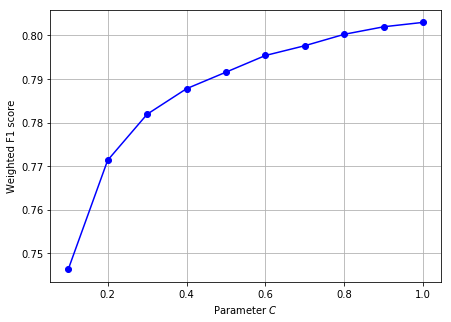

In [284]:
# Hyper Parameter Tuning
import matplotlib.pyplot as plt
hypers = np.arange(0.1, 1.1, 0.1)
res = []
for h in hypers:
    temp_model = train_classifier(X_train_tfidf, y_train, C=h, model='lr')
    temp_pred = f1_score(y_test, temp_model.predict(X_test_tfidf), average='weighted')
    res.append(temp_pred)
plt.figure(figsize=(7,5))
plt.plot(hypers, res, color='blue', marker='o')
plt.grid(True)
plt.xlabel('Parameter $C$')
plt.ylabel('Weighted F1 score')
plt.show()

In [285]:
#We fit the “best” model and create predictions for test set when 
#we are happy with the quality
# Final model
C = 1.0
classifier = train_classifier(X_train_tfidf, y_train, C=C, model='lr')
# Results
test_predictions =  classifier.predict(X_test_tfidf)
test_pred_inversed = mlb.inverse_transform(test_predictions)
test_pred_inversed

[('assault',),
 ('unspecified',),
 ('assault',),
 ('unspecified',),
 ('assault',),
 ('unspecified',),
 ('assault',),
 ('unspecified',),
 (),
 (),
 ('assault',),
 ('assault',),
 ('assault', 'sexual'),
 ('unspecified',),
 ('unspecified',),
 ('assault',),
 ('assault',),
 ('unspecified',),
 ('unspecified',),
 ('assault',),
 ('assault',),
 ('assault',),
 ('assault',),
 ('assault',),
 ('assault',),
 ('unspecified',),
 ('assault',),
 ('gunfight',),
 ('unspecified',),
 ('gunfight',),
 ('assault', 'sexual'),
 ('assault',),
 ('unspecified',),
 ('assault',),
 ('coup',),
 ('assault',),
 ('assault',),
 ('unspecified',),
 ('gunfight',),
 ('unspecified',),
 ('unspecified',),
 ('coup',),
 ('unspecified',),
 ('unspecified',),
 ('assault',),
 ('demonstration', 'violent'),
 ('coup',),
 ('gunfight',),
 ('assault',),
 ('unspecified',),
 ('assault',),
 ('assault',),
 ('unspecified',),
 ('unspecified',),
 ('unspecified',),
 ('assault', 'destruction', 'property'),
 ('assault',),
 ('assault',),
 ('sexual', 'un

In [287]:
#Feature Imporance
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    tag_n = np.where(tags_classes==tag)[0][0]
    
    model = classifier.estimators_[tag_n]
    top_positive_words = [index_to_words[x] for x in model.coef_.argsort().tolist()[0][-8:]]
    top_negative_words = [index_to_words[x] for x in model.coef_.argsort().tolist()[0][:8]]
    
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

print_words_for_tag(classifier, 'assault', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier, 'gunfight', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier, 'sexual', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier, 'violence', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier, 'coup', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)

Tag:	assault
Top positive words:	murdered, hacked, gangraped, beaten, assaulted, stabbed, killed, raped
Top negative words:	gunfight, arrested, clash, fight, clashed, yaba, one point, drive

Tag:	gunfight
Top positive words:	police claimed, militant, bullets, shot, shootout, killed, gun fight, gunfight
Top negative words:	arrested, police arrested, rab chittagong, woman, police gunfight, man, league, open

Tag:	sexual
Top positive words:	harassed, sexual, rapped, raping, sexually, rape, gangraped, raped
Top negative words:	death, rape case, arrested, rapist raped, killed, committed suicide, raped girl, body

Tag:	violence
Top positive words:	death locals, angry, beat, locals, public, mob, beaten, attacked
Top negative words:	arrested, recovered, upazila, girl, miscreants, drug, husband, awami league

Tag:	coup
Top positive words:	procession, infight, locked, situation, injured, clashes, clashed, clash
Top negative words:	arrested, miscreants, police arrested, attack, body, goons, girl,

### Topic Modelling End